In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Purpose of the Analysis
### The purpose of this analysis is to conduct a comprehensive performance assessment of the firm over the past six years across all departments, with a particular focus on the 2025 financial year. The review is based on detailed analysis of financial and operational data, with specific emphasis on sales performance, collections efficiency, and overall profitability.
### The objective is to identify key strengths, structural weaknesses, and performance gaps, assess the sustainability of current results, and evaluate the effectiveness of sales and collection practices. The findings of this analysis will be used to generate strategic insights and practical recommendations aimed at improving operational efficiency, strengthening financial controls, and supporting the firm’s long-term growth and value creation.

In [2]:
original_df = pd.read_excel(r'/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/data/full purchasing.xlsx')
original_df.columns = original_df.iloc[0]
original_df.drop([0], axis=0, inplace=True)
original_df.drop(original_df.columns[0], axis=1, inplace=True)


original_df.head(2)

,Full Name,MFG,Product Name,Size,Qty.,Unit Selling Price,Total Selling Price,Supplier,Buying Price,Client,Invoice,Date,Invoice No,Profit
1,بلاستر طبي ٥سم Silkplast,Silkplast,بلاستر طبي ٥سم,5cm,25,16,400,Abd El Hamid,15,El Mahdy,1,2020-01-01 00:00:00,1/2020,25
2,برولين ٠/٣ راوند,NaN,برولين ٠/٣ راوند,3/0 round,1,95,95,Abd El Hamid,85,El Mahdy,1,2020-01-01 00:00:00,1/2020,10


### NB.  Most of the data has been cleaned in excel files before processing

In [3]:
expenses_df = pd.read_excel(r'/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/data/Expenses Full Data.xlsx')
expenses_df.columns = expenses_df.iloc[0]
expenses_df.drop([0], axis=0, inplace=True)
expenses_df.drop(expenses_df.columns[0], axis=1, inplace=True)
expenses_df.head(2)


,Date,Type,Description,Destination,Client,Invoice no.,Name,Cost
1,2020-01-01 00:00:00,Marketing & Sales,Survey,Banha,"Alaa, Hassan, Ghareeb",NaN,Company,2565
2,2020-01-01 00:00:00,Marketing & Sales,Training,Cairo,Room Square,NaN,Company,1880


In [4]:
Financial_df = pd.read_excel(r'/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/data/Clients Full Data.xlsx')
Financial_df.columns = Financial_df.iloc[0]
Financial_df.drop([0], axis=0, inplace=True)
Financial_df.drop(Financial_df.columns[0], axis=1, inplace=True)
Financial_df.dropna(subset=['Cogs','Creditor','Debitor'],thresh=1, inplace=True)
Financial_df.head(2)


,Date,Invoice No.,Cogs,Creditor,Debitor,Balance,Client
1,2020-01-01 00:00:00,1,7405,8192.5,NaN,8192.5,El Mahdy
2,2020-01-01 00:00:00,NaN,NaN,NaN,1000,-1000,El Mahdy


In [5]:
category_dict = {
'Spinal' : 'ابر اسباينال',
'Surgical Needles' : 'ابر جراحيه',
'Sample Needles' : 'ابر سحب',
'Dialysis Needle' : 'ابر غسيل كلوي',
'Pregnancy Test' : 'اختبار حمل',
'Baby Bottle' : 'ازازة لبن للأطفال',
'Steery Strip' : 'استيري سترب',
'ID' : 'اسورة تعريف',
'Hegama Cups' : 'اكواب حجامه',
'Electrode' : 'اليكترود',
'Amadol Blocker' : 'امادول عزل',
'Embo Bag' : 'امبو باج',
'Ear Tubes' : 'انابيب تهوية اذن',
'ET Tube' : 'انبوبة حنجرية',
'Deudenal Tube' : 'انبوبه دودية',
'Chest Tube' : 'انبوبه صدريه',
'Over Head' : 'اوفر شوز',
'Over Shoes' : 'اوفر هيد',
'Eye Patch' : 'اي باتش',
'Egycryl' : 'ايجي كريل',
'Ice Box' : 'ايس بوكس',
'Baby Bottle' : ['ببرونه','ازازة لبن للأطفال'],
'Over Suit' : 'بدلة عزل',
'Breast Suction Vac' : ['برطمان شفاط صدر','برطمان صدر'],
'Potassium Permengnate' : 'برمنجنات بوتاسيوم',
'Prolene' : ['برولين ٠/٢ راوند','برولين ٠/٢ قاطع','برولين ٠/٢ مستقيم','برولين ٠/٣ راوند','برولين ٠/٣ قاطع','برولين ٠/٣ مستقيم','برولين ٠/٤ راوند','برولين ٠/٤ قاطع','برولين ٠/٥ راوند','برولين ٠/٥ قاطع','برولين ٠/٦ ابرتين','برولين ٠/٦ راوند','برولين ٠/٦ قاطع','برولين ٢ راوند','برولين ٢ قاطع','برولين زيرو راوند','برولين زيرو قاطع','برولين واحد راوند','برولين واحد قاطع'],
'Sterilization Roll' : ['بكر تعقيم','رول تعقيم'],
'ECG Roll' : 'بكر رسم قلب',
'Sonar Roll' : 'بكر سونار',
'Plaster' : 'بلاستر طبي',
'Oxygen Pulse' : 'بلص اكسجين',
'Suction Tip' : 'بوز شفاط',
'Polyester' : 'بوليستر',
'Bone Wax' : 'بون واكس',
'BD' : 'بي دي',
'Betadine' : 'بيتادين',
'Thermometer' : ['ترمومتر ثلاجه','ترمومتر ديجيتال','ترمومتر عريض','ترمومتر مبروم'],
'Shash Roll' : 'توب شاش',
'T Tube' : 'تي تيوب',
'Sterilization Tape' : 'تيب تعقيم',
'Ice' : 'ثلج',
'Doctor Gown' : 'جاون طبيب',
'Patient Gown' : 'جاون مريض',
'Gypsona' : 'جبسونا',
'Camera Cover' : 'جراب كاميرا',
'Surgical Graft' : 'جرافت جراحي',
'Dialysis Sterilization Liquid' : 'جركن تعقيم',
'Dialysis Liquid' : 'جركن غسيل كلوي',
'Alcohol' : 'كحول',
'KY Gel' : 'جل KY',
'Sonar Gel' : 'جل سونار',
'Foam Gel' : 'جل فوم',
'Telescope Rubber' : 'جلدة تيليسكوب',
'Glycerine' : 'جلسرين',
'PCA' : 'جهاز تسكين الألم بي سي ايه',
'Rectal Syringe Set' : 'جهاز حقنة شرجية',
'Glucose Set' : 'جهاز سكر',
'Pressure Set' : 'جهاز ضغط',
'Flowmeter Set' : 'جهاز فلوميتير',
'Hemoglobin Set' : 'جهاز قياس الهيموجلوبين',
'Nebulizer Set' : 'جهاز نبيولايزر',
'Blood Transfusion' : 'جهاز نقل دم',
'IV Set' : 'جهاز وريد',
'Antivirus Gloves' : 'جوانتي انتي فيرس',
'Check Gloves' : 'جوانتي فحص',
'Latex' : 'جوانتي لاتكس',
'Sterile Gloves' : 'جوانتي معقم',
'Nitrile' : 'جوانتي نيتريل',
'Arm Holder' : 'حامل ذراع',
'Stabilizer Arm Holder' : 'حامل ذراع بمثبت',
'Silk' : 'حرير',
'Abdomen Belt' : 'حزام بطن',
'Testes Belt' : 'حزام رافع خصيه',
'Chest Belt' : 'حزام صدر',
'Nose Filler' : 'حشو انف',
'Diapers' : 'حفاضات',
'Tongue Depressor' : 'خافض لسان',
'Skin Stapler Remover' : 'خلاعه دبابيس',
'BDS' : 'خيط بي دي اس',
'Cervical' : 'خيط ربط عنق',
'Chromic' : 'خيط كروميك',
'Nylon' : 'خيط نايلون',
'Di Flow' : 'داي فلو',
'Skin Stapler' : 'دباسه جلد',
'Suction Vac Tube' : 'درنقة حصيرة',
'Dressing' : 'دريسنج',
'Nose Support' : 'دعامه انفيه',
'Bandage' : 'رباط ضاغط',
'Rosas' : 'رصاص',
'Neck Support' : 'رقبة',
'Oil' : 'زيت',
'Parafin Oil' : 'زيت بارافين',
'IV Burette' : 'سالوست',
'Cidex' : 'سايدكس',
'Sponge' : 'سبونج معقم',
'Sterilium' : 'ستريليم',
'Syringe' : 'سرنجات',
'Doctor Scrub' : 'سكراب طبيب',
'Cutting Wire' : 'سلك بتر',
'Stethoscope' : 'سماعه طبيب',
'Insulin Pen Tip' : 'سن قلم انسولين',
'Soof Pad' : 'سوف باد',
'Surgical Pad' : 'سيرجيكال باد',
'Safety Box' : 'سيفتي بوكس',
'Shash' : 'شاش',
'Vasiline Shash' : 'شاش فازلين',
'Shamber Modifier' : 'شامبر موديفير',
'Prolene Mesh' : 'شبكة برولين',
'Hemoglobin Strips' : 'شرائط الهيموجلوبين',
'Glucose Strips' : 'شرائط سكر',
'Cholestrol Strips' : 'شرائط كوليسترول',
'Varicose Veins Socks' : 'شراب دوالي',
'Surgical Vac' : 'شفاط جراحي',
'Blood Lancets' : 'شكاكه',
'Doctor Crocs' : 'صابوة طبيب',
'Diathermy Blocker' : 'عازل دياثيرم',
'Binoculars' : 'عضاضه مناظير',
'Pharmapore' : 'فارمابور',
'Surgical Gown' : 'فرش جراحي',
'Baby Bed Dressing' : 'فرش حضانه',
'Vicryl' : 'فكريل',
'Stool Bag' : ['فلانشه','كيس فلانشه','كيس براز'],
'Bacterial Filter' : 'فلتر بكتيري',
'Dialysis Filter' : 'فلتر غسيل كلوي',
'Lap Sample Tubes' : 'فوارغ معمل',
'Abdomen Towels' : 'فوط بطن',
'Sterilization Towels' : 'فوط تعقيم',
'Spinal Towels' : 'فوط سباينال',
'Surgical Towels' : ['فوط فرش','فوط فنيك','فوط جراحيه'],
'Face Sheild' : 'فيس شيلد',
'CVP Catheter' : 'قسطرة CVP',
'Epidural Catheter' : 'قسطرة ابيديورل',
'Feeding Rayl Catheter' : 'قسطرة رايل',
'Silicone Catheter' : 'قسطرة سيليكون',
'Rectal Catheter' : 'قسطرة شرجيه',
'Suction Catheter' : 'قسطرة شفط',
'Breast Catheter' : 'قسطرة صدرية',
'Dialysis Catheter' : ['قسطرة غسيل كلوي','قسطرة غسيل كلوي ماهوكر','قسطرة ماهوكر مستقيم'],
'Fogarty Catheter' : 'قسطرة فوجارتي',
'Folley Catheter' : 'قسطرة فولي',
'CVS Catheter' : 'قسطرة قلبيه',
'External Catheter' : 'قسطرة كاندم',
'Nelaton Catheter' : 'قسطرة نيلاتون',
'U.Cord Catheter' : 'قسطره سرة',
'Baby Stool Set' : 'قصرية',
'Cotton' : 'قطن',
'Doctor Cap' : 'كاب طبيب',
'Patient Cap' : 'كاب مريض',
'Nurse Cap' : 'كاب ممرضه ازرق',
'Diathermy Cable' : 'كابل دياثيرم',
'Biological Detector' : 'كاشف بيولوجي',
'Tape Detector' : 'كاشف شريط',
'IV Cannula' : ['كانيولا اخضر مقاس ١٨','كانيولا ازرق مقاس ٢٢','كانيولا اصفر مقاس ٢٤','كانيولا بمبي مقاس ٢٠','كانيولا بنفسجي مقاس ٢٦','كانيولا رصاصي مقاس ١٦'],
'Nasal Cannula' : 'كانيولا انفيه',
'Bi Bag Dialysis Capsules' : 'كبسولات غسيل كلوي باي باج',
'Digital Blood Pressure Cuff' : 'كف ضغط ديجيتال لارج',
'Monitor Cuff' : 'كف مونوتور',
'U.Cord Clamp' : 'كلبس سرة',
'Gallbladder Clamp' : 'كلبس مرارة',
'Polymer Clamp' : 'كلبسات بوليمير',
'Chlorine Tablet' : 'كلور اقراص',
'Sample Cup' : 'كوب تعقيم',
'Stress Ball' : 'كورة أعصاب',
'Ice Bag' : 'كيس تبريد',
'Breathing Bag' : 'كيس تنفس',
'Urine Bag' : 'كيس جمع بول',
'Liso Bag' : 'كيس ليزو',
'Baby Pacifiers' : 'لهايات',
'Loop' : 'لوب',
'Lup' : 'لولب',
'Linor' : 'لينور',
'Oxygen Water' : 'ماء اكسجين',
'N95 Mask' : 'ماسك N95',
'Oxygen Mask' : 'ماسك اكسجين',
'CPAP Mask' : 'ماسك سباب',
'Mask' : 'ماسك طبي',
'KN95 Mask' : 'ماسك طبي KN95',
'Venturi Mask' : 'ماسك فينتوري',
'Laryngial Mask' : 'ماسك لارنجال',
'Nebulizer Mask' : 'ماسك نبيولايزر',
'Anathesia Mask' : 'ماسك وصله تخدير',
'Makentosh' : 'ماكنتوش',
'Hard Urine Bag' : 'مبولة',
'Cannula Fixator' : 'مثبت كانيولا',
'Glucose Saline' : 'محلول جلوكوز',
'Ringer saline' : 'محلول رينجر',
'Normal Saline' : 'محلول ملح',
'Temperature Set' : 'مسدس قياس حرارة',
'CVP Ruler' : 'مسطرة CVP',
'Blades' : 'مشرط جراحي',
'Bed Dressing' : ['مفرش سرير','ملاية شق'],
'Airway Tube' : 'ممر هواء',
'Tissues' : 'مناديل',
'Cuff Monitor' : 'منظم كف',
'Monocryl' : 'مونوكريل',
'Scaler' : 'ميزان',
'Galsses' : 'نظارة محضن',
'Sterilization Paper' : ['ورق تعقيم','ورق جهاز صدمات'],
'IV Extension Line' : 'وصلة امتداد وريدي',
'CPAP Extension' : 'وصلة سباب',
'Dialysis Extension' : 'وصلة غسيل كلوي',
'Anathesia Extension' : ['وصله احاديه تخدير','وصله تخدير'],
'Breathing Circuits' : 'وصله تنفس',
'3Way Stopcock' : 'وصله ثلاثية',
'CPAP Extension' : 'وصلة سباب',
'Vent Extension' : 'وصله فنت',
'Monitor Extension' : 'وصله مونيتور',
'Pharmaceuticals' : 'Dawaa'
}

In [6]:
def categorize_product(product_name):
    for key, value in category_dict.items():
        if isinstance(value,list):
            if any(term in product_name for term in value):
                return key
        else:
            if value in product_name:
                return key
    return 'uncategorized'


original_df['Category'] = original_df['Product Name'].apply(categorize_product)


### check if all products categorized or not

In [7]:

original_df[original_df['Category'] == 'uncategorized']


,Full Name,MFG,Product Name,Size,Qty.,Unit Selling Price,Total Selling Price,Supplier,Buying Price,Client,Invoice,Date,Invoice No,Profit,Category
8864,معصم لارج Zola,Zola,معصم لارج,L,4,20,80,Kareem,12.45,MEDECA HOSPITAL SHARM,134,15/10/2025,134/2025,30.2,uncategorized
8865,معصم ميديم Zola,Zola,معصم ميديم,M,3,20,60,Kareem,12.45,MEDECA HOSPITAL SHARM,134,15/10/2025,134/2025,22.65,uncategorized
8866,معصم اكس لارج Zola,Zola,معصم اكس لارج,XL,3,20,60,Kareem,12.45,MEDECA HOSPITAL SHARM,134,15/10/2025,134/2025,22.65,uncategorized
8871,ركبه لارج Zola,Zola,ركبه لارج,L,4,30,120,Kareem,27,MEDECA HOSPITAL SHARM,134,15/10/2025,134/2025,12,uncategorized
8872,ركبه ميديم Zola,Zola,ركبه ميديم,M,3,30,90,Kareem,27,MEDECA HOSPITAL SHARM,134,15/10/2025,134/2025,9,uncategorized
8873,ركبه اكس لارج Zola,Zola,ركبه اكس لارج,XL,3,30,90,Kareem,27,MEDECA HOSPITAL SHARM,134,15/10/2025,134/2025,9,uncategorized
8885,عكاز ثابت,NaN,عكاز ثابت,NaN,2,600,1200,Kareem,455,MEDECA HOSPITAL SHARM,134,15/10/2025,134/2025,290,uncategorized
8896,ترنوكيه,NaN,ترنوكيه,NaN,3,30,90,Heba Lab,30,MEDECA HOSPITAL SHARM,134,15/10/2025,134/2025,0,uncategorized
8946,سيرجي سيل,NaN,سيرجي سيل,NaN,20,125,2500,Kareem,110,Taha Yasen,142,19/11/2025,142/2025,300,uncategorized
8973,حاويه نفايات,NaN,حاويه نفايات,NaN,2,850,1700,Heba Lab,700,Arkan Center,152,2025-12-14 00:00:00,152/2026,300,uncategorized


In [8]:
category_dict.update({'Hand Rest' : 'معصم',
                      'Knee Rest' : 'ركبه',
                      'Stand Holder' : 'عكاز',
                      'Tourniquet' : 'ترنوكيه',
                      'Hemostat' : 'سيرجي سيل',
                      'Plastic Rubbish Holder' : 'حاويه نفايات'})

In [9]:
original_df['Category'] = original_df['Product Name'].apply(categorize_product)

### recheck for uncategorized products again

In [10]:
original_df[original_df['Category'] == 'uncategorized']

,Full Name,MFG,Product Name,Size,Qty.,Unit Selling Price,Total Selling Price,Supplier,Buying Price,Client,Invoice,Date,Invoice No,Profit,Category


In [11]:
original_df['Year'] = pd.DatetimeIndex(original_df['Date']).year
original_df['Month'] = pd.DatetimeIndex(original_df['Date']).month

In [12]:
Financial_df['Year'] = pd.DatetimeIndex(Financial_df['Date']).year
Financial_df['Month'] = pd.DatetimeIndex(Financial_df['Date']).month

In [13]:
dropped_customer_list = ["El Mahdy",
"Dr. Alaa El Saka",
"Dr. Salah",
"Rahma",
"Salah Salem",
"Nokhba",
"Montazah",
"Bright",
"El Hayat",
"Khaled Alexandria",
"Zagazig University",
"Hamdy El Sayed",
"Royal Sharqia",
"Rahma Pharmacy",
"Emad Montazah",
"Rabbat",
"Kamel Pharmacy",
"Ibn Sina",
"Adam Banha",
"Al Srour",
"Sharqia",
"Asmaa S Salem",
"El Safwa",
"Al Moaezz / El Kasr El Einy",
"Dr. Ahmed  Abdou Sanad",
"Montazah Pediatric",
"Tarooty",
"Radiology Center",
"El Asema",
"El Abd",
"Galal",
"Dr. Islam Sameer",
"Maghraby",
"Hamediya",
"Wady El Tip",
"Shourok",
"Dr. M.Fawzy"]

### Quarterly Based

In [14]:
original_df['Quarters'] = pd.PeriodIndex(original_df['Date'], freq='Q').strftime('Q%q-')



# Phase 1 – Business Problem Framing

### 1. High-level Revenue / Profit KPIs

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_1462/3995500851.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  total_sales_by_year['Growth Rate'] = total_sales_by_year['Creditor'].pct_change() * 100


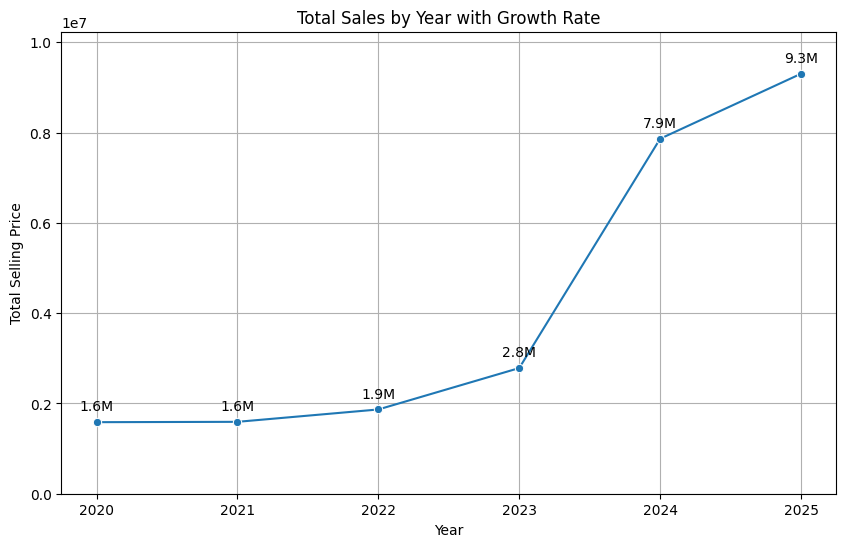

In [15]:
total_sales_by_year = Financial_df.groupby('Year')['Creditor'].sum().reset_index()
total_sales_by_year['Growth Rate'] = total_sales_by_year['Creditor'].pct_change() * 100

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='Year', y='Creditor', data=total_sales_by_year, marker='o')

# Offset value: adjust as needed
offset = total_sales_by_year['Creditor'].max() * 0.02

for i, row in total_sales_by_year.iterrows():
    ax.text(row['Year'], row['Creditor'] + offset, f"{row['Creditor']/1000000:.1f}M", color='black', ha="center", va="bottom")
plt.title('Total Sales by Year with Growth Rate')
plt.xlabel('Year')
plt.ylabel('Total Selling Price')
plt.ylim(0, total_sales_by_year['Creditor'].max() * 1.1)
plt.grid(True)
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/Sales.jpg', bbox_inches = 'tight', dpi = 200)
plt.show()


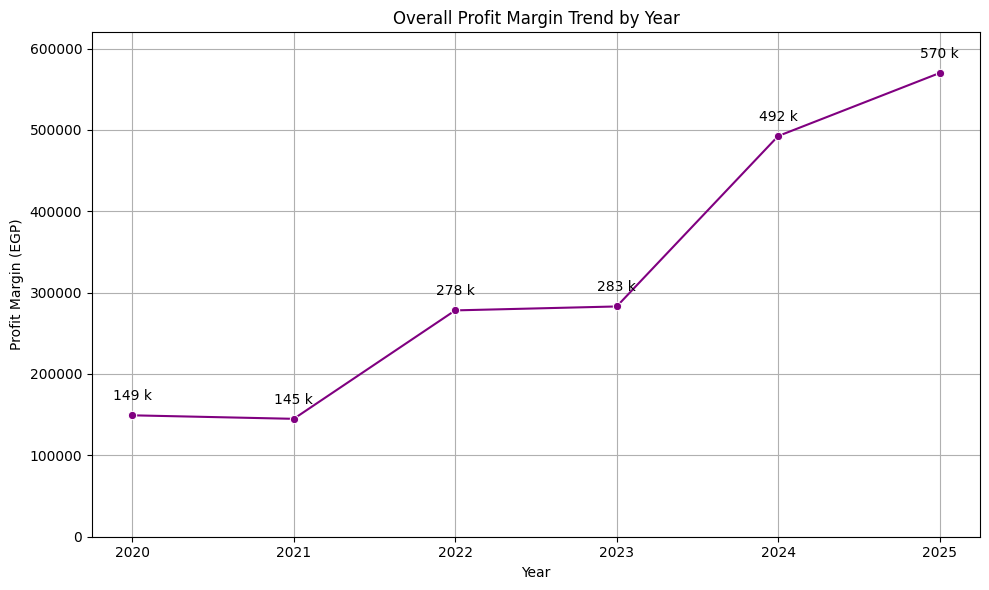

In [16]:
Financial_df["Creditor"] = pd.to_numeric(Financial_df["Creditor"], errors="coerce")
Financial_df["Cogs"] = pd.to_numeric(Financial_df["Cogs"], errors="coerce")
total_profits_by_year = Financial_df.groupby('Year').agg(revenue=("Creditor", "sum") , cogs = ("Cogs", "sum")).reset_index()
total_profits_by_year['Profit'] = total_profits_by_year['revenue'] - total_profits_by_year['cogs']
total_profits_by_year['Profit Margin'] = (total_profits_by_year['Profit'] / total_profits_by_year['revenue']) * 100
total_profits_by_year['Growth Rate'] = total_profits_by_year['Profit'].pct_change() * 100



plt.figure(figsize=(10, 6))
sns.lineplot(data=total_profits_by_year, x='Year', y='Profit', marker='o', color='purple')

# Add data labels
for i in range(len(total_profits_by_year)):
    year = total_profits_by_year.loc[i, 'Year']
    profit = total_profits_by_year.loc[i, 'Profit']
    
    plt.text(year, profit + 15000, f'{profit/1000:.0f} k',  # Adds comma formatting and rounds to int
             ha='center', va='bottom', fontsize=10, color='black')
plt.title('Overall Profit Margin Trend by Year')
plt.xlabel('Year')
plt.ylabel('Profit Margin (EGP)')
plt.ylim(0, total_profits_by_year['Profit'].max() + 50000)
plt.grid(True)
plt.tight_layout()
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/GP.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()

In [17]:
profit_pct_con = original_df['Profit'].sum() / original_df['Total Selling Price'].sum() * 100
print(f"Overall consumables Profit Percentage: {profit_pct_con:.2f}%")

Overall consumables Profit Percentage: 10.59%


In [18]:
profit_pct = total_profits_by_year['Profit'].sum() / total_profits_by_year['revenue'].sum() * 100
print(f"Overall Profit Percentage: {profit_pct:.2f}%")

Overall Profit Percentage: 7.67%


In [19]:
original_df.groupby('Year').apply(lambda x: x['Profit'].sum() / x['Total Selling Price'].sum() * 100).reset_index(name='Profit Percentage')

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_1462/2525905349.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  original_df.groupby('Year').apply(lambda x: x['Profit'].sum() / x['Total Selling Price'].sum() * 100).reset_index(name='Profit Percentage')


,Year,Profit Percentage
0,2020,9.708338
1,2021,8.936348
2,2022,14.135879
3,2023,11.723882
4,2024,9.863316
5,2025,9.724260


### Insight 1: Sales and Gross Profit Performance and Capital Structure Considerations


#### The entity has demonstrated strong sales performance, marked by a significant surge in 2024 following the successful entry of the pharmaceutical segment alongside the consumables business. This expansion resulted in an approximate 182% increase in sales and was accompanied by a substantial improvement in gross profit, which rose by 73% in the same year.


#### In 2025, growth has continued, albeit at a more moderate pace, with sales and gross profit increasing by approximately 20% and 16% respectively. While these results indicate sustained operational momentum, a notable concern arises from the 75% increase in equity during 2025, which is disproportionately high relative to the growth in sales and profitability.


#### This divergence suggests potential inefficiencies in capital deployment, funding structure, or retained earnings utilization. These issues warrant further analysis to identify underlying causes and to develop appropriate strategic and financial solutions to optimize equity growth in line with operational performance.

### Customer Count & Retention

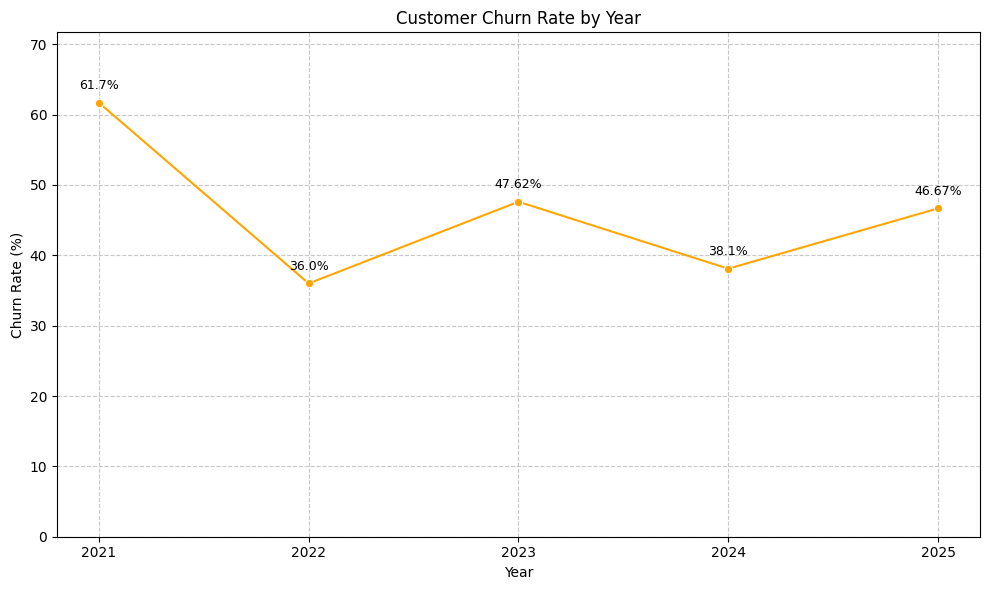

In [20]:
customers_per_year = original_df.groupby('Year')['Client'].unique().apply(set).reset_index()
customers_per_year

churn_data = []

for i in range(1, len(customers_per_year)):
    year = customers_per_year.loc[i, 'Year']
    current = customers_per_year.loc[i, 'Client']
    previous = customers_per_year.loc[i - 1, 'Client']
    
    lost = previous - current
    churn_rate = (len(lost) / len(previous)) * 100 if len(previous) > 0 else 0
    
    churn_data.append({
        'Year': year,
        'Customers at Start': len(previous),
        'Retained Customers': len(previous & current),
        'Lost Customers': len(lost),
        'new Customers': len(current - previous),
        'Churn Rate (%)': round(churn_rate, 2)
    })

churn_df = pd.DataFrame(churn_data)
churn_df

plt.figure(figsize=(10, 6))
sns.lineplot(data=churn_df, x='Year', y='Churn Rate (%)', marker='o', color='orange')

# Add labels above each point
for i in range(len(churn_df)):
    year = churn_df.loc[i, 'Year']
    churn = churn_df.loc[i, 'Churn Rate (%)']
    
    plt.text(year, churn + 1.5, f'{churn}%',  # Adjust `+ 1.5` to lift the label slightly
             ha='center', va='bottom', fontsize=9, color='black')
    
plt.title('Customer Churn Rate by Year')
plt.xlabel('Year')
plt.ylabel('Churn Rate (%)')
plt.xticks(churn_df['Year'])
plt.ylim(0, churn_df['Churn Rate (%)'].max() + 10)  # Add some space above the max churn rate
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

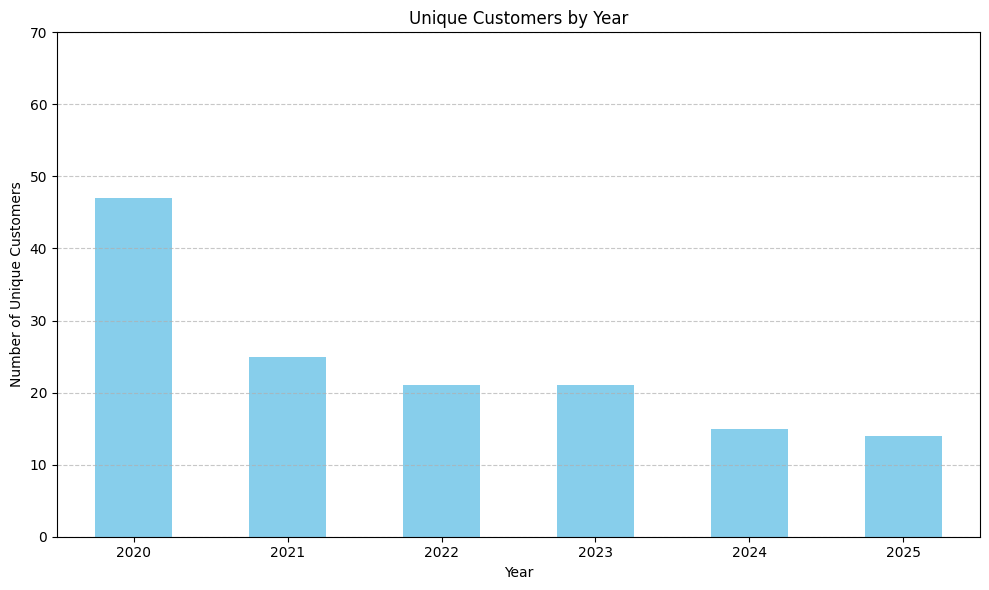

In [21]:
original_df.groupby('Year')['Client'].nunique().reset_index().plot(x='Year', y='Client', kind='bar', legend=False, figsize=(10, 6), color='skyblue')
plt.title('Unique Customers by Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=0)
plt.ylim(0, original_df['Client'].nunique() )
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/customers number.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()


### Insight 2: Customer Base and Retention
#### The firm saw a strong influx of customers in its first year. This is expected as the firm was still in the process of identifying its most valuable customers. Over time, the firm has refined its customer segmentation and adapted to market dynamics, resulting in more stable customer numbers in 2024 and 2025, with an average of 15 loyal customers. While the churn rate appears high, it is largely a result of the firm’s proactive market strategy. Importantly, customer retention for the most valuable clients is nearing 100%, which reflects positively on the firm’s relationship with its key customers.

In [22]:
expenses_df['Year'] = pd.DatetimeIndex(expenses_df['Date']).year
expenses_df['Month'] = pd.DatetimeIndex(expenses_df['Date']).month

In [23]:
yearly_expenses = expenses_df.groupby('Year')['Cost'].sum().reset_index()
yearly_expenses

,Year,Cost
0,2020,141835
1,2021,174540
2,2022,239157
3,2023,304903
4,2024,351370
5,2025,509553.62


In [24]:
total_profits_by_year

,Year,revenue,cogs,Profit,Profit Margin,Growth Rate
0,2020,1.584815e+06,1.435610e+06,149205.897500,9.414717,NaN
1,2021,1.592423e+06,1.447531e+06,144891.838431,9.098831,-2.891346
2,2022,1.866294e+06,1.588133e+06,278160.851800,14.904448,91.978275
3,2023,2.783624e+06,2.500628e+06,282996.425000,10.166474,1.738409
4,2024,7.863257e+06,7.370826e+06,492430.773130,6.262427,74.006005
5,2025,9.303422e+06,8.733532e+06,569889.729500,6.125593,15.729918


In [25]:
profit_expenses = total_profits_by_year[['Year','Profit']].merge(yearly_expenses, on='Year', how='left')
profit_expenses.rename(columns={'Cost':'Total Expenses'}, inplace=True)

profit_expenses.set_index('Year', inplace=True)
profit_expenses

,Profit,Total Expenses
Year,,
2020,149205.897500,141835
2021,144891.838431,174540
2022,278160.851800,239157
2023,282996.425000,304903
2024,492430.773130,351370
2025,569889.729500,509553.62


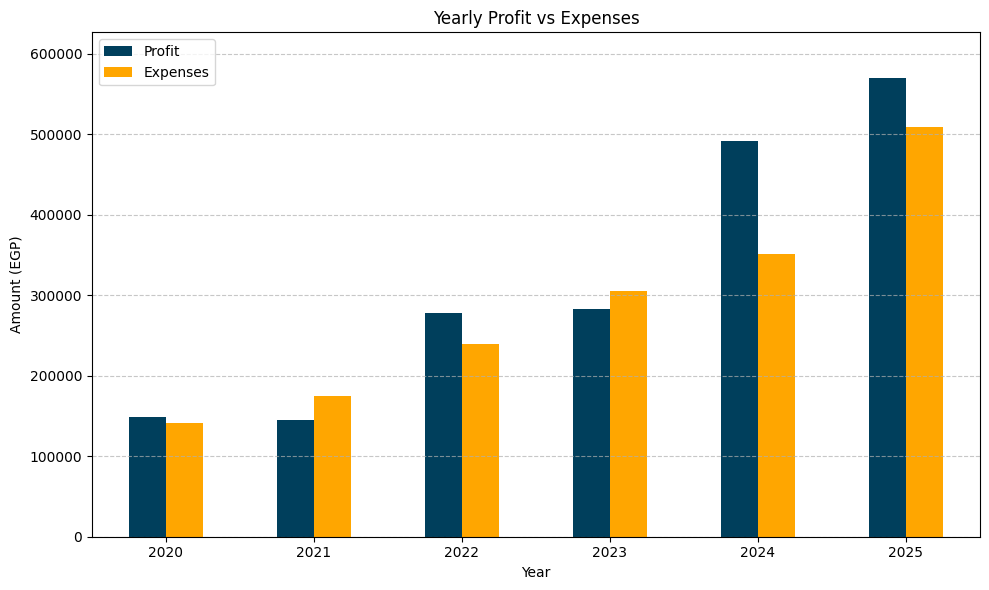

In [26]:
profit_expenses.plot(kind='bar', figsize=(10,6),color = ['#003f5c', '#ffa600'])
plt.title('Yearly Profit vs Expenses')
plt.xlabel('Year')
plt.ylabel('Amount (EGP)')
plt.xticks(rotation=0)
plt.ylim(0, max(profit_expenses['Profit'].max(), profit_expenses['Total Expenses'].max()) * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['Profit', 'Expenses'])
plt.tight_layout()
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/expenses vs. profit.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()


In [27]:
profit_expenses

,Profit,Total Expenses
Year,,
2020,149205.897500,141835
2021,144891.838431,174540
2022,278160.851800,239157
2023,282996.425000,304903
2024,492430.773130,351370
2025,569889.729500,509553.62


In [28]:
profit_expenses.sum()

Profit            1917575.515361
Total Expenses        1721358.62
dtype: object


### Insight 3: Cost Management and Expense Growth
#### While the firm has shown positive growth in gross profit (16% increase from 2024 to 2025), expenses have risen significantly, with an increase of 43% in 2025. The major driver behind this is salary expenses, which have heavily impacted profit margins. A potential solution to this issue is to either reduce salary costs or focus on strategies to boost profitability. One effective action would be to launch a new branch, which could generate additional sales and profits without the need for new hires, thus keeping salary costs stable. Alternatively, focusing on the pharmaceutical branch, which showed promising indicators in October 2025, could also yield positive results.

# Phase 2 – Data Preparation & Quality Check (Pandas)


In [29]:
original_df.isnull().sum()


0
Full Name                 0
MFG                    5191
Product Name              0
Size                   2432
Qty.                      0
Unit Selling Price        0
Total Selling Price       0
Supplier                  4
Buying Price              0
Client                    0
Invoice                   0
Date                      0
Invoice No                0
Profit                    0
Category                  0
Year                      0
Month                     0
Quarters                  0
dtype: int64

In [30]:
original_df[original_df['Supplier'].isnull()]

,Full Name,MFG,Product Name,Size,Qty.,Unit Selling Price,Total Selling Price,Supplier,Buying Price,Client,Invoice,Date,Invoice No,Profit,Category,Year,Month,Quarters
2376,ماسك N95,NaN,ماسك N95,NaN,50,65,3250,NaN,60,Taha Yasen,638,2021-03-18 00:00:00,638/2021,250,N95 Mask,2021,3,Q1-
2501,ماسك طبي ٣ طبقات استك,NaN,ماسك طبي ٣ طبقات استك,NaN,3,28,84,NaN,40,Adam Banha,671,2021-04-18 00:00:00,671/2021,-36,Mask,2021,4,Q2-
2514,ماسك طبي ٣ طبقات استك,NaN,ماسك طبي ٣ طبقات استك,NaN,3,30,90,NaN,40,Hemeda,673,2021-04-18 00:00:00,673/2021,-30,Mask,2021,4,Q2-
2554,ماسك طبي ٣ طبقات استك,NaN,ماسك طبي ٣ طبقات استك,NaN,1,28,28,NaN,40,Adam Banha,686,2021-05-02 00:00:00,686/2021,-12,Mask,2021,5,Q2-


In [31]:
original_df[(original_df['Full Name'] == 'ماسك طبي ٣ طبقات') & (original_df['Buying Price'] == 40)]

,Full Name,MFG,Product Name,Size,Qty.,Unit Selling Price,Total Selling Price,Supplier,Buying Price,Client,Invoice,Date,Invoice No,Profit,Category,Year,Month,Quarters
1802,ماسك طبي ٣ طبقات,NaN,ماسك طبي ٣ طبقات,NaN,6,50,300,Abd El Hamid,40,Cash Customer,421,2020-10-28 00:00:00,421/2020,60,Mask,2020,10,Q4-
1804,ماسك طبي ٣ طبقات,NaN,ماسك طبي ٣ طبقات,NaN,20,50,1000,Abd El Hamid,40,Taha Yasen,422,2020-10-28 00:00:00,422/2020,200,Mask,2020,10,Q4-
1817,ماسك طبي ٣ طبقات,NaN,ماسك طبي ٣ طبقات,NaN,21,50,1050,Abd El Hamid,40,Adam Banha,430,2020-11-05 00:00:00,430/2020,210,Mask,2020,11,Q4-
1840,ماسك طبي ٣ طبقات,NaN,ماسك طبي ٣ طبقات,NaN,20,45,900,Abd El Hamid,40,El Ahl,442,2020-11-15 00:00:00,442/2020,100,Mask,2020,11,Q4-
2024,ماسك طبي ٣ طبقات,NaN,ماسك طبي ٣ طبقات,NaN,10,45,450,Abd El Hamid,40,Kamel Pharmacy,525,2020-12-29 00:00:00,525/2020,50,Mask,2020,12,Q4-
2054,ماسك طبي ٣ طبقات,NaN,ماسك طبي ٣ طبقات,NaN,2,50,100,Abd El Hamid,40,Bnoon,530,2020-12-31 00:00:00,530/2020,20,Mask,2020,12,Q4-


In [32]:
original_df.loc[[2502,2515,2556], 'Supplier'] = 'Abd El Hamid'

In [33]:
original_df[(original_df['Full Name'] == 'ماسك N95')]

,Full Name,MFG,Product Name,Size,Qty.,Unit Selling Price,Total Selling Price,Supplier,Buying Price,Client,Invoice,Date,Invoice No,Profit,Category,Year,Month,Quarters
382,ماسك N95,NaN,ماسك N95,NaN,210,56.25,11812.5,El Tayseer Purchaser,55,Zagazig University,68,2020-04-05 00:00:00,68/2020,262.5,N95 Mask,2020,4,Q2-
1954,ماسك N95,NaN,ماسك N95,NaN,40,90,3600,El Tayseer Purchaser,85,Taha Yasen,496,2020-12-14 00:00:00,496/2020,200,N95 Mask,2020,12,Q4-
2376,ماسك N95,NaN,ماسك N95,NaN,50,65,3250,NaN,60,Taha Yasen,638,2021-03-18 00:00:00,638/2021,250,N95 Mask,2021,3,Q1-


In [34]:
original_df.loc[2377, 'Supplier'] = 'El Tayseer Purchaser'

In [35]:
original_df.isnull().sum()


0
Full Name                 0
MFG                    5191
Product Name              0
Size                   2432
Qty.                      0
Unit Selling Price        0
Total Selling Price       0
Supplier                  4
Buying Price              0
Client                    0
Invoice                   0
Date                      0
Invoice No                0
Profit                    0
Category                  0
Year                      0
Month                     0
Quarters                  0
dtype: int64

In [36]:
original_df.duplicated().sum()
original_df[original_df.duplicated()]

,Full Name,MFG,Product Name,Size,Qty.,Unit Selling Price,Total Selling Price,Supplier,Buying Price,Client,Invoice,Date,Invoice No,Profit,Category,Year,Month,Quarters
3550,ماسك اكسجين بالباج Ultra,Ultra,ماسك اكسجين بالباج,NaN,5,28,140,Kareem,25,Galal,841,2021-09-30 00:00:00,841/2021,15,Oxygen Mask,2021,9,Q3-
6399,جهاز وريد بكاوتشه كيو,كيو,جهاز وريد بكاوتشه,NaN,50,4.3,215,Kareem,3.1,Maghraby,77,2023-03-09 00:00:00,77/2023,60,IV Set,2023,3,Q1-
6400,رول تعقيم ٢٠سم GMS,GMS,رول تعقيم ٢٠سم,20cm,1,700,700,Kareem,397,Maghraby,77,2023-03-09 00:00:00,77/2023,303,Sterilization Roll,2023,3,Q1-
6401,اليكترود,NaN,اليكترود,NaN,100,1.4,140,Kareem,1.3,Maghraby,77,2023-03-09 00:00:00,77/2023,10,Electrode,2023,3,Q1-
6402,بكر رسم قلب ٦.٣سم,NaN,بكر رسم قلب ٦.٣سم,6.3cm,10,10,100,Kareem,9.5,Maghraby,77,2023-03-09 00:00:00,77/2023,5,ECG Roll,2023,3,Q1-
6403,شرائط سكر Glucodoctor,Glucodoctor,شرائط سكر,NaN,1,215,215,Kareem,190,Maghraby,77,2023-03-09 00:00:00,77/2023,25,Glucose Strips,2023,3,Q1-
6404,وصله ثلاثية Ultra,Ultra,وصله ثلاثية,NaN,75,5.2,390,Kareem,4.9,Maghraby,77,2023-03-09 00:00:00,77/2023,22.5,3Way Stopcock,2023,3,Q1-
6405,مشرط جراحي مقاس ٢٢,NaN,مشرط جراحي مقاس ٢٢,22,3,95,285,Kareem,90,Maghraby,77,2023-03-09 00:00:00,77/2023,15,Blades,2023,3,Q1-
6406,جبسونا ١٥سم صيني,صيني,جبسونا ١٥سم,15cm,12,17.5,210,Kareem,16,Maghraby,77,2023-03-09 00:00:00,77/2023,18,Gypsona,2023,3,Q1-
6410,كوب تعقيم,NaN,كوب تعقيم,NaN,500,1.25,625,Motakhssoon,1.1,Taha Yasen,78,2023-03-09 00:00:00,78/2023,75,Sample Cup,2023,3,Q1-


In [37]:
original_df = original_df.drop_duplicates()

In [38]:
original_df.duplicated().sum()


np.int64(0)

### Insight 4: Data Quality
#### The data quality is generally satisfactory, with some issues related to duplicate values and missing items. These have been addressed, and the data is now clean and reliable for further analysis.

# Phase 3: Descriptive Analytics (What Happened?)
### The goal here is to summarize past performance clearly and visually. Each metric will highlight a specific part of business (sales, customers, suppliers, finance).

## 🔑 Sales Metrics


### Total Sales Revenue (per Year/Quarter/Month)


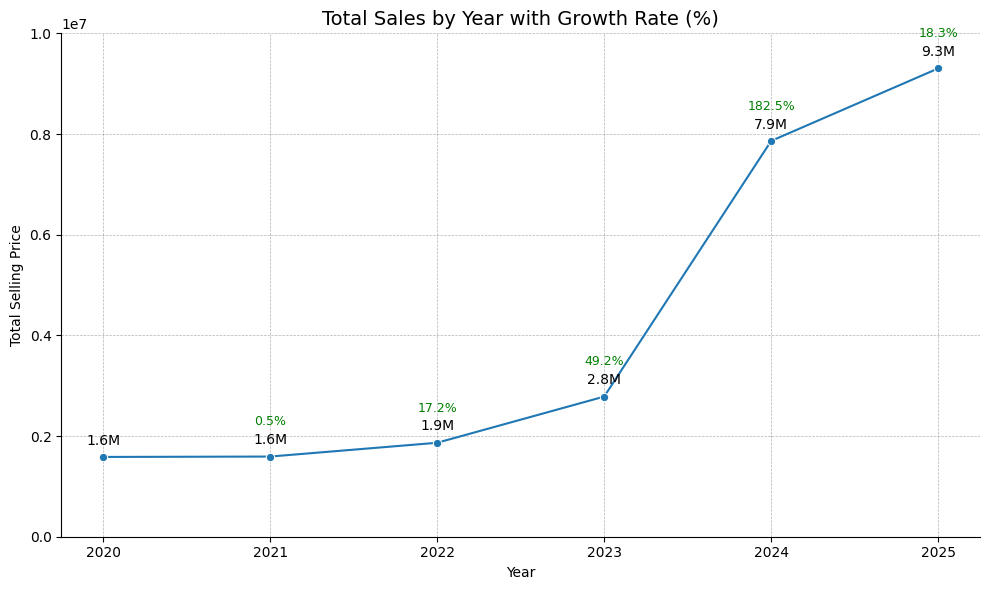

In [39]:


# Step 2: Plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='Year', y='Creditor', data=total_sales_by_year, marker='o', ax=ax)

# Set y-axis ticks manually based on max value (in millions)
max_value = total_sales_by_year['Creditor'].max()
tick_step = 1_000_000  # You can change this to 500_000 for more granularity
yticks = np.arange(0, max_value + tick_step, tick_step)

# Step 3: Add labels
offset = total_sales_by_year['Creditor'].max() * 0.02

for i, row in total_sales_by_year.iterrows():
    # Sales label
    ax.text(
        row['Year'],
        row['Creditor'] + offset,
        f"{row['Creditor'] / 1_000_000:.1f}M",
        ha="center",
        va="bottom",
        color='black',
        fontsize=10
    )
    
    # Growth rate label (skip first year since it has NaN)
    if pd.notna(row['Growth Rate']):
        ax.text(
            row['Year'],
            row['Creditor'] + offset * 3,
            f"{row['Growth Rate']:.1f}%",
            ha="center",
            va="bottom",
            color='green',
            fontsize=9
        )

# Step 4: Final touches
plt.title('Total Sales by Year with Growth Rate (%)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Selling Price')
plt.ylim(0,10000000)
plt.grid(True)
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.6)
sns.despine()
plt.tight_layout()
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/sales with growth rate.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()


### Seasonality Heatmap → Revenue by Month vs Year.

### Consumables

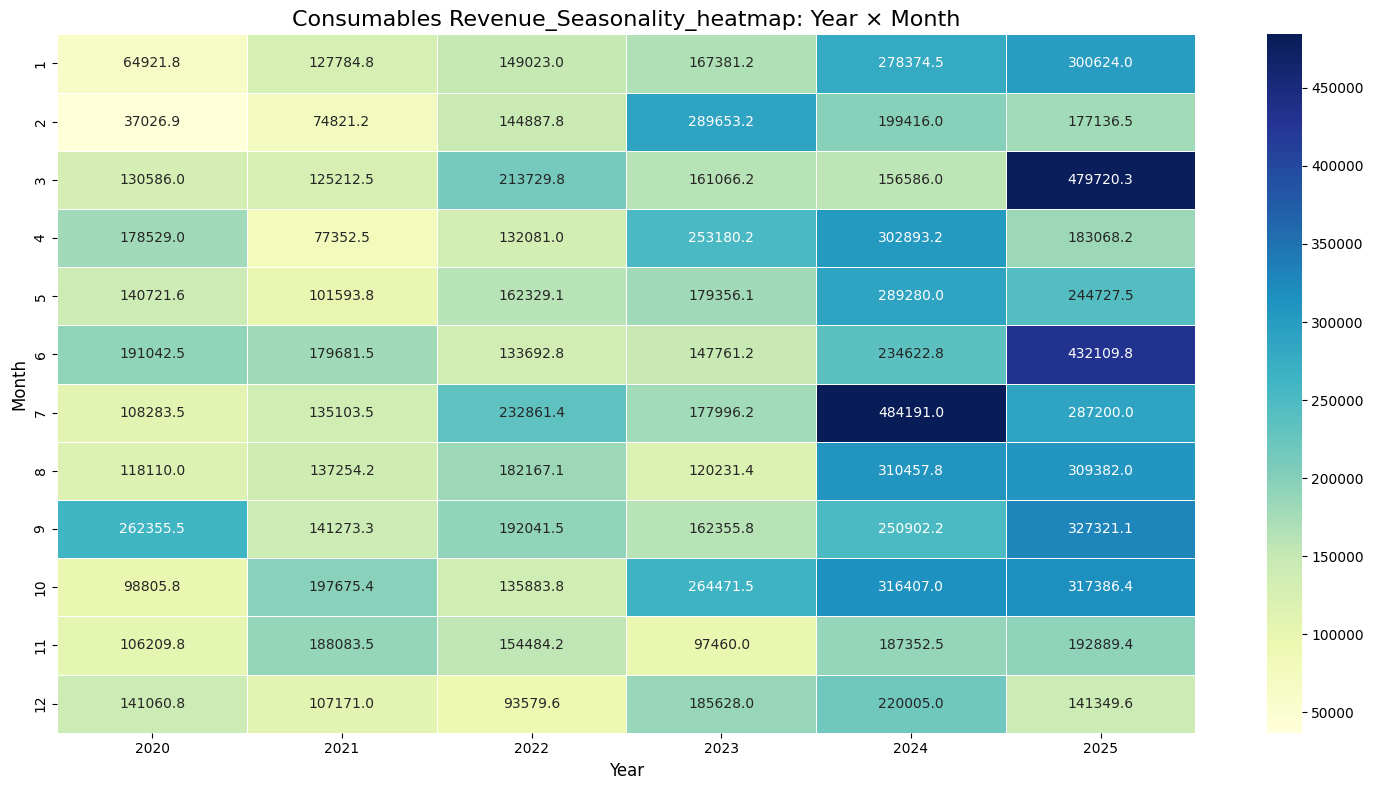

In [40]:
Seasonality_heatmap = original_df.pivot_table(index='Month', columns='Year', values='Total Selling Price', aggfunc='sum')
Seasonality_heatmap = Seasonality_heatmap.apply(pd.to_numeric, errors='coerce')

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(Seasonality_heatmap, annot=True, cmap='YlGnBu', linewidths=0.5, fmt='.1f')

# Add title and labels
plt.title('Consumables Revenue_Seasonality_heatmap: Year × Month', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Month', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

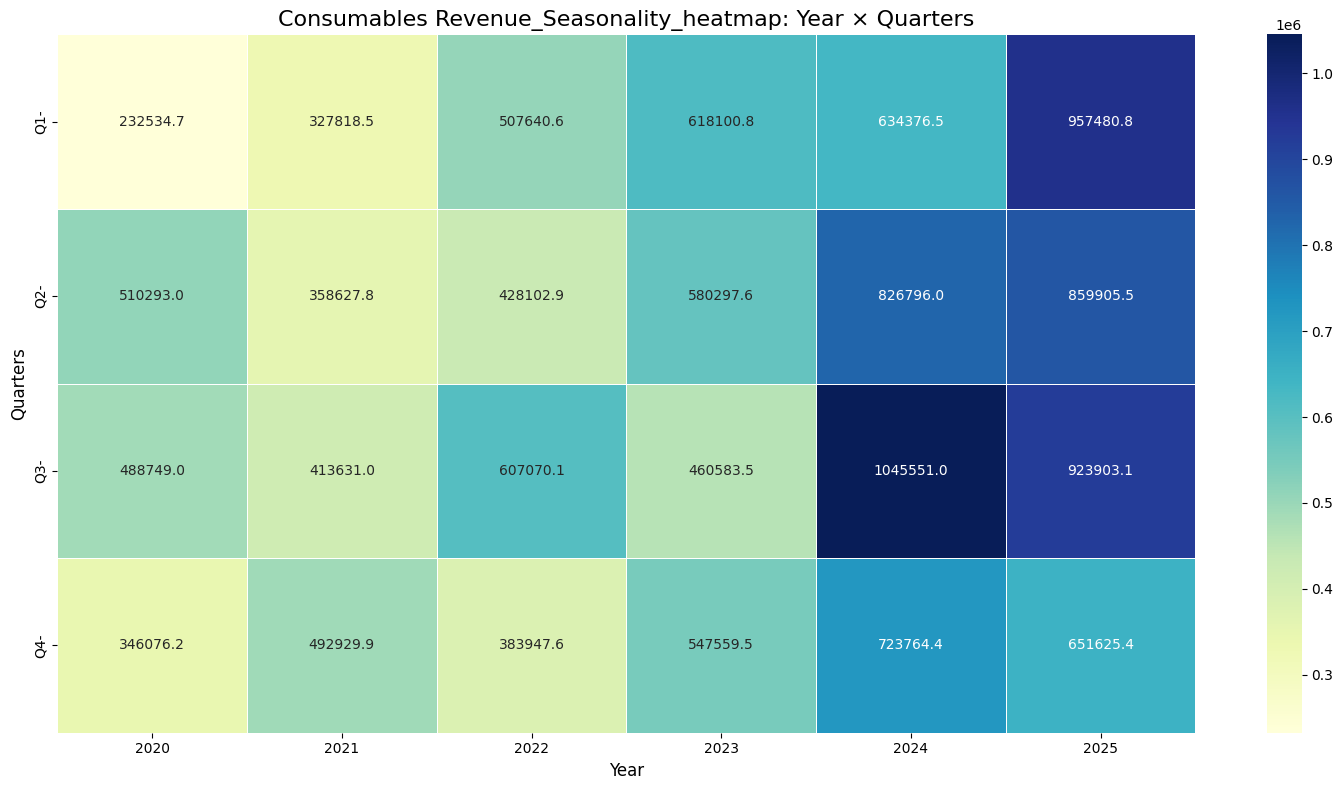

In [41]:
Seasonality_Q_heatmap = original_df.pivot_table(index='Quarters', columns='Year', values='Total Selling Price', aggfunc='sum')
Seasonality_Q_heatmap = Seasonality_Q_heatmap.apply(pd.to_numeric, errors='coerce')

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(Seasonality_Q_heatmap, annot=True, cmap='YlGnBu', linewidths=0.5, fmt='.1f')

# Add title and labels
plt.title('Consumables Revenue_Seasonality_heatmap: Year × Quarters', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Quarters', fontsize=12)

# Show the plot
plt.tight_layout()
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/consumables quarter sales.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()

### Consumables + Pharmaceuticals

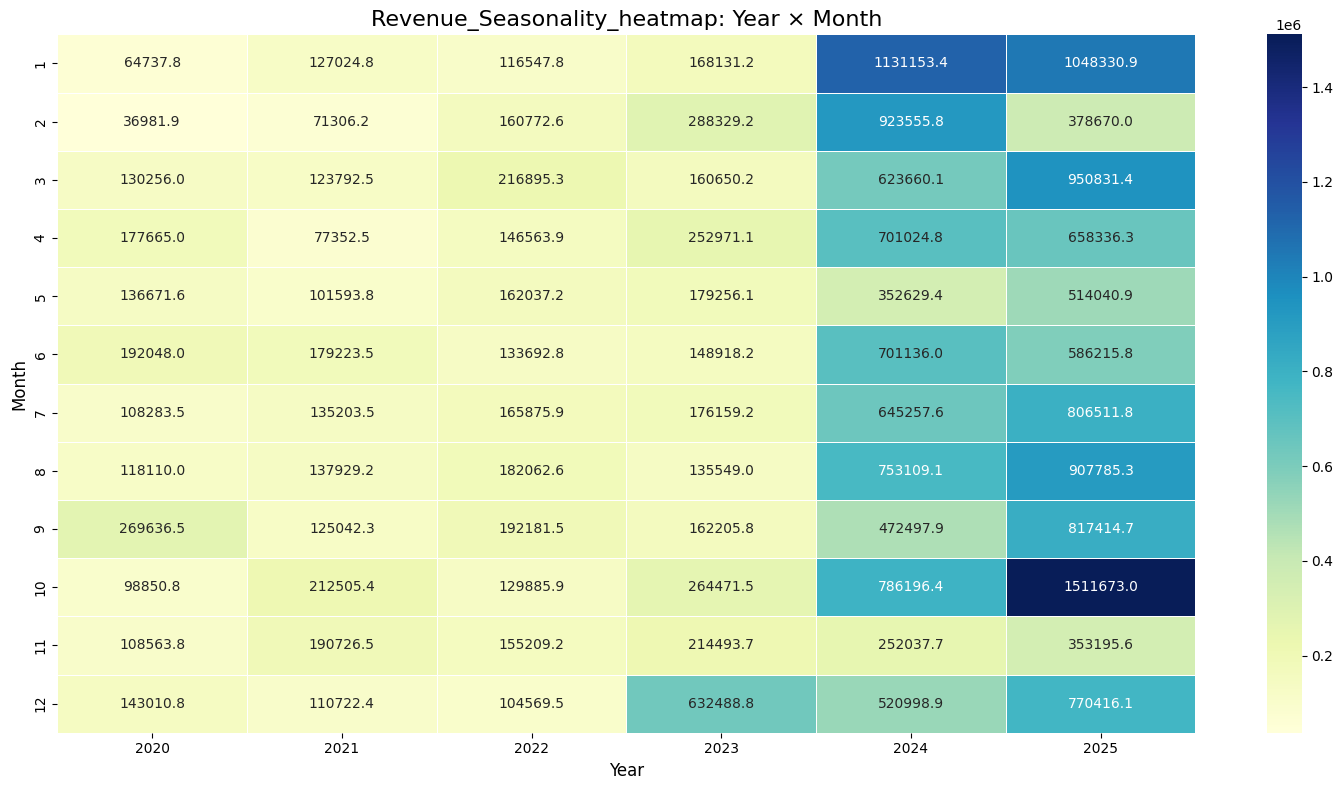

In [42]:
Seasonality_heatmap = Financial_df.pivot_table(index='Month', columns='Year', values='Creditor', aggfunc='sum')
Seasonality_heatmap = Seasonality_heatmap.apply(pd.to_numeric, errors='coerce')

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(Seasonality_heatmap, annot=True, cmap='YlGnBu', linewidths=0.5, fmt='.1f')

# Add title and labels
plt.title('Revenue_Seasonality_heatmap: Year × Month', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Month', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

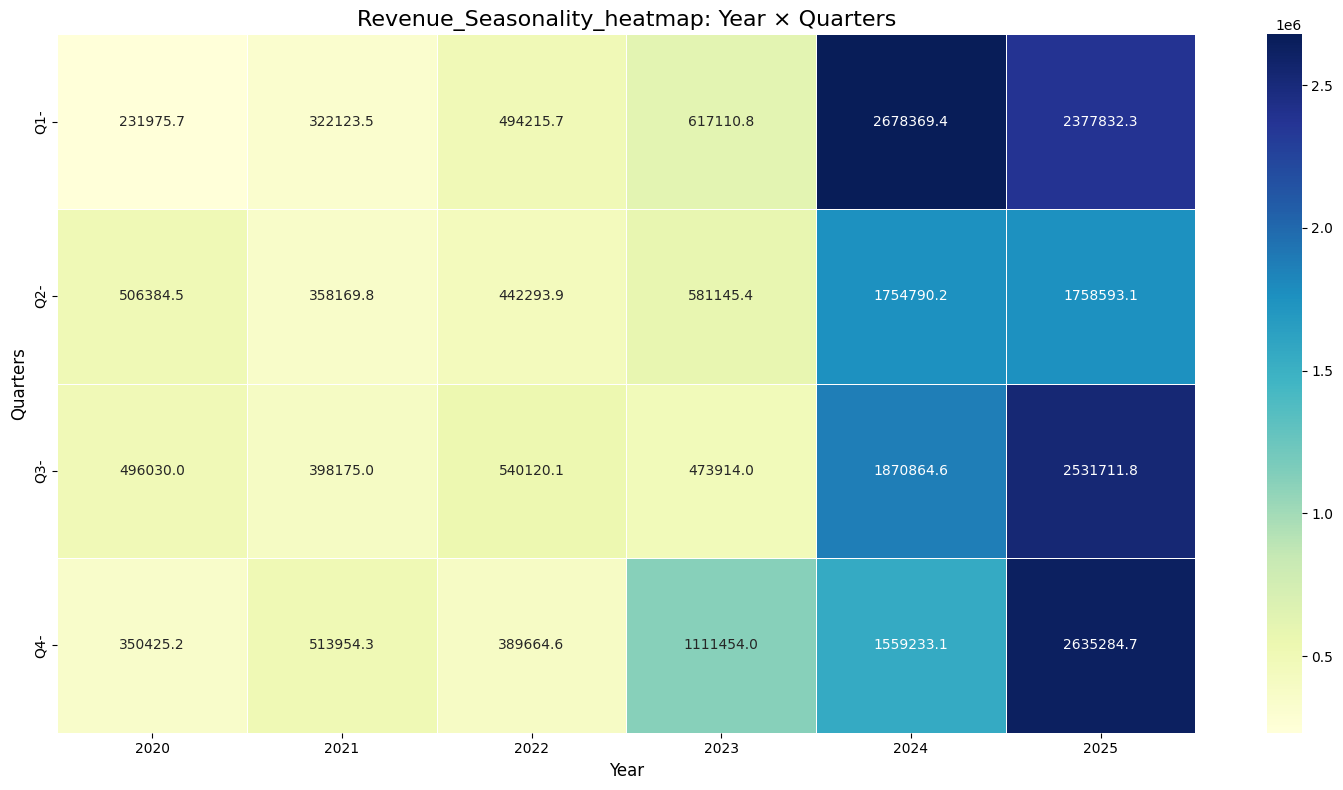

In [128]:
Financial_df['Quarters'] = pd.PeriodIndex(Financial_df['Date'], freq='Q').strftime('Q%q-')

Seasonality_Q_heatmap = Financial_df.pivot_table(index='Quarters', columns='Year', values='Creditor', aggfunc='sum')
Seasonality_Q_heatmap = Seasonality_Q_heatmap.apply(pd.to_numeric, errors='coerce')

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(Seasonality_Q_heatmap, annot=True, cmap='YlGnBu', linewidths=0.5, fmt='.1f')

# Add title and labels
plt.title('Revenue_Seasonality_heatmap: Year × Quarters', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Quarters', fontsize=12)

# Show the plot
plt.tight_layout()
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/sales_in_quarters.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()

### Insight 5: Performance in Pharmaceutical vs. Consumables Branches
#### The pharmaceutical branch performed exceptionally well, especially in Q3 and Q4 of 2025, suggesting the emergence of a new strategic direction. In contrast, the consumables branch showed stable performance, with no growth in sales from 2024 to 2025. This lack of growth indicates the need for a renewed strategy for the consumables branch in 2026 to avoid potential losses. It is recommended that the sales team for the consumables branch be restructured and that additional sales force be added to drive future growth.


## Sales by Product Category

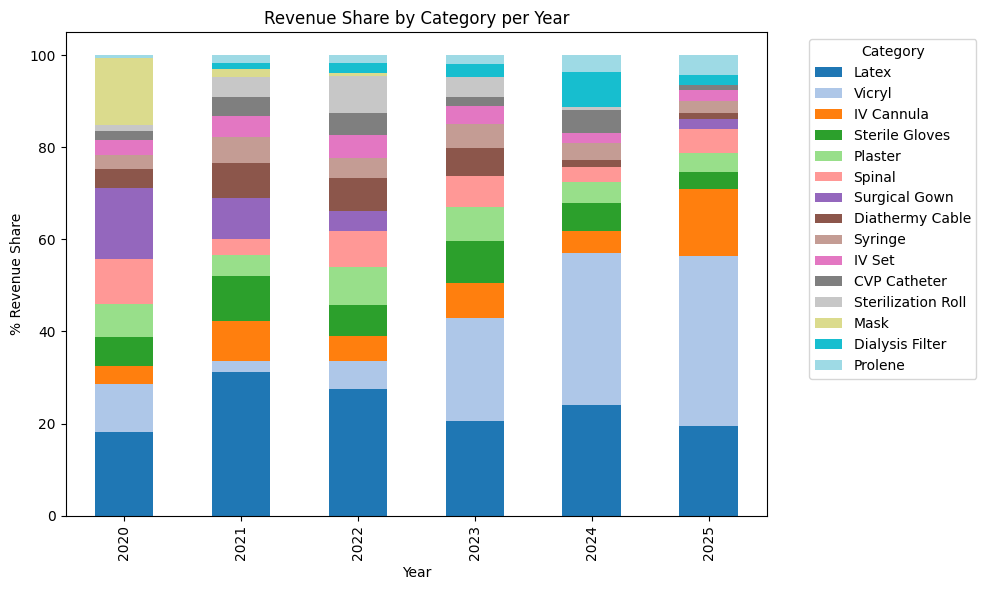

In [44]:
Revenue_per_category = original_df.groupby('Category')['Total Selling Price'].sum().reset_index().sort_values(by='Total Selling Price', ascending=False).reset_index()
Revenue_per_category.head(15)
top_15_categories = Revenue_per_category['Category'].head(15).to_list()

category_years = original_df[original_df['Category'].isin(top_15_categories)].groupby(['Year','Category'])["Total Selling Price"].sum().reset_index().sort_values(by=['Year','Total Selling Price'], ascending=[True,False])

category_years_pivot = category_years.pivot(index='Year', columns='Category', values='Total Selling Price')
pivot_percent = category_years_pivot.div(category_years_pivot.sum(axis=1), axis=0) * 100
sorted_columns = pivot_percent.sum().sort_values(ascending=False).index
pivot_percent = pivot_percent[sorted_columns]

pivot_percent.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
plt.ylabel('% Revenue Share')
plt.title('Revenue Share by Category per Year')
# Move legend outside the plot
plt.legend(
    title='Category',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/top 15 categories.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()

In [45]:
Revenue_per_category

,index,Category,Total Selling Price
0,205,Vicryl,2360092.8112
1,106,Latex,2265399.4
2,95,IV Cannula,835313.8
3,171,Sterile Gloves,629604.35
4,139,Plaster,565979.601373
...,...,...,...
201,143,Potassium Permengnate,53.352
202,124,Nose Filler,50
203,89,Hegama Cups,35
204,99,Ice Bag,25


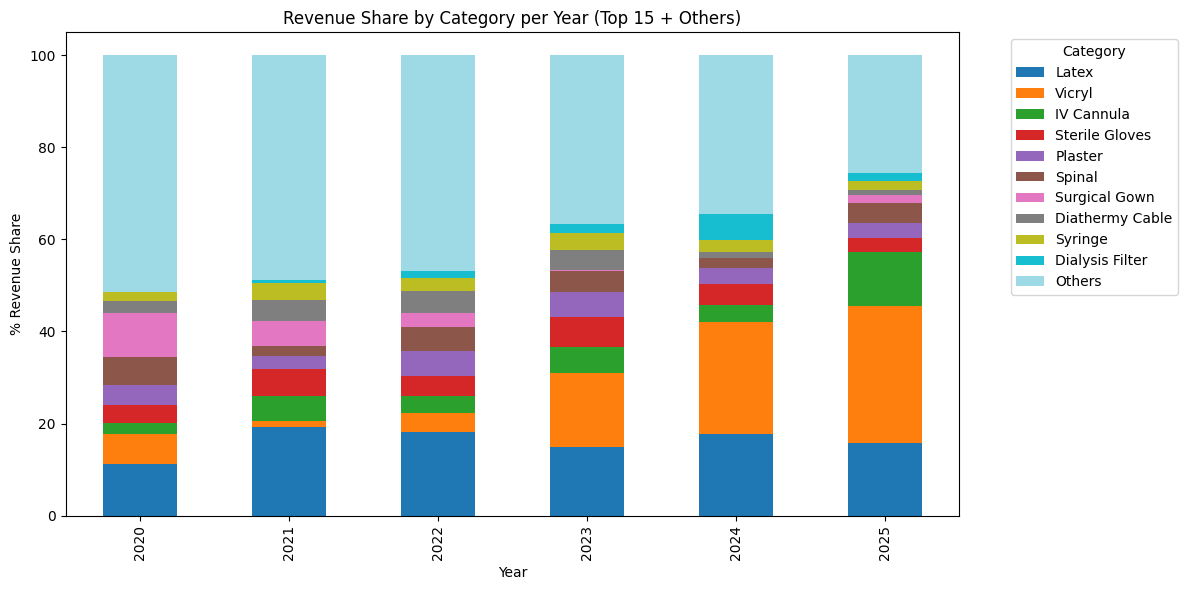

In [46]:




# Step 1: Find top 15 categories
Revenue_per_category = (
    original_df.groupby('Category')['Total Selling Price']
    .sum()
    .reset_index()
    .sort_values(by='Total Selling Price', ascending=False)
)
top_10_categories = Revenue_per_category['Category'].head(10).to_list()

# Step 2: Create a new column that labels top categories vs. "Others"
original_df['Category_Grouped'] = original_df['Category'].where(
    original_df['Category'].isin(top_10_categories), 'Others'
)

# Step 3: Group again by year and grouped category
category_years = (
    original_df.groupby(['Year', 'Category_Grouped'])['Total Selling Price']
    .sum()
    .reset_index()
    .sort_values(by=['Year', 'Total Selling Price'], ascending=[True, False])
)

# Step 4: Pivot for stacked bar
category_years_pivot = category_years.pivot(
    index='Year', columns='Category_Grouped', values='Total Selling Price'
)

# Step 5: Convert to % of revenue share
pivot_percent = category_years_pivot.div(category_years_pivot.sum(axis=1), axis=0) * 100

# Step 6: Sort columns (keep "Others" last)
sorted_columns = (
    pivot_percent.drop(columns='Others', errors='ignore').sum().sort_values(ascending=False).index
)
if 'Others' in pivot_percent.columns:
    sorted_columns = sorted_columns.insert(len(sorted_columns), 'Others')

pivot_percent = pivot_percent[sorted_columns]

# Step 7: Plot
pivot_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    colormap='tab20'
)
plt.ylabel('% Revenue Share')
plt.title('Revenue Share by Category per Year (Top 15 + Others)')

# Legend outside
plt.legend(
    title='Category',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/categories share.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()


In [47]:
pivot_percent

Category_Grouped,Latex,Vicryl,IV Cannula,Sterile Gloves,Plaster,Spinal,Surgical Gown,Diathermy Cable,Syringe,Dialysis Filter,Others
Year,,,,,,,,,,,
2020,11.18161,6.480386,2.424266,3.879424,4.480944,6.054056,9.544748,2.54175,1.898033,NaN,51.514783
2021,19.182775,1.378336,5.35528,5.943507,2.898978,2.060568,5.546742,4.544271,3.525794,0.778402,48.785346
2022,18.246808,4.039884,3.61571,4.453925,5.467851,5.20057,2.974422,4.721447,2.930034,1.550789,46.798562
2023,14.849167,16.08318,5.638018,6.497159,5.406085,4.735692,0.065804,4.451469,3.667214,2.048002,36.55821
2024,17.716054,24.455915,3.654556,4.417676,3.461551,2.302531,NaN,1.190223,2.676097,5.562318,34.563077
2025,15.675873,29.860211,11.778251,3.00121,3.319859,4.330937,1.73379,0.953045,2.142818,1.653799,25.550207


### Insight 6: Category Performance
#### The Vicryl and IV Cannula categories have shown significant growth, with a 5% increase in Vicryl and an 8% increase in IV Cannula market share. Latex, on the other hand, has maintained a stable share of approximately 16%, while Spinal products have seen a notable increase from 2% to 4%. To further enhance profitability in 2026, it is recommended to either increase the gross profit from these categories or negotiate better deals with suppliers to lower costs.

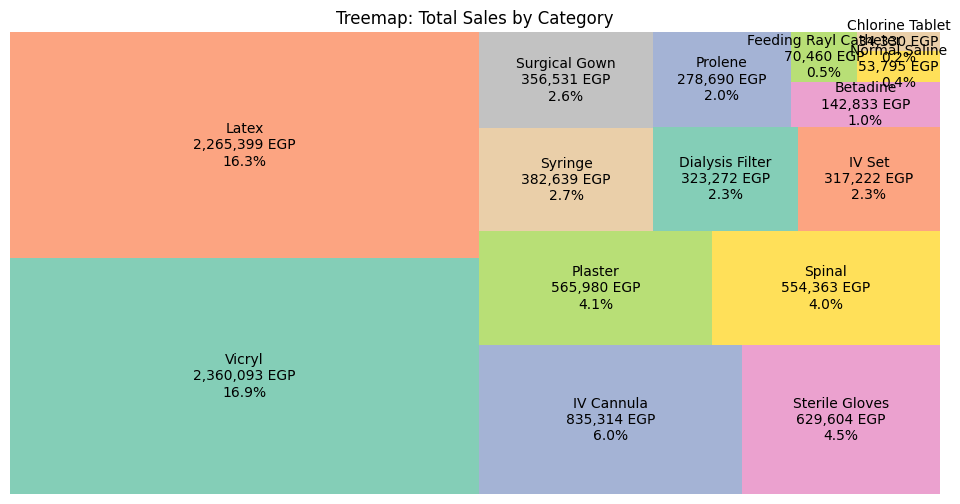

In [129]:
! pip install squarify
import squarify

category_total = original_df[original_df['Category'].isin(top_15_categories)].groupby('Category')['Total Selling Price'].sum().reset_index()
category_total = category_total.sort_values(by='Total Selling Price', ascending=False)
category_total['Total Selling Price'] = pd.to_numeric(category_total['Total Selling Price'], errors='coerce')

plt.figure(figsize=(12, 6))
# Format labels with commas
labels = [
    f"{cat}\n{val:,.0f} EGP\n{pct:.1f}%" 
    for cat, val, pct in zip(
        category_total['Category'], 
        category_total['Total Selling Price'], 
        (category_total['Total Selling Price'] / original_df['Total Selling Price'].sum() * 100)
    )
]
squarify.plot(sizes=category_total['Total Selling Price'], 
              label = labels,
            #   label=category_total['Category'] + "\n" + category_total['Total Selling Price'].round(0).astype(str) + "\n" + (category_total['Total Selling Price'] / original_df['Total Selling Price'].sum() * 100).round(1).astype(str) + '%', 
              color=sns.color_palette('Set2', len(category_total)), 
              alpha=0.8)

plt.axis('off')
plt.title('Treemap: Total Sales by Category')
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/categories_treemap_sales.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()

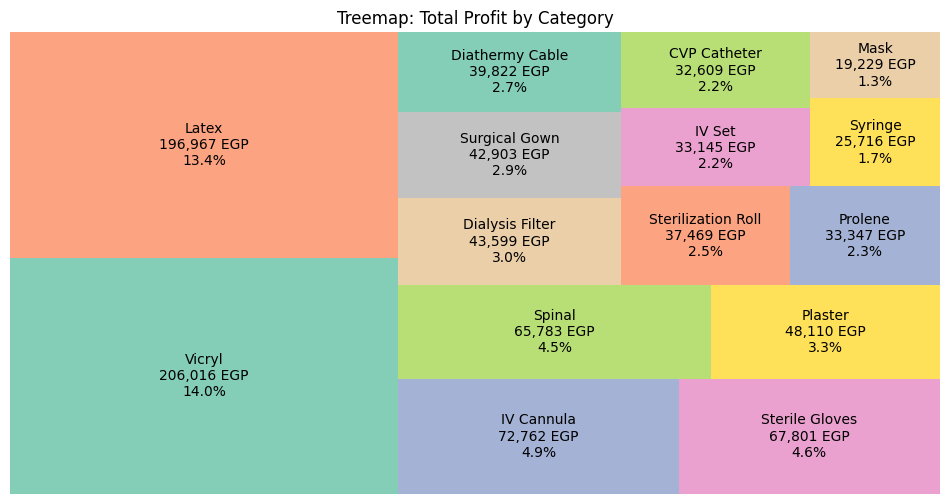

In [49]:
category_total_profit = original_df[original_df['Category'].isin(top_15_categories)].groupby('Category')['Profit'].sum().reset_index()
category_total_profit = category_total_profit.sort_values(by='Profit', ascending=False)
category_total_profit['Profit'] = pd.to_numeric(category_total_profit['Profit'], errors='coerce')

plt.figure(figsize=(12, 6))
# Format labels with commas
labels = [
    f"{cat}\n{val:,.0f} EGP\n{pct:.1f}%" 
    for cat, val, pct in zip(
        category_total_profit['Category'], 
        category_total_profit['Profit'], 
        (category_total_profit['Profit'] / original_df['Profit'].sum() * 100)
    )
]
squarify.plot(sizes=category_total_profit['Profit'], 
              label = labels,
            #   label=category_total['Category'] + "\n" + category_total['Total Selling Price'].round(0).astype(str) + "\n" + (category_total['Total Selling Price'] / original_df['Total Selling Price'].sum() * 100).round(1).astype(str) + '%', 
              color=sns.color_palette('Set2', len(category_total)), 
              alpha=0.8)

plt.axis('off')
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/categories treemap profit.jpg', bbox_inches = 'tight', dpi = 200)
plt.title('Treemap: Total Profit by Category')
plt.show()

### Insight 7: Profitability from Main Categories
#### The top three categories—Latex, Vicryl, and IV Cannula—account for nearly 40% of total sales in the consumables branch, which is significant. However, the profitability from these categories is currently around 32%, which suggests there is room for improvement. A strategic focus on maximizing profits from these high-volume categories is necessary.

### 2025

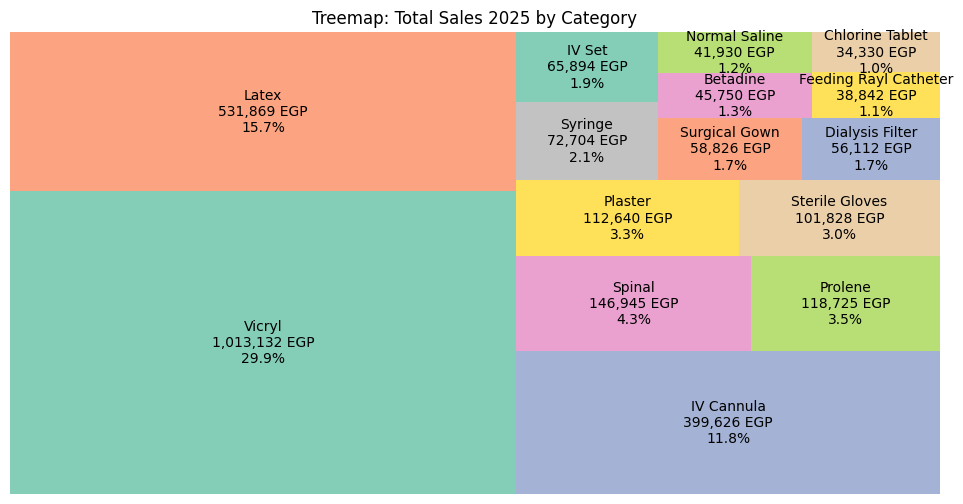

In [50]:
Revenue_per_category = original_df[original_df['Year'] == 2025].groupby('Category')['Total Selling Price'].sum().reset_index().sort_values(by='Total Selling Price', ascending=False).reset_index()
Revenue_per_category.head(15)
top_15_categories = Revenue_per_category['Category'].head(15).to_list()

category_total = original_df[(original_df['Category'].isin(top_15_categories)) & (original_df['Year'] == 2025)].groupby('Category')['Total Selling Price'].sum().reset_index()
category_total = category_total.sort_values(by='Total Selling Price', ascending=False)
category_total['Total Selling Price'] = pd.to_numeric(category_total['Total Selling Price'], errors='coerce')

plt.figure(figsize=(12, 6))
# Format labels with commas
labels = [
    f"{cat}\n{val:,.0f} EGP\n{pct:.1f}%" 
    for cat, val, pct in zip(
        category_total['Category'], 
        category_total['Total Selling Price'], 
        (category_total['Total Selling Price'] / original_df[original_df['Year'] == 2025]['Total Selling Price'].sum() * 100)
    )
]
squarify.plot(sizes=category_total['Total Selling Price'], 
              label = labels,
            #   label=category_total['Category'] + "\n" + category_total['Total Selling Price'].round(0).astype(str) + "\n" + (category_total['Total Selling Price'] / original_df['Total Selling Price'].sum() * 100).round(1).astype(str) + '%', 
              color=sns.color_palette('Set2', len(category_total)), 
              alpha=0.8)

plt.axis('off')
plt.title('Treemap: Total Sales 2025 by Category')
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/categories treemap sales 2025.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()

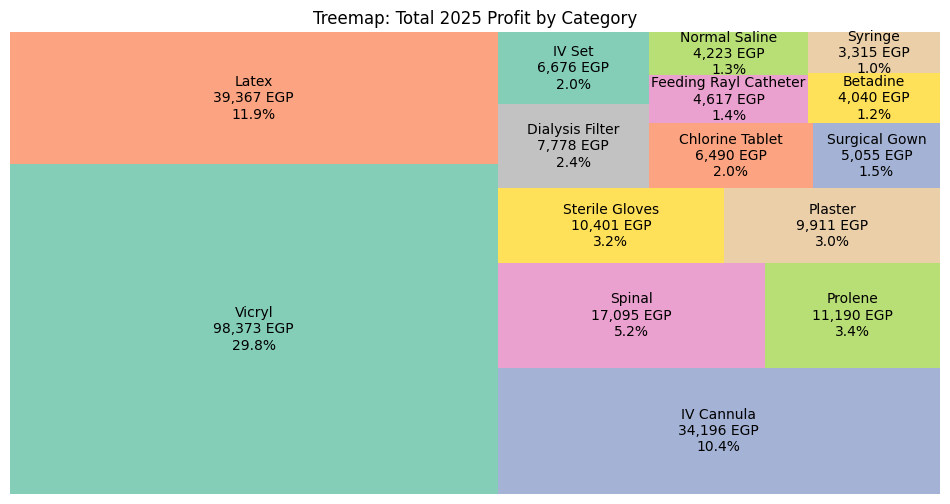

In [51]:
category_total_profit_25 = original_df[(original_df['Category'].isin(top_15_categories)) & (original_df['Year'] == 2025)].groupby('Category')['Profit'].sum().reset_index()
category_total_profit_25 = category_total_profit_25.sort_values(by='Profit', ascending=False)
category_total_profit_25['Profit'] = pd.to_numeric(category_total_profit_25['Profit'], errors='coerce')

plt.figure(figsize=(12, 6))
# Format labels with commas
labels = [
    f"{cat}\n{val:,.0f} EGP\n{pct:.1f}%" 
    for cat, val, pct in zip(
        category_total_profit_25['Category'], 
        category_total_profit_25['Profit'], 
        (category_total_profit_25['Profit'] / original_df[original_df['Year'] == 2025]['Profit'].sum() * 100)
    )
]
squarify.plot(sizes=category_total_profit_25['Profit'], 
              label = labels,
            #   label=category_total['Category'] + "\n" + category_total['Total Selling Price'].round(0).astype(str) + "\n" + (category_total['Total Selling Price'] / original_df['Total Selling Price'].sum() * 100).round(1).astype(str) + '%', 
              color=sns.color_palette('Set2', len(category_total_profit_25)), 
              alpha=0.8)

plt.axis('off')
plt.title('Treemap: Total 2025 Profit by Category')
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/categories treemap profit 2025.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()

### Insight 8: Sales vs. Profit for Top Categories
#### In 2025, approximately 60% of consumables sales came from the top three categories, yet the profit from these categories represented only 52% of total profits. While this shows that the firm is on the right track, it is essential that the profit percentage surpasses the sales percentage in these categories in the upcoming year to further optimize profitability.

In [52]:
df_2025 = original_df[original_df['Year'] == 2025].groupby(['Product Name','Client']).agg(Total_Selling_Price=("Total Selling Price", "sum"),
                                                                           profit = ("Profit", "sum")).reset_index().sort_values(by=['Product Name','Total_Selling_Price'], ascending=True)
df_2025['pecentage'] = df_2025['Total_Selling_Price'] / df_2025['Total_Selling_Price'].sum() * 100
df_2025['Profit_Margin'] = df_2025['profit'] / df_2025['Total_Selling_Price'] * 100
df_2025.head(30)

,Product Name,Client,Total_Selling_Price,profit,pecentage,Profit_Margin
0,ابر اسباينال اسود مقاس ٢٢,Sharqia,4200,250,0.123787,5.952381
1,ابر اسباينال اسود مقاس ٢٢,Taha Yasen,13420.0,2020.0,0.39553,15.052161
4,ابر اسباينال برتقالي مقاس ٢٥,Montazah,3775,100,0.111261,2.649007
2,ابر اسباينال برتقالي مقاس ٢٥,Eman Khairy,3950,100,0.116419,2.531646
5,ابر اسباينال برتقالي مقاس ٢٥,Sharqia,4200,350,0.123787,8.333333
6,ابر اسباينال برتقالي مقاس ٢٥,Taha Yasen,27100.0,4575.0,0.798723,16.881919
3,ابر اسباينال برتقالي مقاس ٢٥,Jasmin,90300,9700,2.661428,10.741971
7,اسورة تعريف أطفال,Amina,425,25,0.012526,5.882353
8,اسورة تعريف كبار,Arkan Center,100,20,0.002947,20.0
9,اليكترود,Taha Yasen,2100,210,0.061894,10.0


### Insight 9: Product Portfolio Optimization
#### Over the years, the number of products offered has decreased, with just three main categories now accounting for over 50% of total sales. This indicates that the firm has successfully identified its core market segments. To capitalize on this, the firm should consider building stronger relationships with suppliers for these categories and revisiting the profitability of these products to ensure they are targeting the right market segments.

## Top 10 Customers by Revenue (Pareto 80/20)

### Consumables

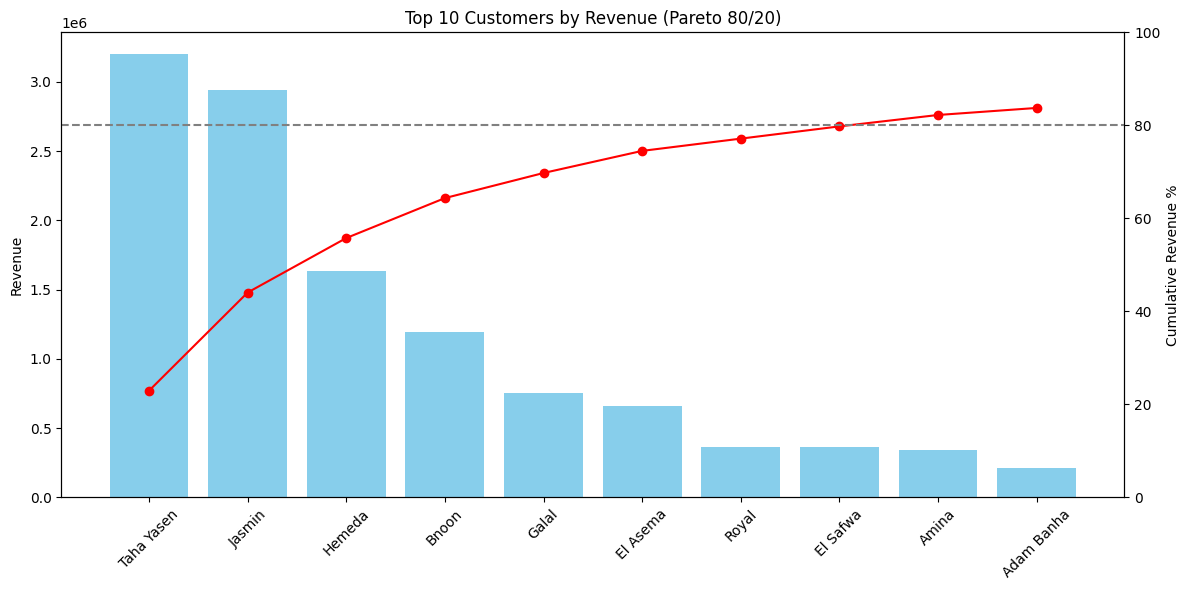

In [53]:
Customer_data = original_df.groupby('Client').agg(Sales_sum=("Total Selling Price", "sum"),
                                 Profit_sum=("Profit", "sum"),
                                 Transactions_count=("Invoice No", "nunique"),
                                 Products_No=("Product Name", "nunique"),
                                 Category_No=("Category", "nunique"),
                                 years_in_business=("Year", "nunique"),
                                 Units_sold=("Qty.", "sum")).reset_index().sort_values(by='Sales_sum', ascending=False)
Customer_data['Contribution Margin %'] = Customer_data['Profit_sum'] / Customer_data['Sales_sum'] * 100
Customer_data['Cumalative_Sales_%'] = Customer_data['Sales_sum'].cumsum() / Customer_data['Sales_sum'].sum() * 100

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart (Revenue)
ax1.bar(Customer_data['Client'][:10], Customer_data['Sales_sum'][:10], color='skyblue')
ax1.set_ylabel('Revenue')
ax1.tick_params(axis='x', rotation=45)

# Line chart (Cumulative %)
ax2 = ax1.twinx()
ax2.plot(Customer_data['Client'][:10], Customer_data['Cumalative_Sales_%'][:10], color='red', marker='o', linestyle='-')
ax2.set_ylabel('Cumulative Revenue %')
ax2.axhline(80, color='gray', linestyle='--')  # 80% reference line
ax2.set_ylim(0, 100)


# Title
plt.title('Top 10 Customers by Revenue (Pareto 80/20)')

plt.tight_layout()
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/top consumables customers revenue.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()



In [54]:
Customer_data2 = Financial_df.groupby('Client').agg(Sales_sum=("Creditor", "sum"),
                                 Transactions_count=("Creditor", "count"),
                                 COGS_sum = ("Cogs", "sum"),
                                 years_in_business=("Year", "nunique"),).reset_index().sort_values(by='Sales_sum', ascending=False)
Customer_data2['Profit_sum'] = Customer_data2['Sales_sum'] - Customer_data2['COGS_sum']
Customer_data2['Contribution Margin %'] = Customer_data2['Profit_sum'] / Customer_data2['Sales_sum'] * 100
Customer_data2['Cumalative_Sales_%'] = Customer_data2['Sales_sum'].cumsum() / Customer_data2['Sales_sum'].sum() * 100
Customer_data2['Cumalative_Profit_%'] = Customer_data2['Profit_sum'].cumsum() / Customer_data2['Profit_sum'].sum() * 100

### All Customers (Consumables + Pharmaceuticals)

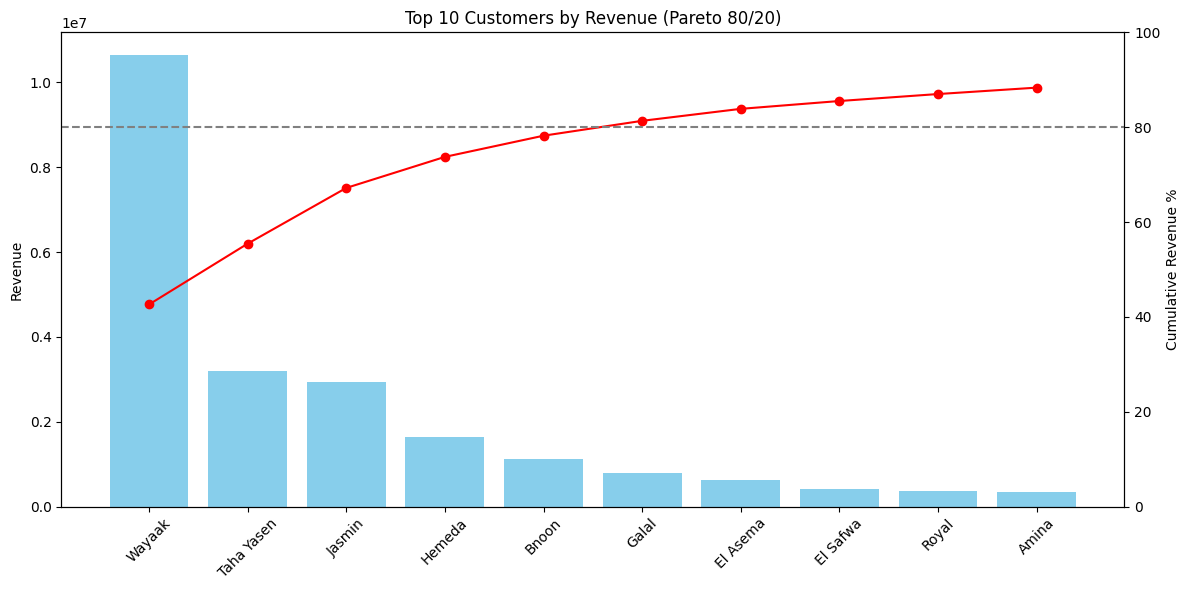

In [130]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart (Revenue)
ax1.bar(Customer_data2['Client'][:10], Customer_data2['Sales_sum'][:10], color='skyblue')
ax1.set_ylabel('Revenue')
ax1.tick_params(axis='x', rotation=45)

# Line chart (Cumulative %)
ax2 = ax1.twinx()
ax2.plot(Customer_data2['Client'][:10], Customer_data2['Cumalative_Sales_%'][:10], color='red', marker='o', linestyle='-')
ax2.set_ylabel('Cumulative Revenue %')
ax2.axhline(80, color='gray', linestyle='--')  # 80% reference line
ax2.set_ylim(0, 100)


# Title
plt.title('Top 10 Customers by Revenue (Pareto 80/20)')

plt.tight_layout()
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/top_customers_revenue.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()

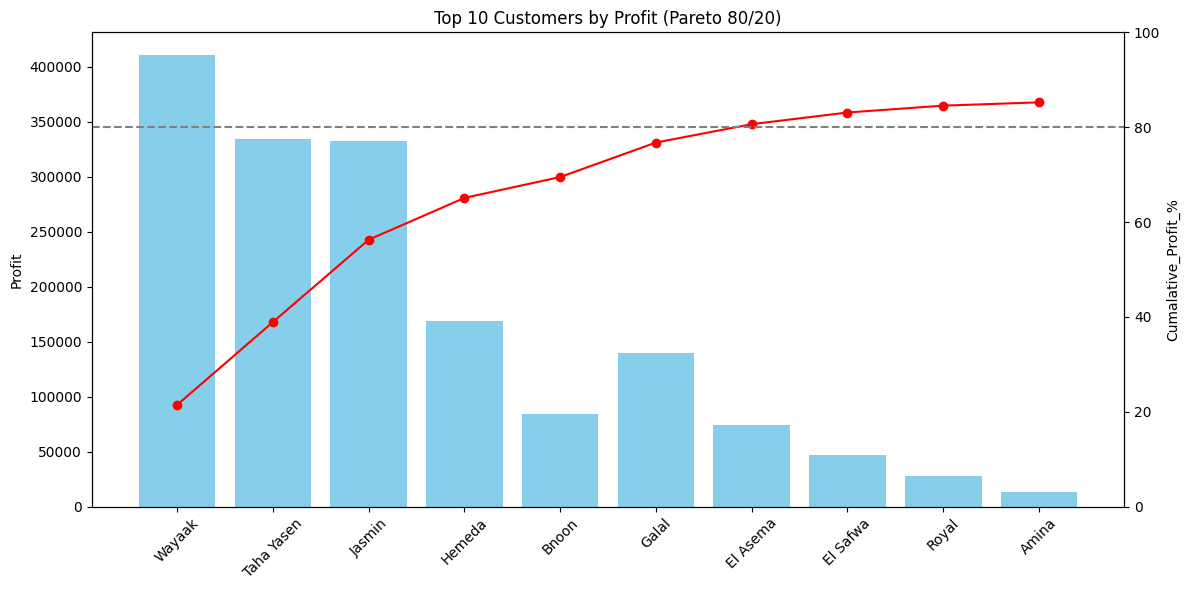

In [56]:


fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart (Revenue)
ax1.bar(Customer_data2['Client'][:10], Customer_data2['Profit_sum'][:10], color='skyblue')
ax1.set_ylabel('Profit')
ax1.tick_params(axis='x', rotation=45)

# Line chart (Cumulative %)
ax2 = ax1.twinx()
ax2.plot(Customer_data2['Client'][:10], Customer_data2['Cumalative_Profit_%'][:10], color='red', marker='o', linestyle='-')
ax2.set_ylabel('Cumalative_Profit_%')
ax2.axhline(80, color='gray', linestyle='--')  # 80% reference line
ax2.set_ylim(0, 100)


# Title
plt.title('Top 10 Customers by Profit (Pareto 80/20)')

plt.tight_layout()
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/top customers profit.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()

### Insight 10: Customer Concentration
#### A large proportion of sales—approximately 80%—comes from just six customers. While the firm has successfully retained four of these customers, two were lost due to their financial difficulties. This concentration of sales presents a risk to stability, and it is highly recommended to diversify the customer base by adding either two large accounts or four smaller ones to mitigate this risk. Additionally, the pharmaceutical branch, which serves only one customer, has proven more profitable than the consumables branch, signaling its strong potential in 2026.


### AVG order per year 
### Consumables only

In [57]:
yearly_sales = original_df.groupby('Year').agg(Unique_Customers_per_Year = ('Client' , 'nunique'),
                                Sales_sum=("Total Selling Price", "sum"),
                                Profit_sum=("Profit", "sum"),
                                Products_No=("Product Name", "nunique"),
                                Category_No=("Category", "nunique"),
                                Transactions_count=("Invoice No", "nunique")).reset_index()
yearly_sales['AOV'] = yearly_sales['Sales_sum'] / yearly_sales['Transactions_count']
yearly_sales['Purchase_Frequency'] = yearly_sales['Transactions_count'] / yearly_sales["Year"].nunique()
yearly_sales['Gross_Margin'] = yearly_sales['Profit_sum'] / yearly_sales['Sales_sum']
yearly_sales['CLV'] = (yearly_sales['AOV'] * yearly_sales['Purchase_Frequency'] * yearly_sales['Gross_Margin']) / (1 + 0.1 - 0.95)  # Assuming Discount Rate = 10% and Retention Rate = 95%
yearly_sales

,Year,Unique_Customers_per_Year,Sales_sum,Profit_sum,Products_No,Category_No,Transactions_count,AOV,Purchase_Frequency,Gross_Margin,CLV
0,2020,47,1577652.9625,153163.8875,314,125,531,2971.097858,88.500000,0.097083,170182.097222
1,2021,25,1593007.228431,142354.188431,414,143,423,3765.974535,70.500000,0.089362,158171.320479
2,2022,21,1926761.1328,272364.6228,318,123,419,4598.475257,69.833333,0.141359,302627.358667
3,2023,21,2206541.3,258070.41,265,113,267,8264.199625,44.500000,0.116957,286744.9
4,2024,15,3230487.95,319351.23,227,99,177,18251.34435,29.500000,0.098855,354834.7
5,2025,14,3392914.76,329935.86,240,108,165,20563.119758,27.500000,0.097243,366595.4


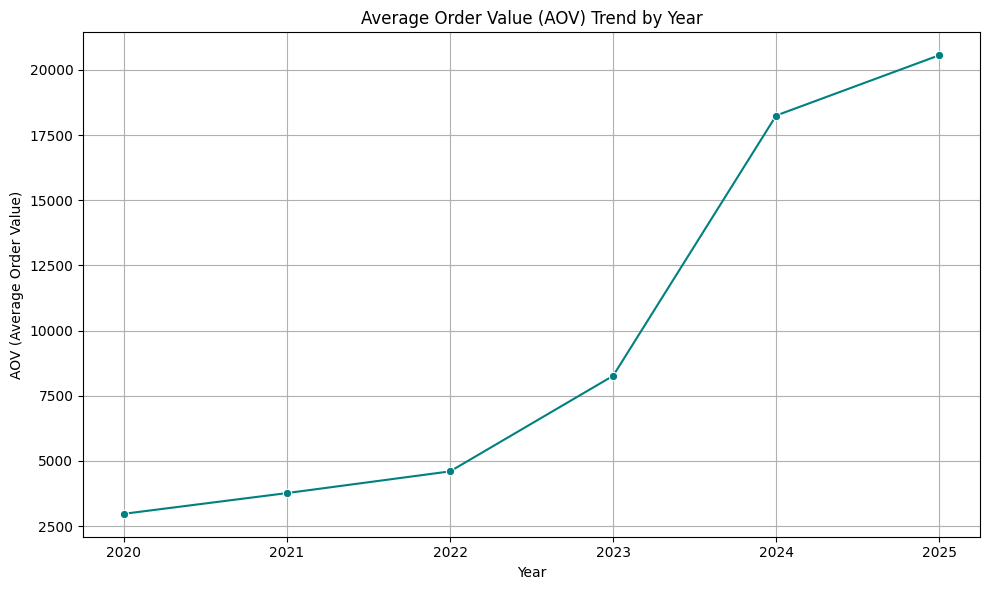

In [58]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_sales, x='Year', y='AOV', marker='o', color='teal')
plt.title('Average Order Value (AOV) Trend by Year')
plt.xlabel('Year')
plt.ylabel('AOV (Average Order Value)')
plt.grid(True)
plt.tight_layout()
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/AOV_Trend_by_Year(consumables).jpg', bbox_inches = 'tight', dpi = 200)

plt.show()

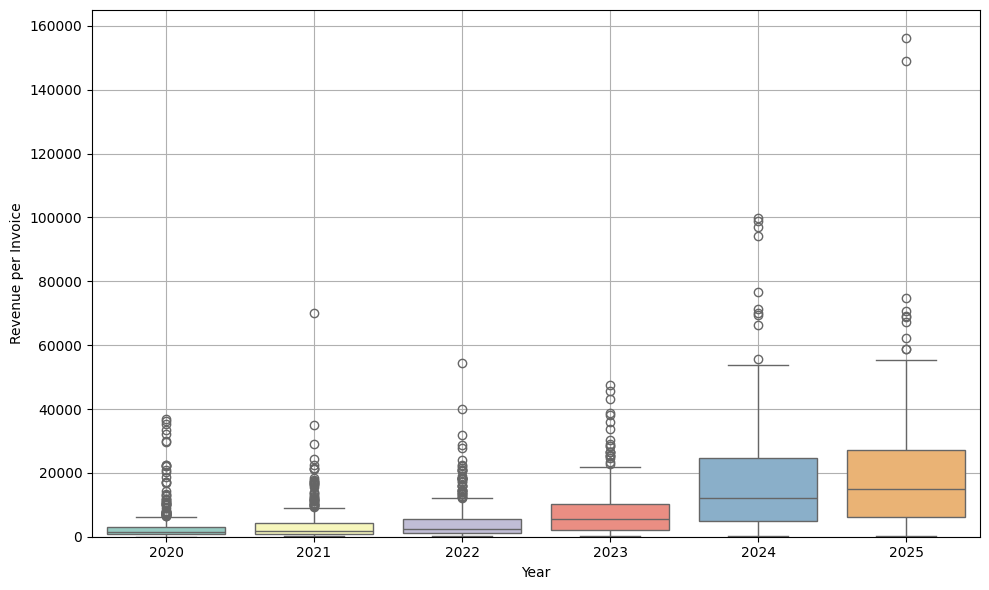

In [59]:
aov_boxplot = original_df.groupby(['Year', 'Invoice No'])['Total Selling Price'].sum().reset_index()
aov_boxplot

plt.figure(figsize=(10, 6))

sns.boxplot(data=aov_boxplot, x='Year', y='Total Selling Price',hue= 'Year', palette='Set3',legend = False)
plt.xlabel('Year')
plt.ylabel('Revenue per Invoice')
plt.ylim(0, 165000)  # Limit y-axis to focus on main distribution
plt.grid(True)
plt.tight_layout()
plt.show()

### Insight 11: Order Value and Operational Efficiency
#### The average order value and number of orders have shown a favorable trend, with the firm successfully eliminating undesirable sales and focusing on high-value customers. As a result, the average order value has increased while the number of orders has slightly decreased, leading to savings in operational expenses. It is recommended to further diversify the supplier base by adding one or two new suppliers to mitigate risk.

## 🔑 Customer Metrics


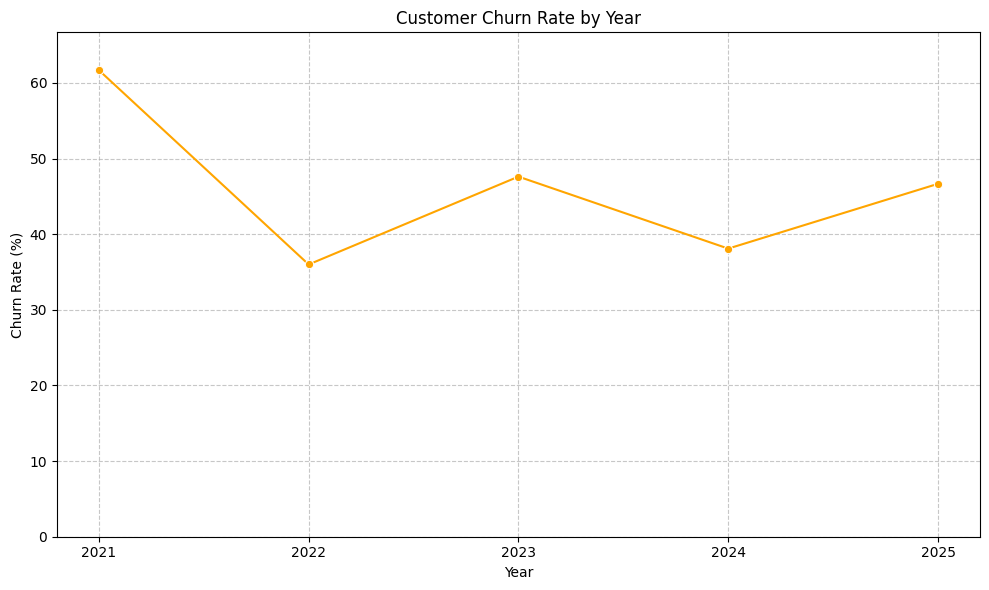

In [60]:
customers_per_year = original_df.groupby('Year')['Client'].unique().apply(set).reset_index()
customers_per_year

churn_data = []

for i in range(1, len(customers_per_year)):
    year = customers_per_year.loc[i, 'Year']
    current = customers_per_year.loc[i, 'Client']
    previous = customers_per_year.loc[i - 1, 'Client']
    
    lost = previous - current
    churn_rate = (len(lost) / len(previous)) * 100 if len(previous) > 0 else 0
    
    churn_data.append({
        'Year': year,
        'Customers at Start': len(previous),
        'Retained Customers': len(previous & current),
        'Lost Customers': len(lost),
        'new Customers': len(current - previous),
        'Churn Rate (%)': round(churn_rate, 2)
    })

churn_df = pd.DataFrame(churn_data)
churn_df

plt.figure(figsize=(10, 6))
sns.lineplot(data=churn_df, x='Year', y='Churn Rate (%)', marker='o', color='orange')
plt.title('Customer Churn Rate by Year')
plt.xlabel('Year')
plt.ylabel('Churn Rate (%)')
plt.xticks(churn_df['Year'])
plt.ylim(0, churn_df['Churn Rate (%)'].max() + 5)  # Add some space above the max churn rate
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Customer Churn Rate


In [61]:
customers_per_year = original_df.groupby('Year')['Client'].unique().apply(set).reset_index()
customers_per_year

,Year,Client
0,2020,"{Bnoon, Dr. Salah , Shady, Asmaa S Salem, El A..."
1,2021,"{Bnoon, Al Forkan, El Ahl, El Hayat, Sharqia ,..."
2,2022,"{Bnoon, Royal, Mr.Sameh, SHARQA, Dr. Islam Sam..."
3,2023,"{Bnoon, Royal, EL Mahd, Maghraby, Zohour El Ha..."
4,2024,"{Bnoon, Eman Khairy, EL Mahd, Wady El Tip, Hem..."
5,2025,"{Bnoon, Royal, Eman Khairy, Sharqia , Hemeda, ..."


In [62]:
churn_data = []

for i in range(1, len(customers_per_year)):
    year = customers_per_year.loc[i, 'Year']
    current = customers_per_year.loc[i, 'Client']
    previous = customers_per_year.loc[i - 1, 'Client']
    
    lost = previous - current
    churn_rate = (len(lost) / len(previous)) * 100 if len(previous) > 0 else 0
    
    churn_data.append({
        'Year': year,
        'Customers at Start': len(previous),
        'Retained Customers': len(previous & current),
        'Lost Customers': len(lost),
        'new Customers': len(current - previous),
        'Churn Rate (%)': round(churn_rate, 2)
    })

churn_df = pd.DataFrame(churn_data)
churn_df

,Year,Customers at Start,Retained Customers,Lost Customers,new Customers,Churn Rate (%)
0,2021,47,18,29,7,61.70
1,2022,25,16,9,5,36.00
2,2023,21,11,10,10,47.62
3,2024,21,13,8,2,38.10
4,2025,15,8,7,6,46.67


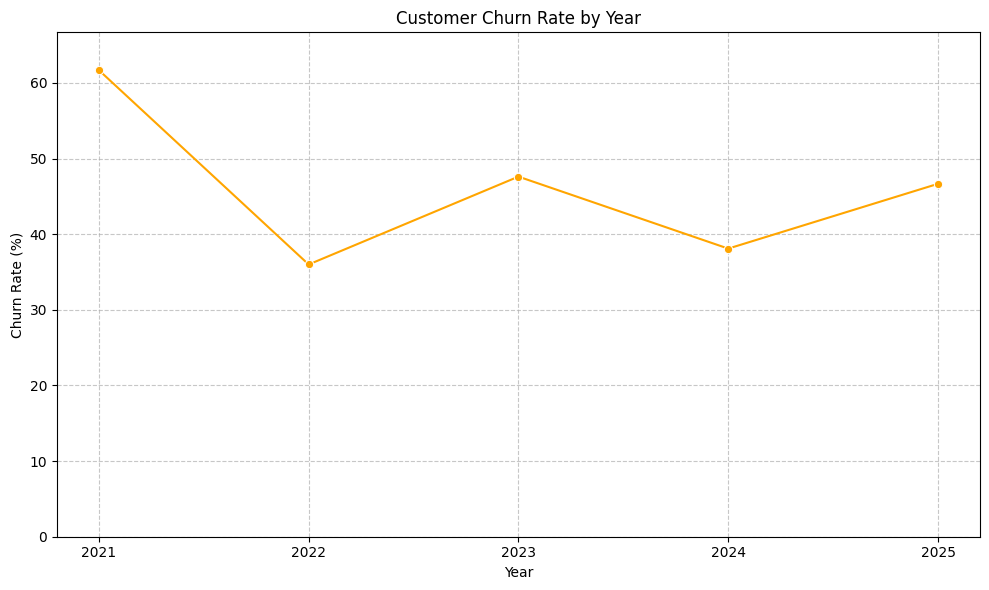

In [63]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=churn_df, x='Year', y='Churn Rate (%)', marker='o', color='orange')
plt.title('Customer Churn Rate by Year')
plt.xlabel('Year')
plt.ylabel('Churn Rate (%)')
plt.xticks(churn_df['Year'])
plt.ylim(0, churn_df['Churn Rate (%)'].max() + 5)  # Add some space above the max churn rate
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

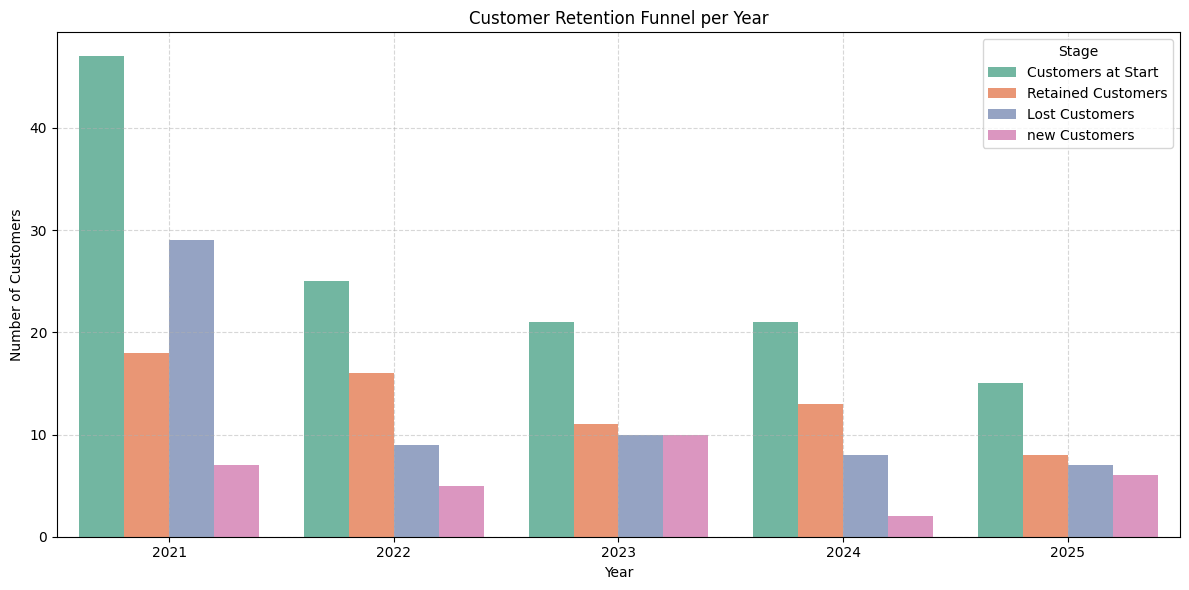

In [64]:
churn_df_long = churn_df.melt(
    id_vars='Year',
    value_vars=['Customers at Start', 'Retained Customers', 'Lost Customers','new Customers'],
    var_name='Stage',
    value_name='Customer Count'
)

plt.figure(figsize=(12, 6))
sns.barplot(data=churn_df_long, x='Year', y='Customer Count', hue='Stage', palette='Set2')
plt.title('Customer Retention Funnel per Year')
plt.ylabel('Number of Customers')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/Customer_Retention_Funnel_per_Year.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()


### Customer Concentration Risk


In [65]:
Customer_data

,Client,Sales_sum,Profit_sum,Transactions_count,Products_No,Category_No,years_in_business,Units_sold,Contribution Margin %,Cumalative_Sales_%
63,Taha Yasen,3197157.06,344915.64,351,238,97,6,139297,10.788198,22.955936
38,Jasmin,2939293.25,335280.1,112,118,53,3,78331,11.406827,44.060382
36,Hemeda,1631108.9,170082.97,238,238,99,6,92641.64,10.427444,55.771921
9,Bnoon,1196362,90045.5,54,23,15,6,38906,7.52661,64.361931
33,Galal,751274.2228,128073.3928,82,335,104,3,39588,17.047489,69.756161
...,...,...,...,...,...,...,...,...,...,...
43,Madina,900,225,1,1,1,1,3,25.0,99.990497
18,Dr. Salah,512.5,42.5,2,5,4,1,32,8.292683,99.994177
16,Dr. Islam Sameer,383,36.0,1,3,3,1,4,9.399478,99.996927
37,Ibn Sina,321,30,1,1,1,1,3,9.345794,99.999232


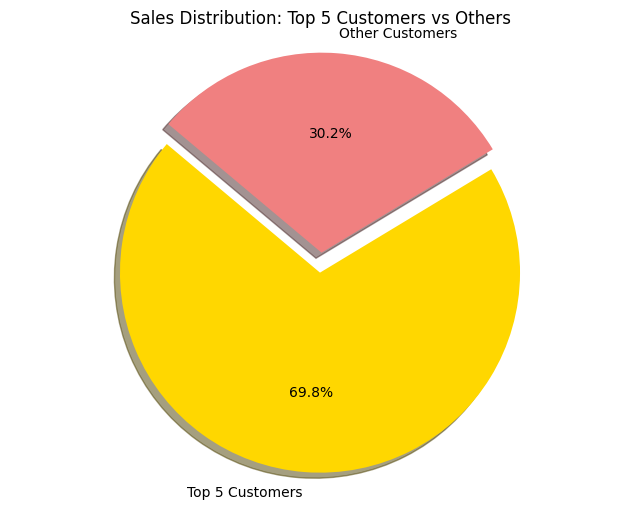

In [66]:
Top_5_customers_sales = Customer_data['Sales_sum'].head(5).sum()
other_customers_sales = Customer_data['Sales_sum'].iloc[5:].sum()

plt.figure(figsize=(8, 6))

plt.pie([Top_5_customers_sales, other_customers_sales], 
        labels=['Top 5 Customers', 'Other Customers'], 
        autopct='%1.1f%%', 
        colors=['gold', 'lightcoral'], 
        startangle=140, 
        explode=(0.1, 0), 
        shadow=True)
plt.title('Sales Distribution: Top 5 Customers vs Others')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/Sales_Distribution_Top_5_Customers_vs_Others.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()


In [67]:
top_4 = Customer_data[['Client', 'Sales_sum']].head(4)
top_4

,Client,Sales_sum
63,Taha Yasen,3197157.06
38,Jasmin,2939293.25
36,Hemeda,1631108.9
9,Bnoon,1196362


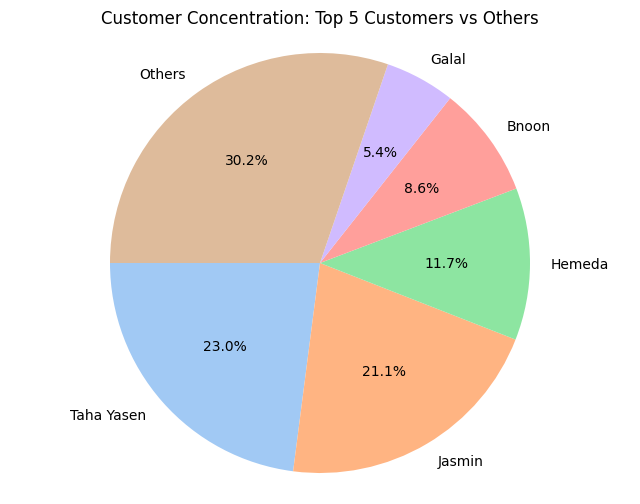

In [68]:
top_5 = Customer_data[['Client', 'Sales_sum']].head(5)
others = Customer_data['Sales_sum'].iloc[5:].sum()

labels = list(top_5['Client']) + ['Others']
sizes = list(top_5['Sales_sum']) + [others]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180, colors=sns.color_palette('pastel'))
plt.title('Customer Concentration: Top 5 Customers vs Others')
plt.axis('equal')  # Makes the pie chart a circle
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/Customer_Concentration_Top_5_Customers_vs_Others.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()

In [69]:
financial_group = Financial_df.groupby(['Client','Year']).agg(sales_sum=("Creditor", "sum"),
                                                              cogs_sum=("Cogs", "sum"),
                                                              Collection_sum=("Debitor", "sum")).reset_index().sort_values(by='sales_sum', ascending=False)
financial_group.head(20)
financial_group['Profit_sum'] = financial_group['sales_sum'] - financial_group['cogs_sum']
financial_group['Contribution Margin %'] = financial_group['Profit_sum'] / financial_group['sales_sum'] * 100
financial_group['AR'] = (financial_group['sales_sum'] - financial_group['Collection_sum'])
financial_group.head(10)

,Client,Year,sales_sum,cogs_sum,Collection_sum,Profit_sum,Contribution Margin %,AR
134,Wayaak,2025,5.506207e+06,5.286821e+06,5380648,219386.12250,3.984342,125558.6925
133,Wayaak,2024,4.572897e+06,4.404701e+06,4382553.87,168196.01813,3.678106,190343.51081
88,Jasmin,2025,1.287282e+06,1.134701e+06,1155000,152580.50000,11.852924,132281.5
87,Jasmin,2024,1.113075e+06,9.912499e+05,1055600,121825.35000,10.944934,57475.25
80,Hemeda,2024,7.142908e+05,6.634810e+05,726844,50809.77000,7.113318,-12553.25
125,Taha Yasen,2025,7.090525e+05,6.250782e+05,708386,83974.26700,11.843167,666.46
124,Taha Yasen,2024,6.986865e+05,6.017658e+05,690910,96920.71000,13.871845,7776.5
21,Bnoon,2025,5.799300e+05,5.416230e+05,579930,38307.00000,6.605452,0.0
132,Wayaak,2023,5.672195e+05,5.440473e+05,567219.5,23172.23500,4.085232,0.0
86,Jasmin,2023,5.351440e+05,4.769010e+05,485640,58243.00000,10.883613,49504.0


<Figure size 1200x600 with 0 Axes>

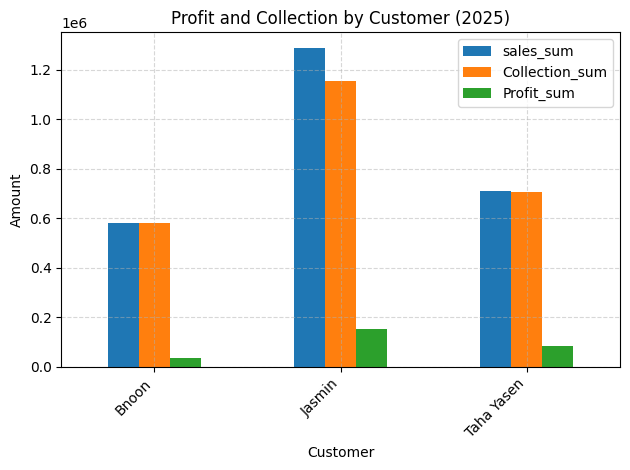

In [70]:

filtered_df = financial_group[
    (financial_group["Client"].isin(["Jasmin", "Taha Yasen", 'Bnoon'])) &
    (financial_group["Year"] == 2025)
]


summary = (
    filtered_df
    .groupby("Client")[["sales_sum", "Collection_sum",'Profit_sum']]
    .sum()
)

# plot grouped bar chart
plt.figure(figsize=(12, 6))
summary.plot(kind="bar")

plt.title("Profit and Collection by Customer (2025)")
plt.xlabel("Customer")
plt.ylabel("Amount")
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_1462/3280997882.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['AR %'] = filtered_df['AR'] / filtered_df['sales_sum'] * 100


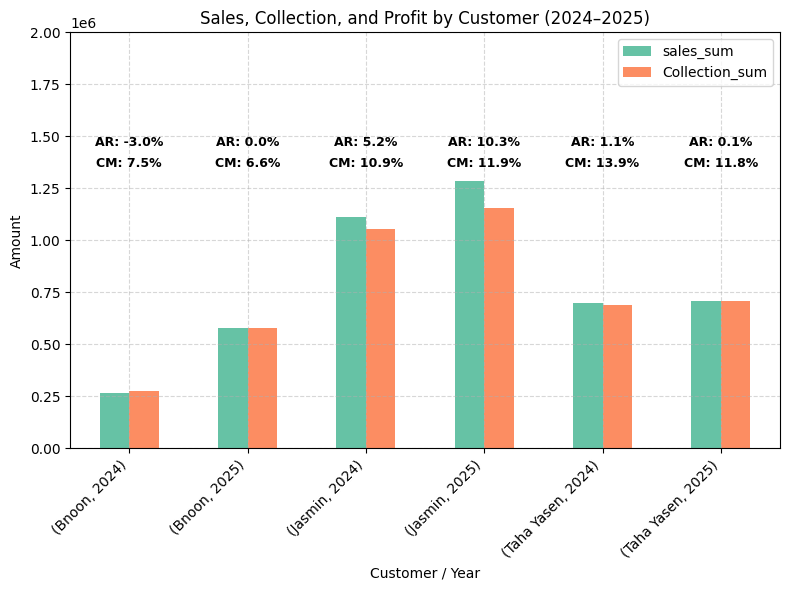

In [71]:
filtered_df = financial_group[
    (financial_group["Client"].isin(["Jasmin", "Taha Yasen", 'Bnoon'])) &
    (financial_group["Year"].isin([2024, 2025]))
]
filtered_df['AR %'] = filtered_df['AR'] / filtered_df['sales_sum'] * 100


summary = (
    filtered_df
    .groupby(["Client","Year"]) [["sales_sum", "Collection_sum", 'Contribution Margin %','AR %']]
    .sum()
)

colors = plt.get_cmap("Set2").colors

ax = summary[["sales_sum", "Collection_sum"]].plot(
    kind="bar",
    figsize=(8, 6),
    color=colors[:3]
)

plt.title("Sales, Collection, and Profit by Customer (2024–2025)")
plt.xlabel("Customer / Year")
plt.ylabel("Amount")
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.5)
plt.ylim(0,2000000)

# add contribution margin labels
for i, cm in enumerate(summary["Contribution Margin %"]):
    ax.text(
        i,                                      # x position
        ax.get_ylim()[1] * 0.70,                # y position (top)
        f"CM: {cm/100:.1%}",                        # label
        ha="center",
        va="top",
        fontsize=9,
        fontweight="bold"
    )
    
for i, ar in enumerate(summary["AR %"]):
    ax.text(
        i,                                      # x position
        ax.get_ylim()[1] * 0.75,                # y position (top)
        f"AR: {ar/100:.1%}",                        # label
        ha="center",
        va="top",
        fontsize=9,
        fontweight="bold"
    )
    
plt.tight_layout()
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/consumable customers comparison.jpg', bbox_inches = 'tight', dpi = 200)
plt.show()

In [72]:
summary

sales_sum Collection_sum  Contribution Margin %       AR %
Client     Year                                                             
Bnoon      2024   267910.00         275915               7.458661  -2.987944
           2025   579930.00         579930               6.605452        0.0
Jasmin     2024  1113075.25        1055600              10.944934   5.163645
           2025  1287281.50        1155000              11.852924  10.276035
Taha Yasen 2024   698686.50         690910              13.871845   1.113017
           2025   709052.46         708386              11.843167   0.093993

### Insight 12: Consumables Branch Customer Analysis
#### In the consumables branch, Bnoon has shown over 100% growth, though profits have decreased by 1%. Jasmin, which contributes significantly to consumables sales, saw a 19% sales growth with a 1% profit increase, though accounts receivable (AR) has increased from 5% in 2024 to 10% in 2025. This requires attention to prevent future cash flow issues. For Taha Yaseen, sales remained steady, but the contribution margin has decreased by 2%, likely due to the cessation of kidney consumables. A deeper analysis is recommended to understand if a new vendor has taken market share.


/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_1462/3347917105.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['AR %'] = filtered_df['AR'] / filtered_df['sales_sum'] * 100


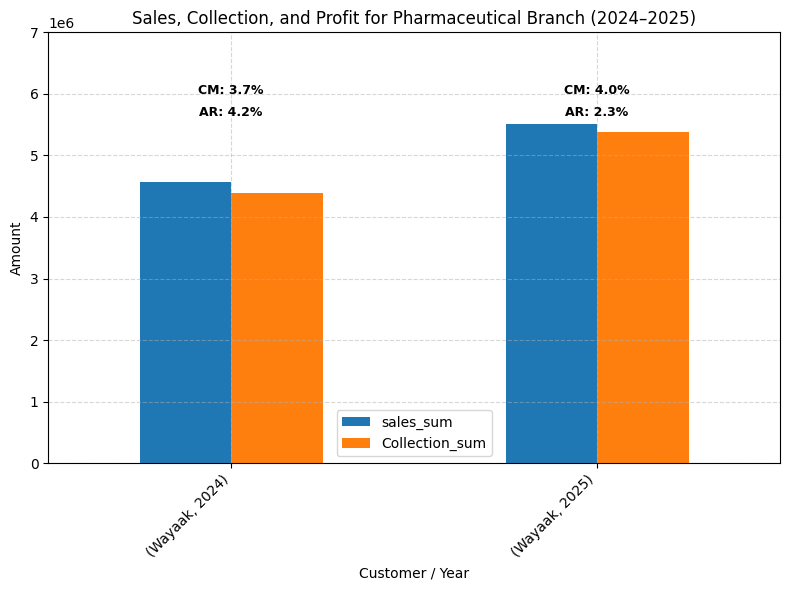

In [73]:
filtered_df = financial_group[
    (financial_group["Client"].isin(['Wayaak'])) &
    (financial_group["Year"].isin([2024, 2025]))
]
filtered_df['AR %'] = filtered_df['AR'] / filtered_df['sales_sum'] * 100

summary = (
    filtered_df
    .groupby(["Client","Year"]) [["sales_sum", "Collection_sum", 'Contribution Margin %','AR %']]
    .sum()
)

ax = summary[["sales_sum", "Collection_sum"]].plot(
    kind="bar",
    figsize=(8, 6)
)

plt.title("Sales, Collection, and Profit for Pharmaceutical Branch (2024–2025)")
plt.xlabel("Customer / Year")
plt.ylabel("Amount")
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.5)
plt.ylim(0,7000000)

# add contribution margin labels
for i, cm in enumerate(summary["Contribution Margin %"]):
    ax.text(
        i,                                      # x position
        ax.get_ylim()[1] * 0.88,                # y position (top)
        f"CM: {cm/100:.1%}",                        # label
        ha="center",
        va="top",
        fontsize=9,
        fontweight="bold"
    )

for i, ar in enumerate(summary["AR %"]):
    ax.text(
        i,                                      # x position
        ax.get_ylim()[1] * 0.83,                # y position (top)
        f"AR: {ar/100:.1%}",                        # label
        ha="center",
        va="top",
        fontsize=9,
        fontweight="bold"
    )
plt.tight_layout()
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/wayaak comparison.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()

In [74]:
summary

sales_sum Collection_sum  Contribution Margin %      AR %
Client Year                                                              
Wayaak 2024  4.572897e+06     4382553.87               3.678106  4.162427
       2025  5.506207e+06        5380648               3.984342  2.280312

### Insight 13: Pharmaceutical Branch Performance
#### The pharmaceutical branch, represented by Wayaak, showed strong growth (23%) from 2024 to 2025, with a reduction in accounts receivable and a slight increase in the contribution margin. It is recommended to focus on increasing sales in this branch by 8 million in 2026 while maintaining current AR and CM percentages.


## 🔑 Supplier Metrics


### Supplier Concentration Risk


In [75]:
original_df['Total Buying Price'] = original_df['Qty.'] * original_df['Buying Price']
Supplier = original_df.groupby('Supplier')['Total Buying Price'].sum().reset_index().sort_values(by='Total Buying Price', ascending=False).reset_index()
Supplier['Cumalative_Supplier_%'] = Supplier['Total Buying Price'].cumsum() / Supplier['Total Buying Price'].sum() * 100
Supplier['share_of_total_buying'] = Supplier['Total Buying Price'] / Supplier['Total Buying Price'].sum() * 100
Supplier.head(10)

,index,Supplier,Total Buying Price,Cumalative_Supplier_%,share_of_total_buying
0,80,Safa,4254067.03,34.172383,34.172383
1,57,Kareem,2610658.86,55.143476,20.971093
2,39,El Yosr,708964.45,60.838498,5.695022
3,9,Amazon,403125.75,64.076756,3.238258
4,46,FOX,369255.75,67.042941,2.966185
5,2,Abd El Hamid,342505.98,69.794248,2.751307
6,5,Ahmed Mongey,342421.5,72.544876,2.750629
7,26,El Hanafy,293793.5,74.904882,2.360006
8,7,Al Moaeez,287530.76,77.214581,2.309698
9,67,Motakhssoon,283454.5,79.491535,2.276954


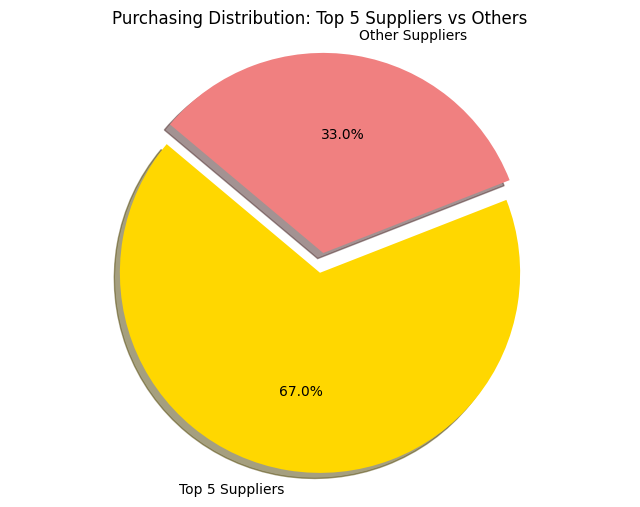

In [76]:
Top_5_suppliers_sales = Supplier['Total Buying Price'].head(5).sum()
other_suppliers_sales = Supplier['Total Buying Price'].iloc[5:].sum()

plt.figure(figsize=(8, 6))

plt.pie([Top_5_suppliers_sales, other_suppliers_sales], 
        labels=['Top 5 Suppliers', 'Other Suppliers'], 
        autopct='%1.1f%%', 
        colors=['gold', 'lightcoral'], 
        startangle=140, 
        explode=(0.1, 0), 
        shadow=True)
plt.title('Purchasing Distribution: Top 5 Suppliers vs Others')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/Purchasing_Distribution_Top_5_Suppliers_vs_Others.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()


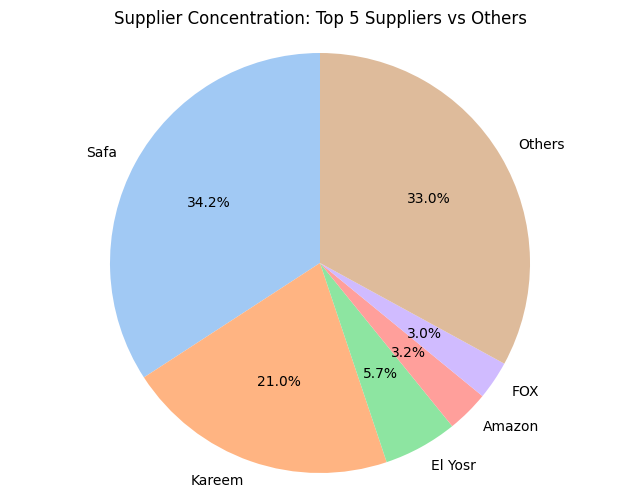

In [77]:
top_5 = Supplier[['Supplier', 'Total Buying Price']].head(5)
others = Supplier['Total Buying Price'].iloc[5:].sum()

labels = list(top_5['Supplier']) + ['Others']
sizes = list(top_5['Total Buying Price']) + [others]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Supplier Concentration: Top 5 Suppliers vs Others')
plt.axis('equal')  # Makes the pie chart a circle
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/Supplier_Concentration_Top_5_Suppliers_vs_Others.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()

In [78]:
Supplier_revenue_profit = original_df.groupby('Supplier').agg(Profit_sum=("Profit", "sum"),
                                                 Buying_sum=("Total Buying Price", "sum"),
                                                 revenue_sum = ("Total Selling Price","sum")).reset_index().sort_values(by='Buying_sum', ascending=False).reset_index()
Supplier_revenue_profit['contribution_margin'] = Supplier_revenue_profit['Profit_sum'] / Supplier_revenue_profit['revenue_sum'] * 100
Supplier_revenue_profit.head(10)

,index,Supplier,Profit_sum,Buying_sum,revenue_sum,contribution_margin
0,80,Safa,438662.32,4254067.03,4692729.35,9.347701
1,57,Kareem,317013.673329,2610658.86,2927672.533329,10.828181
2,39,El Yosr,75179.614,708964.45,784144.064,9.587475
3,9,Amazon,35662.0,403125.75,438787.75,8.127392
4,46,FOX,33103.02,369255.75,402358.77,8.22724
5,2,Abd El Hamid,47746.663922,342505.98,390252.643922,12.234809
6,5,Ahmed Mongey,59325.5,342421.5,401747.0,14.766881
7,26,El Hanafy,52732.95,293793.5,346526.45,15.217583
8,7,Al Moaeez,36996.33,287530.76,324527.09,11.400074
9,67,Motakhssoon,45548.4,283454.5,329002.9,13.844376


<Figure size 1200x600 with 0 Axes>

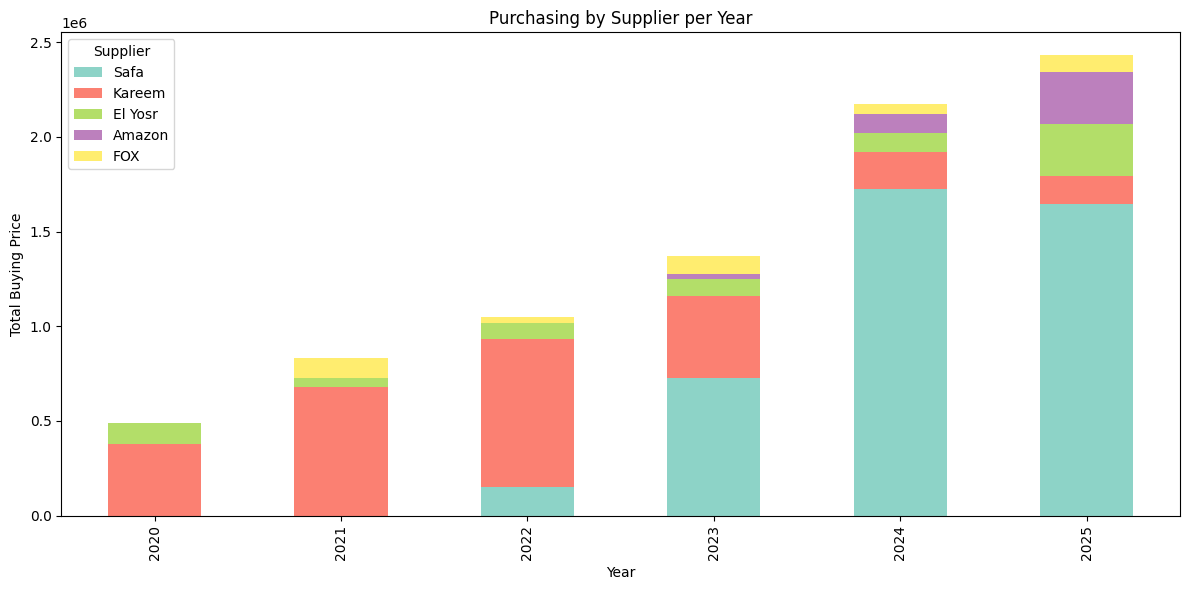

In [79]:
supplier_by_year = original_df.groupby(['Supplier','Year'])['Total Buying Price'].sum().reset_index().sort_values(by=['Year','Total Buying Price'], ascending=[True,False])
supplier_satcked = supplier_by_year.pivot(index='Year', columns='Supplier', values='Total Buying Price').loc[:, Supplier_revenue_profit['Supplier'].head(5)]  # Keep only top 10 suppliers

plt.figure(figsize=(12, 6))
supplier_satcked.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set3')
plt.ylabel('Total Buying Price')
plt.title('Purchasing by Supplier per Year')
# Move legend outside the plot
plt.legend(
    title='Supplier',
    bbox_to_anchor=(0, 1),
    loc='upper left'
)
plt.tight_layout()
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/Purchasing_by_Supplier_per_Year.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()

### Insight 14: Supplier Concentration Risk
### The firm currently relies on a limited supplier base, with more than 70% of its cost of goods sold sourced from only five suppliers. While this concentration supports strong supplier relationships and enhances the firm’s ability to negotiate favorable commercial terms, it also increases dependency risk. To mitigate potential supply chain disruptions and reduce operational risk, it is recommended that the firm strategically onboard one or two additional qualified suppliers without compromising cost efficiency or quality standards.

## 🔑 Financial Metrics

### Expense Ratio

In [80]:
total_profits_by_year

,Year,revenue,cogs,Profit,Profit Margin,Growth Rate
0,2020,1.584815e+06,1.435610e+06,149205.897500,9.414717,NaN
1,2021,1.592423e+06,1.447531e+06,144891.838431,9.098831,-2.891346
2,2022,1.866294e+06,1.588133e+06,278160.851800,14.904448,91.978275
3,2023,2.783624e+06,2.500628e+06,282996.425000,10.166474,1.738409
4,2024,7.863257e+06,7.370826e+06,492430.773130,6.262427,74.006005
5,2025,9.303422e+06,8.733532e+06,569889.729500,6.125593,15.729918


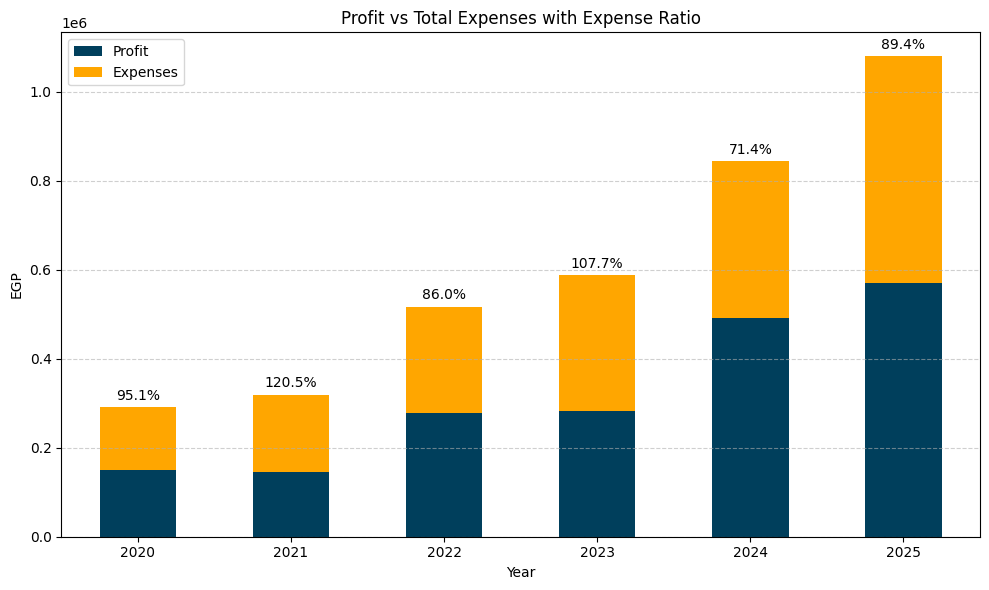

In [81]:

# Your base code
profit_expenses = total_profits_by_year[['Year','Profit']].merge(yearly_expenses, on='Year', how='left')
profit_expenses['Expense ratio %'] = profit_expenses['Cost'] / profit_expenses['Profit'] * 100
profit_expenses.rename(columns={'Cost':'Total Expenses'}, inplace=True)
profit_expenses.set_index('Year', inplace=True)

# Plot
ax = profit_expenses[['Profit', 'Total Expenses']].plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    color=['#003f5c', '#ffa600']
)

# Add labels for expense ratio
for i, (index, row) in enumerate(profit_expenses.iterrows()):
    ratio = row['Expense ratio %']
    total_height = row['Profit'] + row['Total Expenses']
    ax.text(i, total_height + 10000, f"{ratio:.1f}%", 
            ha='center', va='bottom', fontsize=10, color='black')

# Beautify plot
plt.title('Profit vs Total Expenses with Expense Ratio')
plt.ylabel('EGP')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(['Profit', 'Expenses'])
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/Profit_vs_Total_Expenses_with_Expense_Ratio.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()


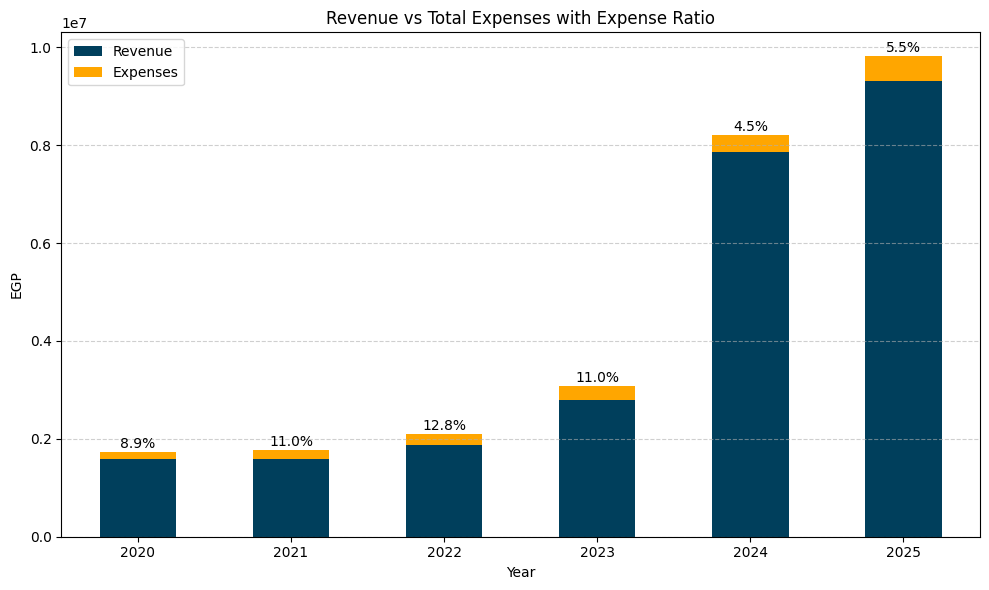

In [82]:
# Your base code
revenue_expenses = total_profits_by_year[['Year','revenue']].merge(yearly_expenses, on='Year', how='left')
revenue_expenses['Expense ratio %'] = revenue_expenses['Cost'] / revenue_expenses['revenue'] * 100
revenue_expenses.rename(columns={'Cost':'Total Expenses'}, inplace=True)
revenue_expenses.set_index('Year', inplace=True)

# Plot
ax = revenue_expenses[['revenue', 'Total Expenses']].plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    color=['#003f5c', '#ffa600']
)

# Add labels for expense ratio
for i, (index, row) in enumerate(revenue_expenses.iterrows()):
    ratio = row['Expense ratio %']
    total_height = row['revenue'] + row['Total Expenses']
    ax.text(i, total_height + 20000, f"{ratio:.1f}%", 
            ha='center', va='bottom', fontsize=10, color='black')

# Beautify plot
plt.title('Revenue vs Total Expenses with Expense Ratio')
plt.ylabel('EGP')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(['Revenue', 'Expenses'])
plt.show()


### Insight 15: Expense Management
#### Expenses have been a significant challenge, consuming a large portion of gross profit, particularly in 2024 (67%) and 2025 (82%). To improve financial health, it is recommended to reduce the expense ratio to 60% in 2026. One potential solution to this would be to introduce a new branch with the same number of employees, as previously recommended. Additionally, increasing sales and improving the profit margin while optimizing the cash flow cycle would help address these issues.


### Marketing Spend Ratio


In [83]:
expenses_df.head()

,Date,Type,Description,Destination,Client,Invoice no.,Name,Cost,Year,Month
1,2020-01-01 00:00:00,Marketing & Sales,Survey,Banha,"Alaa, Hassan, Ghareeb",NaN,Company,2565,2020,1
2,2020-01-01 00:00:00,Marketing & Sales,Training,Cairo,Room Square,NaN,Company,1880,2020,1
3,2020-01-01 00:00:00,Operation,Transfer,Shbeen El Knater,El Mahdy,1,Safwat,50,2020,1
4,2020-01-01 00:00:00,General,Boxes,Shbeen El Kom,El Khawaga,NaN,Company,600,2020,1
5,2020-01-01 00:00:00,General,Cards,NaN,NaN,NaN,Khaled,80,2020,1


In [84]:
Profit_margin = (original_df.groupby("Year").agg(Profit_sum=("Profit", "sum"),
                                                 Selling_sum=("Total Selling Price", "sum")
    )
    .reset_index()
)

# Then calculate profit margin
Profit_margin["Profit_Margin"] = Profit_margin["Profit_sum"] / Profit_margin["Selling_sum"]*100

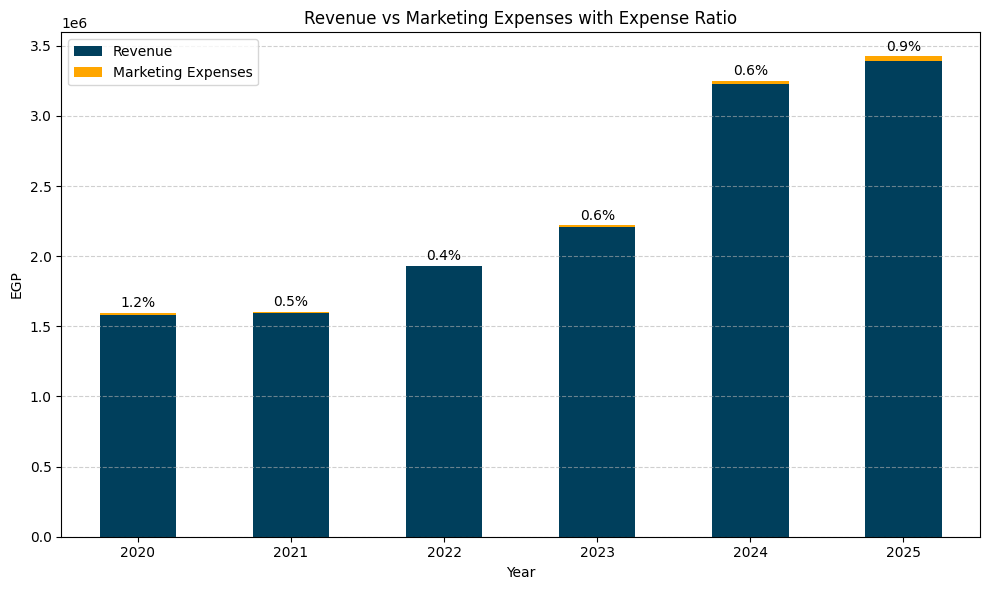

In [85]:
marketing = expenses_df[expenses_df['Type'] == 'Marketing & Sales']
marketing = marketing.groupby('Year')['Cost'].sum().reset_index()  
marketing_expenses = Profit_margin[['Year','Selling_sum','Profit_sum']].merge(marketing[['Year','Cost']], on='Year', how='left')
marketing_expenses['Marketing Expense ratio %'] = marketing_expenses['Cost'] / marketing_expenses['Selling_sum'] * 100
marketing_expenses.rename(columns={'Cost':'Marketing & Sales Expenses'}, inplace=True)
marketing_expenses.set_index('Year', inplace=True)
marketing_expenses

ax = marketing_expenses[['Selling_sum', 'Marketing & Sales Expenses']].plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    color=['#003f5c', '#ffa600']
)

# Add labels for expense ratio
for i, (index, row) in enumerate(marketing_expenses.iterrows()):
    ratio = row['Marketing Expense ratio %']
    total_height = row['Selling_sum'] + row['Marketing & Sales Expenses']
    ax.text(i, total_height + 20000, f"{ratio:.1f}%", 
            ha='center', va='bottom', fontsize=10, color='black')

# Beautify plot
plt.title('Revenue vs Marketing Expenses with Expense Ratio')
plt.ylabel('EGP')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(['Revenue', 'Marketing Expenses'])
plt.show()


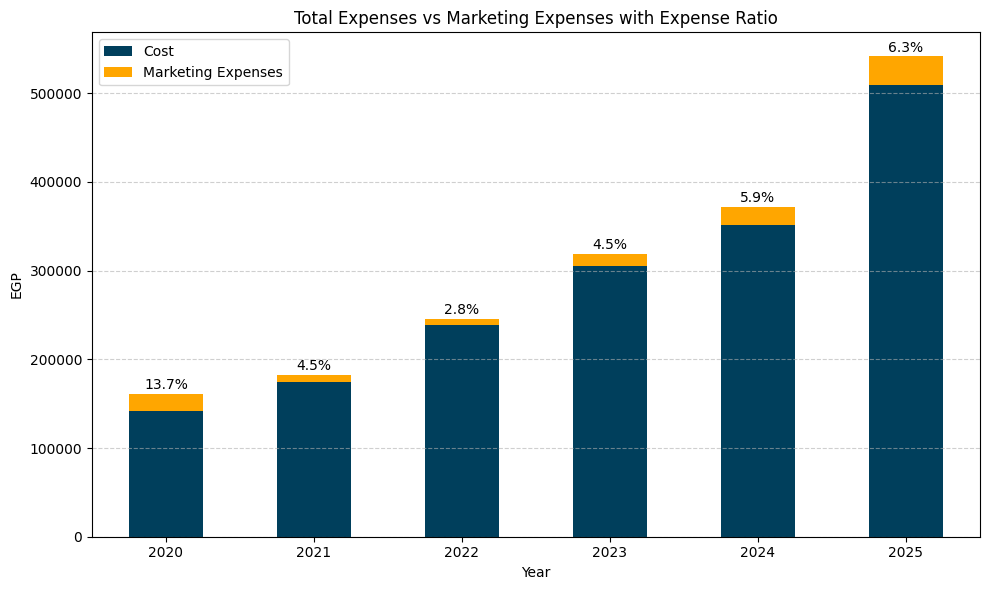

In [86]:




marketing_expenses = marketing_expenses.merge(yearly_expenses, left_index=True, right_on='Year', how='left').set_index('Year')
marketing_expenses['ratio from total expenses %'] = marketing_expenses['Marketing & Sales Expenses'] / marketing_expenses['Cost'] * 100
marketing_expenses

ax = marketing_expenses[['Cost', 'Marketing & Sales Expenses']].plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    color=['#003f5c', '#ffa600']
)

# Add labels for expense ratio
for i, (index, row) in enumerate(marketing_expenses.iterrows()):
    ratio = row['ratio from total expenses %']
    total_height = row['Cost'] + row['Marketing & Sales Expenses']
    ax.text(i, total_height + 2000, f"{ratio:.1f}%", 
            ha='center', va='bottom', fontsize=10, color='black')

# Beautify plot
plt.title('Total Expenses vs Marketing Expenses with Expense Ratio')
plt.ylabel('EGP')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(['Cost', 'Marketing Expenses'])
plt.show()

In [87]:
profit_expenses

,Profit,Total Expenses,Expense ratio %
Year,,,
2020,149205.897500,141835,95.059915
2021,144891.838431,174540,120.462272
2022,278160.851800,239157,85.977951
2023,282996.425000,304903,107.740937
2024,492430.773130,351370,71.354192
2025,569889.729500,509553.62,89.412669


/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_1462/1117005773.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  profit_expenses['expenses_growth'] = profit_expenses['Total Expenses'].pct_change() * 100


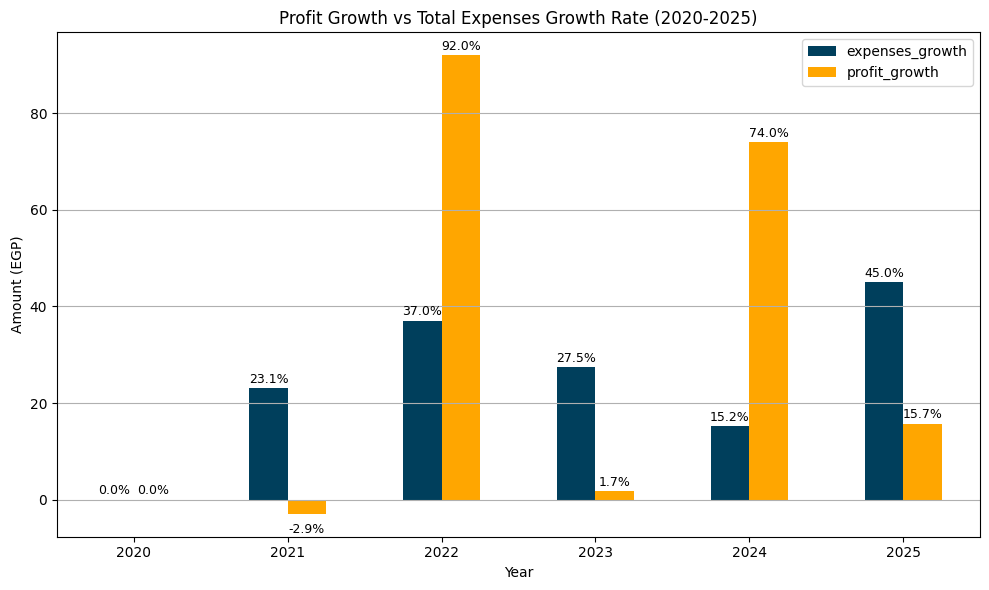

In [88]:
profit_expenses['profit_growth'] = profit_expenses['Profit'].pct_change() * 100
profit_expenses['expenses_growth'] = profit_expenses['Total Expenses'].pct_change() * 100

ax = profit_expenses[['expenses_growth', 'profit_growth']].plot(kind='bar', figsize=(10,6), color = ['#003f5c', '#ffa600', 'green', 'red'])

# Add data labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if not pd.isna(height):  # Avoid labeling NaN values
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.5 if height >= 0 else height - 2,
                f"{height:.1f}%",
                ha='center',
                va='bottom' if height >= 0 else 'top',
                fontsize=9,
                color='black'
            )
            
plt.title('Profit Growth vs Total Expenses Growth Rate (2020-2025)')
plt.ylabel('Amount (EGP)')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/Profit_Growth_vs_Total_Expenses_Growth_Rate.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()


In [89]:
marketing_expenses

,Selling_sum,Profit_sum,Marketing & Sales Expenses,Marketing Expense ratio %,Cost,ratio from total expenses %
Year,,,,,,
2020,1577652.9625,153163.8875,19442,1.232337,141835,13.707477
2021,1593007.228431,142354.188431,7820,0.490895,174540,4.480348
2022,1926761.1328,272364.6228,6772,0.351471,239157,2.831613
2023,2206541.3,258070.41,13767,0.623918,304903,4.515206
2024,3230487.95,319351.23,20850,0.645413,351370,5.933916
2025,3392914.76,329935.86,32110,0.946384,509553.62,6.301594


In [90]:
marketing_ratio = marketing_expenses['Marketing & Sales Expenses'].sum() / marketing_expenses['Selling_sum'].sum()
marketing_profit_ratio = marketing_expenses['Marketing & Sales Expenses'].sum() / marketing_expenses['Profit_sum'].sum()

print(f"Overall Marketing to Sales Ratio: {marketing_ratio:.2%}")
print(f"Overall Marketing to Profit Ratio: {marketing_profit_ratio:.2%}")

Overall Marketing to Sales Ratio: 0.72%
Overall Marketing to Profit Ratio: 6.83%


In [91]:
operation = expenses_df[expenses_df['Type'] == 'Operation']
operation = operation.groupby('Year')['Cost'].sum().reset_index()
operation_expenses = Profit_margin[['Year','Selling_sum','Profit_sum']].merge(operation[['Year','Cost']], on='Year', how='left')
operation_expenses['operation Expense ratio %'] = operation_expenses['Cost'] / operation_expenses['Selling_sum'] * 100  
operation_expenses.rename(columns={'Cost':'Operation Expenses'}, inplace=True)
operation_expenses.set_index('Year', inplace=True)
operation_expenses

,Selling_sum,Profit_sum,Operation Expenses,operation Expense ratio %
Year,,,,
2020,1577652.9625,153163.8875,15925,1.009411
2021,1593007.228431,142354.188431,23285,1.461701
2022,1926761.1328,272364.6228,22018,1.142747
2023,2206541.3,258070.41,30269,1.371785
2024,3230487.95,319351.23,53910,1.668788
2025,3392914.76,329935.86,79275,2.336487


In [92]:
operation_ratio = operation_expenses['Operation Expenses'].sum() / operation_expenses['Selling_sum'].sum()
operation_profit_ratio = operation_expenses['Operation Expenses'].sum() / operation_expenses['Profit_sum'].sum()

print(f"Overall Operation to Sales Ratio: {operation_ratio:.2%}")
print(f"Overall Operation to Profit Ratio: {operation_profit_ratio:.2%}")

Overall Operation to Sales Ratio: 1.61%
Overall Operation to Profit Ratio: 15.23%


In [93]:
general = expenses_df[expenses_df['Type'] == 'General']
general = general.groupby('Year')['Cost'].sum().reset_index()
general_expenses = Profit_margin[['Year','Selling_sum','Profit_sum']].merge(general[['Year','Cost']], on='Year', how='left')
general_expenses['operation Expense ratio %'] = general_expenses['Cost'] / general_expenses['Selling_sum'] * 100  
general_expenses.rename(columns={'Cost':'General Expenses'}, inplace=True)
general_expenses.set_index('Year', inplace=True)
general_expenses

,Selling_sum,Profit_sum,General Expenses,operation Expense ratio %
Year,,,,
2020,1577652.9625,153163.8875,106468,6.748506
2021,1593007.228431,142354.188431,143435,9.004039
2022,1926761.1328,272364.6228,210367,10.918167
2023,2206541.3,258070.41,260867,11.822439
2024,3230487.95,319351.23,276610,8.562484
2025,3392914.76,329935.86,398168.62,11.735297


In [94]:
general_ratio = general_expenses['General Expenses'].sum() / general_expenses['Selling_sum'].sum()
general_profit_ratio = general_expenses['General Expenses'].sum() / general_expenses['Profit_sum'].sum()

print(f"Overall General Expenses to Sales Ratio: {general_ratio:.2%}")
print(f"Overall General Expenses to consumables Profit Ratio: {general_profit_ratio:.2%}")

Overall General Expenses to Sales Ratio: 10.02%
Overall General Expenses to consumables Profit Ratio: 94.62%


### Insight 16: Profit Growth vs. Expense Growth
#### In 2025, while profit increased by 15%, the substantial rise in expenses (43%) effectively offset this growth. The primary factors contributing to this were a significant increase in salary costs (an additional 80,000 EGP) and a sharp rise in fuel prices, which doubled operational expenses. Addressing these cost drivers is essential for future profitability.

### Operational Efficiency Ratio


# 🔎 Phase 4 – Diagnostic Analytics (Why it happened?)

## 🔑 KPIs / Metrics with Explanations + Charts

### 1. Profitability by Customer Segment

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_1462/3247820784.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_customers_yearly_profit = yearly_customer_profit.groupby('Year').apply(lambda x : x.nlargest(5, 'Profit')).reset_index(drop=True)


<Figure size 1200x600 with 0 Axes>

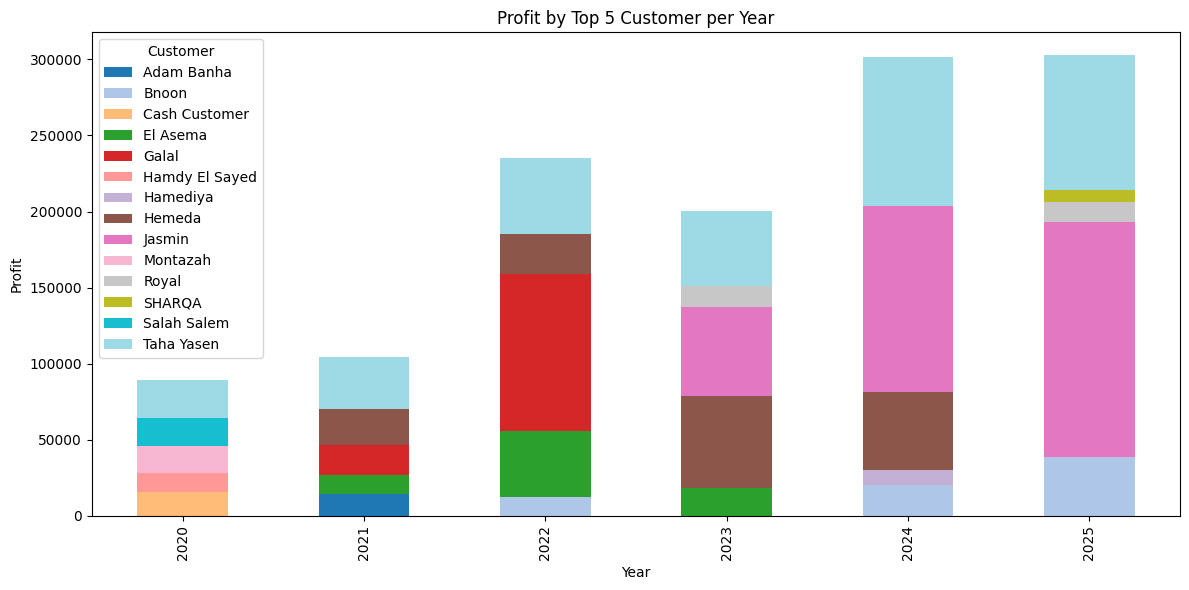

In [95]:
yearly_customer_profit = original_df.groupby(['Year','Client'])['Profit'].sum().reset_index().sort_values(by=['Year','Profit'], ascending=[True,False])

yearly_customer_profit['Year'].astype(int)
yearly_customer_profit['Profit'] = pd.to_numeric(yearly_customer_profit['Profit'], errors='coerce')
top_5_customers_yearly_profit = yearly_customer_profit.groupby('Year').apply(lambda x : x.nlargest(5, 'Profit')).reset_index(drop=True)
top_5_customers_yearly_profit.head(10)

Top_5_yearly_customer_profit_pivot = top_5_customers_yearly_profit.pivot(index='Year', columns='Client', values='Profit')
# pivot_percent_customer = yearly_customer_pivot.div(yearly_customer_pivot.sum(axis=1), axis=0) * 100


plt.figure(figsize=(12, 6))
Top_5_yearly_customer_profit_pivot.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.ylabel('Profit')
plt.title('Profit by Top 5 Customer per Year')
# Move legend outside the plot
plt.legend(
    title='Customer',
    bbox_to_anchor=(0, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()


/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_1462/485582355.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_customers_yearly_profit = yearly_customer_profit.groupby('Year').apply(lambda x : x.nlargest(5, 'Profit')).reset_index(drop=True)


<Figure size 1200x600 with 0 Axes>

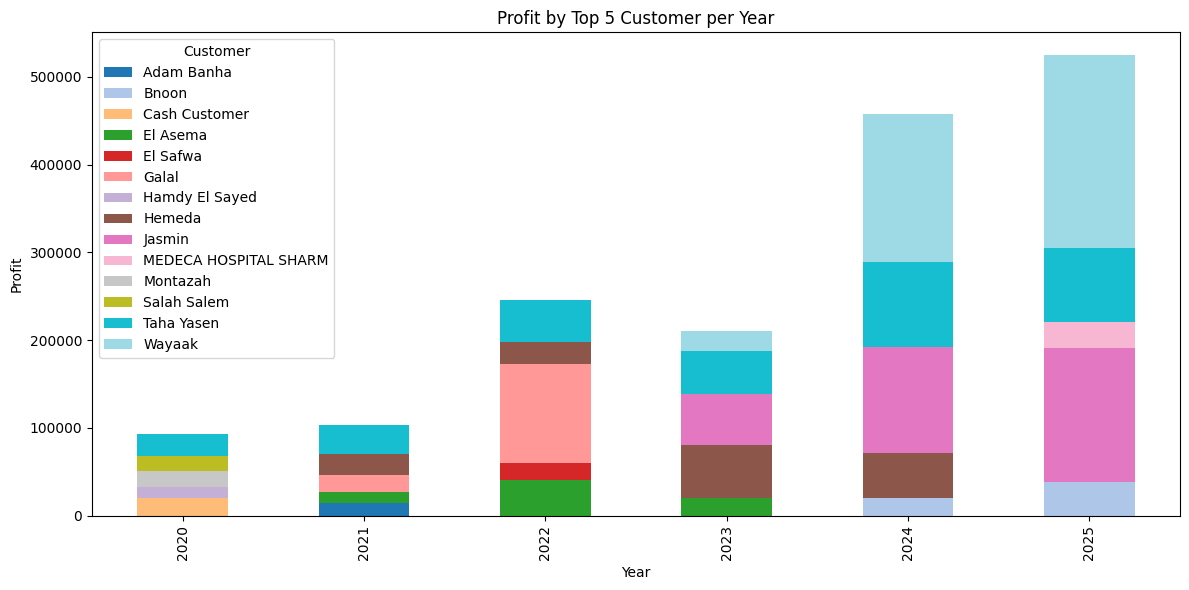

In [96]:
yearly_customer_profit =Financial_df.groupby(['Year','Client']).agg(revenue = ('Creditor', 'sum'),
                                                                    cogs = ('Cogs', 'sum')).reset_index()
yearly_customer_profit['Profit'] = yearly_customer_profit['revenue'] - yearly_customer_profit['cogs']
yearly_customer_profit = yearly_customer_profit.sort_values(by=['Year','Profit'], ascending=[True,False])

yearly_customer_profit['Year'].astype(int)
yearly_customer_profit['Profit'] = pd.to_numeric(yearly_customer_profit['Profit'], errors='coerce')
top_5_customers_yearly_profit = yearly_customer_profit.groupby('Year').apply(lambda x : x.nlargest(5, 'Profit')).reset_index(drop=True)
top_5_customers_yearly_profit.head(10)

Top_5_yearly_customer_profit_pivot = top_5_customers_yearly_profit.pivot(index='Year', columns='Client', values='Profit')
# pivot_percent_customer = yearly_customer_pivot.div(yearly_customer_pivot.sum(axis=1), axis=0) * 100


plt.figure(figsize=(12, 6))
Top_5_yearly_customer_profit_pivot.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.ylabel('Profit')
plt.title('Profit by Top 5 Customer per Year')
# Move legend outside the plot
plt.legend(
    title='Customer',
    bbox_to_anchor=(0, 1),
    loc='upper left'
)
plt.tight_layout()
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/Profit_by_Top_5_Customer_per_Year.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()

In [97]:
Top_5_yearly_customer_profit_pivot

Client,Adam Banha,Bnoon,Cash Customer,El Asema,El Safwa,Galal,Hamdy El Sayed,Hemeda,Jasmin,MEDECA HOSPITAL SHARM,Montazah,Salah Salem,Taha Yasen,Wayaak
Year,,,,,,,,,,,,,,
2020,NaN,NaN,20175.0,NaN,NaN,NaN,12723.2475,NaN,NaN,NaN,17724.47,17315.88,25266.900,NaN
2021,13873.55,NaN,NaN,12742.948431,NaN,19723.4200,NaN,24061.89,NaN,NaN,NaN,NaN,33338.220,NaN
2022,NaN,NaN,NaN,40566.900000,19492.39,112700.5818,NaN,25632.33,NaN,NaN,NaN,NaN,46753.900,NaN
2023,NaN,NaN,NaN,20431.000000,NaN,NaN,NaN,60237.10,58243.00,NaN,NaN,NaN,48461.800,23172.23500
2024,NaN,19982.5,NaN,NaN,NaN,NaN,NaN,50809.77,121825.35,NaN,NaN,NaN,96920.710,168196.01813
2025,NaN,38307.0,NaN,NaN,NaN,NaN,NaN,NaN,152580.50,30266.3,NaN,NaN,83974.267,219386.12250


### Insight 17: Customer Profitability and Retention
#### Three key customers—Wayaak, Taha Yaseen, and Jasmin—have shown strong profitability, with Wayaak experiencing 30% growth, Jasmin at 25%, and Taha Yaseen declining by 13% due to the cessation of its kidney department. Despite this, the collection cycle for these customers remains strong, indicating good retention. It is recommended to increase the marketing budget for these high-performing customers to sustain their growth.

#### 1. Waterfall Chart - Showing how Revenue flows to Net Profit

In [98]:
expenses_df

,Date,Type,Description,Destination,Client,Invoice no.,Name,Cost,Year,Month
1,2020-01-01 00:00:00,Marketing & Sales,Survey,Banha,"Alaa, Hassan, Ghareeb",NaN,Company,2565,2020,1
2,2020-01-01 00:00:00,Marketing & Sales,Training,Cairo,Room Square,NaN,Company,1880,2020,1
3,2020-01-01 00:00:00,Operation,Transfer,Shbeen El Knater,El Mahdy,1,Safwat,50,2020,1
4,2020-01-01 00:00:00,General,Boxes,Shbeen El Kom,El Khawaga,NaN,Company,600,2020,1
5,2020-01-01 00:00:00,General,Cards,NaN,NaN,NaN,Khaled,80,2020,1
...,...,...,...,...,...,...,...,...,...,...
2355,2025-12-15 00:00:00,General,food,NaN,NaN,NaN,Safwat,40,2025,12
2356,2025-12-18 00:00:00,Marketing & Sales,Jasmin,NaN,NaN,NaN,Khaled,1800,2025,12
2357,2025-12-18 00:00:00,Operation,Transfer,Mnya El Kamh,NaN,NaN,Hasan,250,2025,12
2358,2025-12-18 00:00:00,Operation,Shipping,NaN,NaN,NaN,Hasan,100,2025,12


In [99]:
salary = expenses_df[expenses_df['Description'] == 'Salary']['Cost'].sum()
operation = expenses_df[expenses_df['Type'] == 'Operation']['Cost'].sum()
cogs = Financial_df['Cogs'].sum()
marketing = expenses_df[expenses_df['Type'] == 'Marketing & Sales']['Cost'].sum()
other_expenses = expenses_df[(~expenses_df['Type'].isin(['Operation', 'Marketing & Sales'])) & (expenses_df['Description'] != 'Salary')]['Cost'].sum()
revenue = Financial_df['Creditor'].sum()
profit = revenue - cogs - salary - operation - marketing - other_expenses


In [100]:
# Create Waterfall data
data = [
    {'label': 'Revenue', 'value': revenue, 'type': 'absolute'},
    {'label': 'COGS', 'value': -cogs, 'type': 'relative'},
    {'label': 'Salaries', 'value': -salary, 'type': 'relative'},
    {'label': 'Marketing', 'value': -marketing, 'type': 'relative'},
    {'label': 'Operations', 'value': -operation, 'type': 'relative'},
    {'label': 'Other Expenses', 'value': -other_expenses, 'type': 'relative'},
    {'label': 'Net Profit', 'value': profit, 'type': 'total'}
]

waterfall_df = pd.DataFrame(data)
waterfall_df


,label,value,type
0,Revenue,2.499384e+07,absolute
1,COGS,-2.307626e+07,relative
2,Salaries,-1.135200e+06,relative
3,Marketing,-1.007610e+05,relative
4,Operations,-2.246820e+05,relative
5,Other Expenses,-2.617156e+05,relative
6,Net Profit,1.952169e+05,total


In [101]:
# Calculate percentage of revenue
waterfall_df['percent_of_revenue'] = (waterfall_df['value'] / revenue) * 100

# Format for display
waterfall_df['label_with_percent'] = waterfall_df['label'] + ' (' + waterfall_df['percent_of_revenue'].round(1).astype(str) + '%)'


In [102]:
# ! pip install plotly
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    name = "Financial Breakdown",
    orientation = "v",
    measure = waterfall_df['type'],       # 'absolute', 'relative', 'total'
    x = waterfall_df['label'],
    textposition = "outside",
    y = waterfall_df['value'],
    text = waterfall_df['percent_of_revenue'].round(1).astype(str) + '%',  # Show percentages as labels
    connector = {"line":{"color":"gray"}},
    increasing = {"marker":{"color":"green"}},
    decreasing = {"marker":{"color":"red"}},
    totals = {"marker":{"color":"blue"}}
))

fig.update_layout(
    title = "Profit Waterfall Chart with % of Revenue",
    waterfallgap = 0.5,
    yaxis_title = "Amount",
    xaxis_title = "Financial Steps",
    autosize=False,              # Set to False to manually control size
    width=1120,                  # Width in pixels (e.g., 1200px)
    height=520,                  # Height in pixels (e.g., 600px)
    showlegend=False
)

fig.show()


In [103]:
salary = expenses_df[expenses_df['Description'] == 'Salary']['Cost'].sum()
operation = expenses_df[expenses_df['Type'] == 'Operation']['Cost'].sum()
marketing = expenses_df[expenses_df['Type'] == 'Marketing & Sales']['Cost'].sum()
other_expenses = expenses_df[(~expenses_df['Type'].isin(['Operation', 'Marketing & Sales'])) & (expenses_df['Description'] != 'Salary')]['Cost'].sum()
profit = revenue - cogs
net_profit = revenue - cogs - salary - operation - marketing - other_expenses

In [104]:
# Create Waterfall data
data = [
    {'label': 'Profit', 'value': profit, 'type': 'absolute'},
    {'label': 'Salaries', 'value': -salary, 'type': 'relative'},
    {'label': 'Marketing', 'value': -marketing, 'type': 'relative'},
    {'label': 'Operations', 'value': -operation, 'type': 'relative'},
    {'label': 'Other Expenses', 'value': -other_expenses, 'type': 'relative'},
    {'label': 'Net Profit', 'value': net_profit, 'type': 'total'}
]

waterfall2_df = pd.DataFrame(data)
waterfall2_df

,label,value,type
0,Profit,1.917576e+06,absolute
1,Salaries,-1.135200e+06,relative
2,Marketing,-1.007610e+05,relative
3,Operations,-2.246820e+05,relative
4,Other Expenses,-2.617156e+05,relative
5,Net Profit,1.952169e+05,total


In [105]:
# Calculate percentage of revenue
waterfall2_df['percent_of_revenue'] = (waterfall2_df['value'] / profit) * 100

# Format for display
waterfall2_df['label_with_percent'] = waterfall2_df['label'] + ' (' + waterfall2_df['percent_of_revenue'].round(1).astype(str) + '%)'

In [106]:
fig = go.Figure(go.Waterfall(
    name = "Financial Breakdown",
    orientation = "v",
    measure = waterfall2_df['type'],       # 'absolute', 'relative', 'total'
    x = waterfall2_df['label'],
    textposition = "outside",
    y = waterfall2_df['value'],
    text = waterfall2_df['percent_of_revenue'].round(1).astype(str) + '%',  # Show percentages as labels
    connector = {"line":{"color":"gray"}},
    increasing = {"marker":{"color":"green"}},
    decreasing = {"marker":{"color":"red"}},
    totals = {"marker":{"color":"blue"}}
))

fig.update_layout(
    title = "Profit Waterfall Chart with % of Revenue",
    waterfallgap = 0.5,
    yaxis_title = "Amount",
    xaxis_title = "Financial Steps",
    autosize=False,              # Set to False to manually control size
    width=1120,                  # Width in pixels (e.g., 1200px)
    height=520,                  # Height in pixels (e.g., 600px)
    showlegend=False
)

fig.show()
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/Profit_Waterfall_Chart_with_Percent_of_Revenue.jpg', bbox_inches = 'tight', dpi = 200)


<Figure size 640x480 with 0 Axes>

### Insight 18: Net Profit Margin
#### The firm has demonstrated good performance in sales and gross profit but is struggling with a low net profit margin, which currently accounts for 60% of gross profit. To improve this, it is recommended to increase sales and gross profit while reducing salary-related expenses, aiming for a net profit ratio of 50% in 2026. Additionally, reducing operational expenses slightly would help optimize margins.


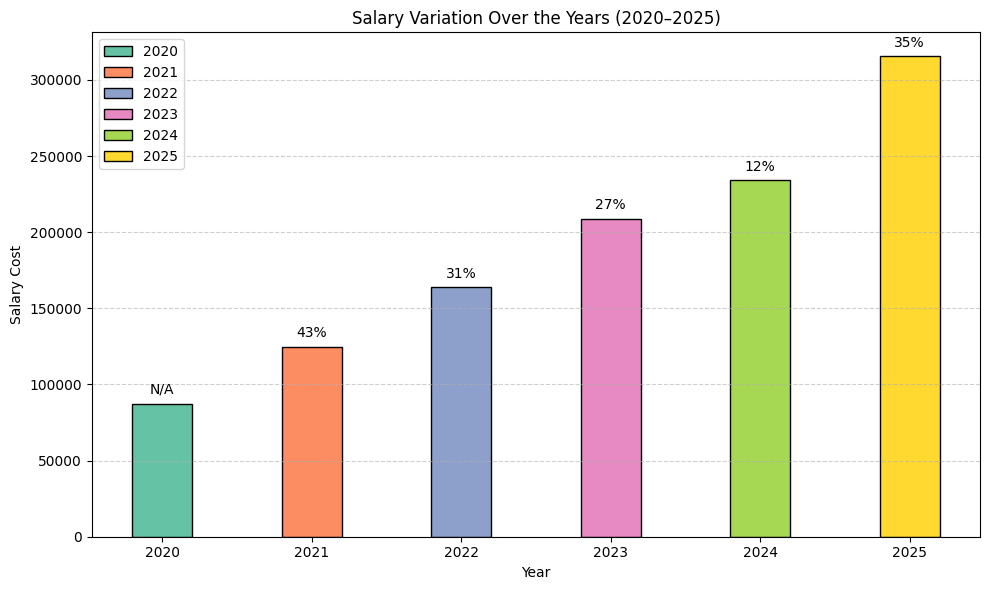

In [107]:

salary_data = (
    expenses_df[expenses_df['Type'] == 'General']
    .groupby(['Description', 'Year'])['Cost']
    .sum()
    .reset_index()
)

Description = ['Salary']
summary = salary_data[
    (salary_data['Description'].isin(Description)) &
    (salary_data['Year'].isin([2020, 2021, 2022, 2023, 2024, 2025]))
]

# Pivot for bar chart: Each year will be a column
pivot_df = summary.pivot(index='Description', columns='Year', values='Cost')

# Bar positions for each year
x = pivot_df.columns  # Years (2020, 2021, ..., 2025)
y = pivot_df.loc['Salary'].values  # Corresponding salary costs for each year

# Calculate growth percentages from one year to the next
growth_percentages = [0]  # No growth percentage for the first year (2020)
for i in range(1, len(y)):
    growth = ((y[i] - y[i - 1]) / y[i - 1]) * 100
    growth_percentages.append(growth)

# Get colors from Set2 colormap
colors = plt.get_cmap("Set2").colors  # List of colors from the Set2 colormap

# Plotting the bar chart
plt.figure(figsize=(10, 6))

# Loop through years and plot each bar with a different color
for i, year in enumerate(x):
    # Plot each bar
    plt.bar(year, y[i], color=colors[i % len(colors)], width=0.4, edgecolor='black', label=str(year))

    # Add the growth percentage as a label on top of each bar (except for the first year)
    growth_label = f"{growth_percentages[i]:.0f}%" if i > 0 else "N/A"
    plt.text(year, y[i] + 0.02 * max(y), growth_label, ha='center', color='black', fontsize=10)

# Labels and title
plt.xlabel('Year')  # X-axis label
plt.ylabel('Salary Cost')  # Y-axis label
plt.title('Salary Variation Over the Years (2020–2025)')  # Plot title
plt.xticks(x)  # Set x-ticks as the years
plt.legend()  # Add legend
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Grid lines for the y-axis

# Display the plot
plt.tight_layout()
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/Salary_Variation_Over_the_Years.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()

    


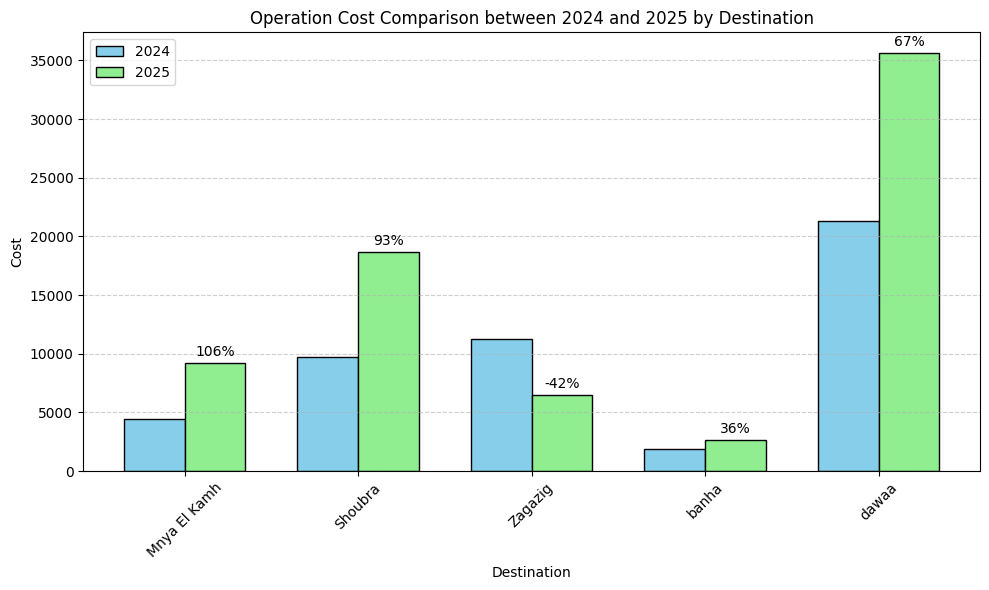

In [108]:

# Grouping the operation data and filtering for required destinations and years
operation_data = (
    expenses_df[expenses_df['Type'] == 'Operation']
    .groupby(['Destination', 'Year'])['Cost']
    .sum()
    .reset_index()
)

Destination = ['banha', 'Mnya El Kamh', 'Zagazig', 'Shoubra', 'dawaa']
summary = operation_data[
    (operation_data['Destination'].isin(Destination)) &
    (operation_data['Year'].isin([2024, 2025]))
]

# Pivot the data: each year as a column
pivot_df = summary.pivot(index='Destination', columns='Year', values='Cost')

# Calculate the growth percentage between 2024 and 2025
pivot_df['Growth Percentage'] = (
    (pivot_df[2025] - pivot_df[2024]) / pivot_df[2024] * 100
)

# Plotting the bar chart
plt.figure(figsize=(10, 6))

# Bar chart showing the cost difference between 2024 and 2025
bar_width = 0.35  # Width of the bars
x = range(len(pivot_df))  # X positions for the destinations

# Plot bars for 2024 and 2025 side by side
plt.bar(x, pivot_df[2024], width=bar_width, label='2024', color='skyblue', edgecolor='black')
plt.bar([p + bar_width for p in x], pivot_df[2025], width=bar_width, label='2025', color='lightgreen', edgecolor='black')

# Adding growth percentage labels on top of the bars
for i, destination in enumerate(pivot_df.index):
    growth_percentage = pivot_df['Growth Percentage'].iloc[i]
    plt.text(x[i] + bar_width , pivot_df[2025].iloc[i] + 0.01 * max(pivot_df[2025]),
             f"{growth_percentage:.0f}%", ha='center', va='bottom', fontsize=10, color='black')

# Labels and title
plt.xlabel('Destination')
plt.ylabel('Cost')
plt.title('Operation Cost Comparison between 2024 and 2025 by Destination')
plt.xticks([p + bar_width / 2 for p in x], pivot_df.index, rotation=45)
plt.legend()

# Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adjust the layout to fit everything
plt.tight_layout()
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/Operation_Cost_Variation_Over_the_Years.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()



### Insight 19: Operational Expense Growth
#### Operational expenses have seen significant increases, particularly in Shoubra, Mnya El Kamh, and Dawa, with respective growth rates of 106%, 93%, and 67%. Salary expenses have also increased by 35% from 2024. These increases have eaten into profits, with net profit lower than in 2024.This Explains why NP decreased however, sales and GP increased. It is recommended to implement a cost reduction strategy for operational expenses and freeze salary increases until the first quarter of 2026 to assess the impact.


#### 2. Stacked Bar Chart - Profitability by Customer Segment Over Years


In [109]:
Customer_data

,Client,Sales_sum,Profit_sum,Transactions_count,Products_No,Category_No,years_in_business,Units_sold,Contribution Margin %,Cumalative_Sales_%
63,Taha Yasen,3197157.06,344915.64,351,238,97,6,139297,10.788198,22.955936
38,Jasmin,2939293.25,335280.1,112,118,53,3,78331,11.406827,44.060382
36,Hemeda,1631108.9,170082.97,238,238,99,6,92641.64,10.427444,55.771921
9,Bnoon,1196362,90045.5,54,23,15,6,38906,7.52661,64.361931
33,Galal,751274.2228,128073.3928,82,335,104,3,39588,17.047489,69.756161
...,...,...,...,...,...,...,...,...,...,...
43,Madina,900,225,1,1,1,1,3,25.0,99.990497
18,Dr. Salah,512.5,42.5,2,5,4,1,32,8.292683,99.994177
16,Dr. Islam Sameer,383,36.0,1,3,3,1,4,9.399478,99.996927
37,Ibn Sina,321,30,1,1,1,1,3,9.345794,99.999232


In [110]:
yearly_customer = original_df.groupby(['Year','Client'])['Total Selling Price'].sum().reset_index().sort_values(by=['Year','Total Selling Price'], ascending=[True,False])

yearly_customer['Year'].astype(int)
yearly_customer['Total Selling Price'] = pd.to_numeric(yearly_customer['Total Selling Price'], errors='coerce')
top_5_customers_yearly = yearly_customer.groupby('Year').apply(lambda x : x.nlargest(5, 'Total Selling Price')).reset_index(drop=True)
top_5_customers_yearly.head(10)

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_1462/3747789746.py:5: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Year,Client,Total Selling Price
0,2020,Taha Yasen,360694.400000
1,2020,Montazah,159749.900000
2,2020,Salah Salem,159582.900000
3,2020,Hamdy El Sayed,127077.782500
4,2020,El Safwa,122223.250000
5,2021,Taha Yasen,450513.200000
6,2021,Galal,256085.850000
7,2021,Hemeda,249458.450000
8,2021,El Asema,157077.078431
9,2021,El Safwa,118832.450000


<Figure size 1200x600 with 0 Axes>

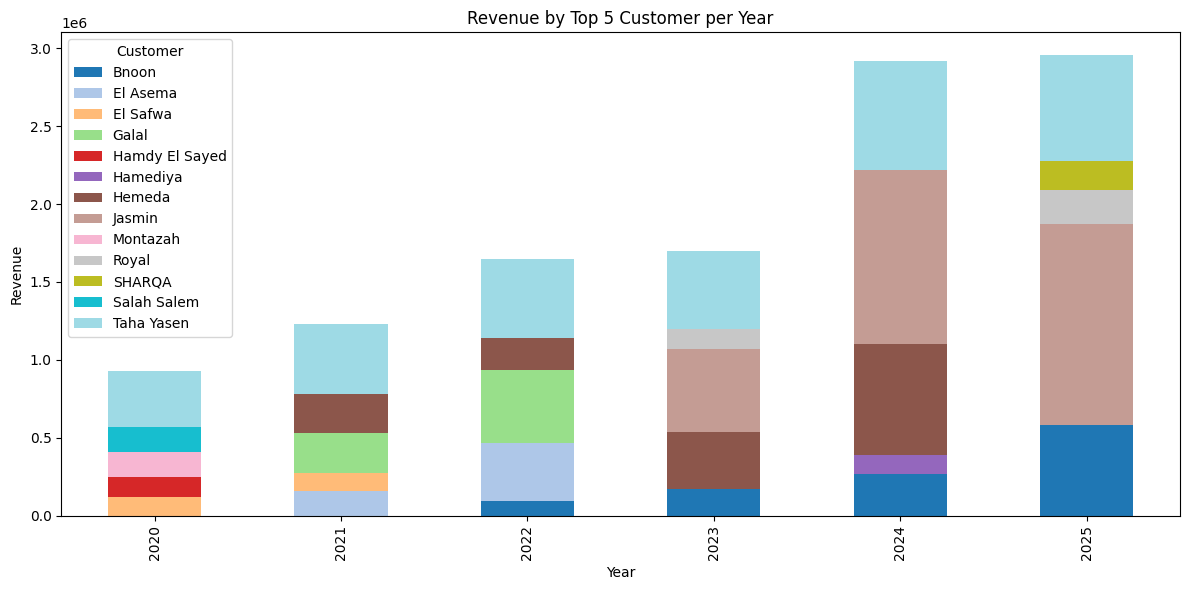

In [111]:

Top_5_yearly_customer_pivot = top_5_customers_yearly.pivot(index='Year', columns='Client', values='Total Selling Price')
# pivot_percent_customer = yearly_customer_pivot.div(yearly_customer_pivot.sum(axis=1), axis=0) * 100


plt.figure(figsize=(12, 6))
Top_5_yearly_customer_pivot.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.ylabel('Revenue')
plt.title('Revenue by Top 5 Customer per Year')
# Move legend outside the plot
plt.legend(
    title='Customer',
    bbox_to_anchor=(0, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

In [112]:

yearly_customer_pivot = yearly_customer.pivot(index='Year', columns='Client', values='Total Selling Price')
yearly_customer_pivot


Client,ADAM,Abd El Hamid,Adam Banha,Al Forkan,Al Moaezz / El Kasr El Einy,Al Srour,Amina,Arkan Center,Asmaa S Salem,Bnoon,...,Sharqia,Shourok,Tabarak,Taha Yasen,Tarooty,Tulip,Wady El Tip,Zagazig University,Zina El Hayat,Zohour El Hayat
Year,,,,,,,,,,,,,,,,,,,,,
2020,NaN,69339.0,50337.00,NaN,7440.0,2310.0,NaN,NaN,4055.0,4247.0,...,72932.5,NaN,NaN,360694.40,14813.0,NaN,NaN,12752.5,18035.0,NaN
2021,NaN,16426.2,95585.25,2422.5,NaN,NaN,NaN,NaN,NaN,80685.0,...,3195.0,NaN,3115.0,450513.20,13930.0,16940.0,NaN,NaN,NaN,NaN
2022,NaN,3374.5,64742.75,NaN,NaN,NaN,NaN,NaN,NaN,94810.0,...,NaN,NaN,NaN,506875.80,30635.0,5921.0,NaN,NaN,NaN,NaN
2023,NaN,NaN,NaN,NaN,NaN,NaN,42680.5,NaN,NaN,168780.0,...,NaN,3460.0,NaN,501027.50,NaN,NaN,38925.0,NaN,NaN,74597.75
2024,NaN,NaN,NaN,NaN,NaN,NaN,117873.0,NaN,NaN,267910.0,...,NaN,NaN,NaN,698892.20,NaN,NaN,27000.0,NaN,NaN,42355.00
2025,55666.0,NaN,NaN,NaN,NaN,NaN,180897.5,29737.5,NaN,579930.0,...,16331.0,NaN,NaN,679153.96,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
pivot_percent_customer = yearly_customer_pivot.div(yearly_customer_pivot.sum(axis=1), axis=0) * 100
pivot_percent_customer

Client,ADAM,Abd El Hamid,Adam Banha,Al Forkan,Al Moaezz / El Kasr El Einy,Al Srour,Amina,Arkan Center,Asmaa S Salem,Bnoon,...,Sharqia,Shourok,Tabarak,Taha Yasen,Tarooty,Tulip,Wady El Tip,Zagazig University,Zina El Hayat,Zohour El Hayat
Year,,,,,,,,,,,,,,,,,,,,,
2020,NaN,4.395073,3.190626,NaN,0.471587,0.14642,NaN,NaN,0.257027,0.269197,...,4.622848,NaN,NaN,22.862721,0.938926,NaN,NaN,0.808321,1.143154,NaN
2021,NaN,1.031144,6.000302,0.152071,NaN,NaN,NaN,NaN,NaN,5.064949,...,0.200564,NaN,0.195542,28.280675,0.874447,1.063398,NaN,NaN,NaN,NaN
2022,NaN,0.175138,3.360186,NaN,NaN,NaN,NaN,NaN,NaN,4.920693,...,NaN,NaN,NaN,26.307143,1.589974,0.307303,NaN,NaN,NaN,NaN
2023,NaN,NaN,NaN,NaN,NaN,NaN,1.934272,NaN,NaN,7.649075,...,NaN,0.156806,NaN,22.706464,NaN,NaN,1.764073,NaN,NaN,3.380755
2024,NaN,NaN,NaN,NaN,NaN,NaN,3.648768,NaN,NaN,8.293174,...,NaN,NaN,NaN,21.634261,NaN,NaN,0.835787,NaN,NaN,1.311102
2025,1.640654,NaN,NaN,NaN,NaN,NaN,5.331625,0.876459,NaN,17.092383,...,0.481327,NaN,NaN,20.016829,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
dft = pivot_percent_customer.T
top=dft.apply(lambda x: x.nlargest(5).index, axis=0)

top_dict = top.to_dict(orient='list')
top_dict


{2020: ['Taha Yasen', 'Montazah', 'Salah Salem', 'Hamdy El Sayed', 'El Safwa'],
 2021: ['Taha Yasen', 'Galal', 'Hemeda', 'El Asema', 'El Safwa'],
 2022: ['Taha Yasen', 'Galal', 'El Asema', 'Hemeda', 'Bnoon'],
 2023: ['Jasmin', 'Taha Yasen', 'Hemeda', 'Bnoon', 'Royal'],
 2024: ['Jasmin', 'Hemeda', 'Taha Yasen', 'Bnoon', 'Hamediya'],
 2025: ['Jasmin', 'Taha Yasen', 'Bnoon', 'Royal', 'SHARQA']}

In [115]:
# Create a copy to store the filtered values
filtered_df = pd.DataFrame(index=pivot_percent_customer.index, columns=pivot_percent_customer.columns)

# Loop through each year and filter the row to only include top 5 customers
for year, top_customers in top_dict.items():
    for customer in top_customers:
        if customer in pivot_percent_customer.columns:
            filtered_df.at[int(year), customer] = pivot_percent_customer.at[int(year), customer]

# Drop all columns that are completely NaN (i.e. customers not in any top 5)
filtered_df = filtered_df.dropna(axis=1, how='all')
filtered_df

Client,Bnoon,El Asema,El Safwa,Galal,Hamdy El Sayed,Hamediya,Hemeda,Jasmin,Montazah,Royal,SHARQA,Salah Salem,Taha Yasen
Year,,,,,,,,,,,,,
2020,NaN,NaN,7.747157,NaN,8.054863,NaN,NaN,NaN,10.125795,NaN,NaN,10.115209,22.862721
2021,NaN,9.860412,7.45963,16.075624,NaN,NaN,15.659593,NaN,NaN,NaN,NaN,NaN,28.280675
2022,4.920693,19.377514,NaN,24.336469,NaN,NaN,10.563873,NaN,NaN,NaN,NaN,NaN,26.307143
2023,7.649075,NaN,NaN,NaN,NaN,NaN,16.587254,24.234602,NaN,5.780993,NaN,NaN,22.706464
2024,8.293174,NaN,NaN,NaN,NaN,3.749457,22.123245,34.523121,NaN,NaN,NaN,NaN,21.634261
2025,17.092383,NaN,NaN,NaN,NaN,NaN,NaN,37.99923,NaN,6.493326,5.479448,NaN,20.016829


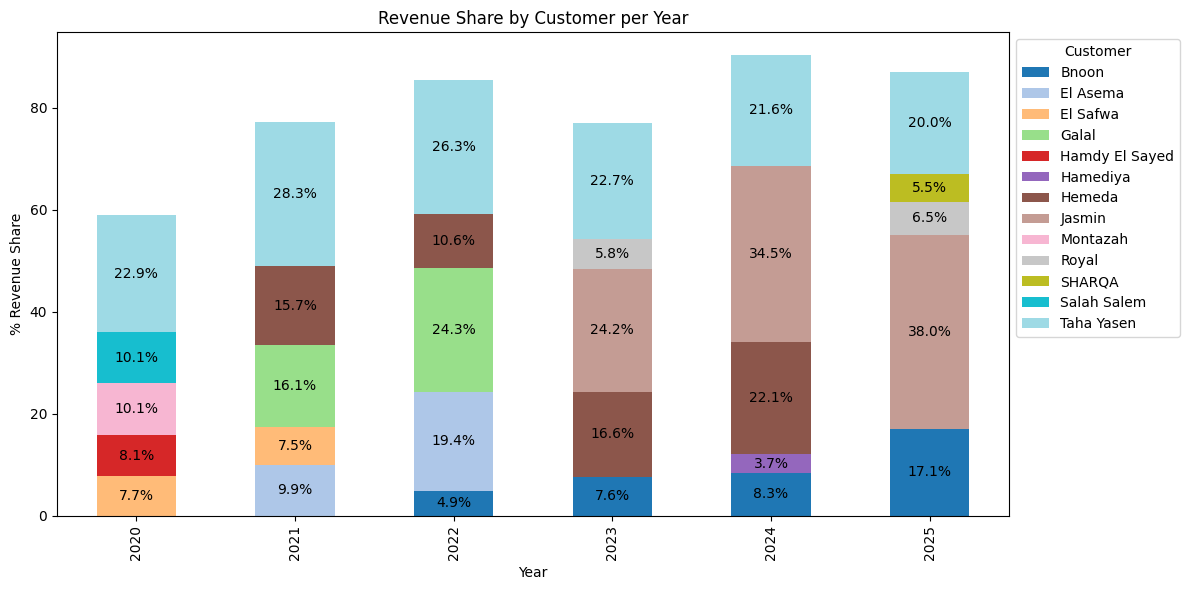

In [116]:

# Plot and capture the Axes
ax = filtered_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Set labels and title
plt.ylabel('% Revenue Share')
plt.title('Revenue Share by Customer per Year')

# Move legend outside the plot
plt.legend(
    title='Customer',
    bbox_to_anchor=(1, 1),
    loc='upper left'
)

# Annotate each bar segment with its value
for container in ax.containers:
    # Only show labels for segments with non-zero height
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                fontsize=10,
                color='Black' if height > 5 else 'black'  # Adjust for visibility
            )

plt.tight_layout()
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/Revenue_Share_by_Customer_per_Year.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()


#### 3. Scatter Plot - Customer Revenue vs Profit Margin

In [117]:
Customer_data

,Client,Sales_sum,Profit_sum,Transactions_count,Products_No,Category_No,years_in_business,Units_sold,Contribution Margin %,Cumalative_Sales_%
63,Taha Yasen,3197157.06,344915.64,351,238,97,6,139297,10.788198,22.955936
38,Jasmin,2939293.25,335280.1,112,118,53,3,78331,11.406827,44.060382
36,Hemeda,1631108.9,170082.97,238,238,99,6,92641.64,10.427444,55.771921
9,Bnoon,1196362,90045.5,54,23,15,6,38906,7.52661,64.361931
33,Galal,751274.2228,128073.3928,82,335,104,3,39588,17.047489,69.756161
...,...,...,...,...,...,...,...,...,...,...
43,Madina,900,225,1,1,1,1,3,25.0,99.990497
18,Dr. Salah,512.5,42.5,2,5,4,1,32,8.292683,99.994177
16,Dr. Islam Sameer,383,36.0,1,3,3,1,4,9.399478,99.996927
37,Ibn Sina,321,30,1,1,1,1,3,9.345794,99.999232


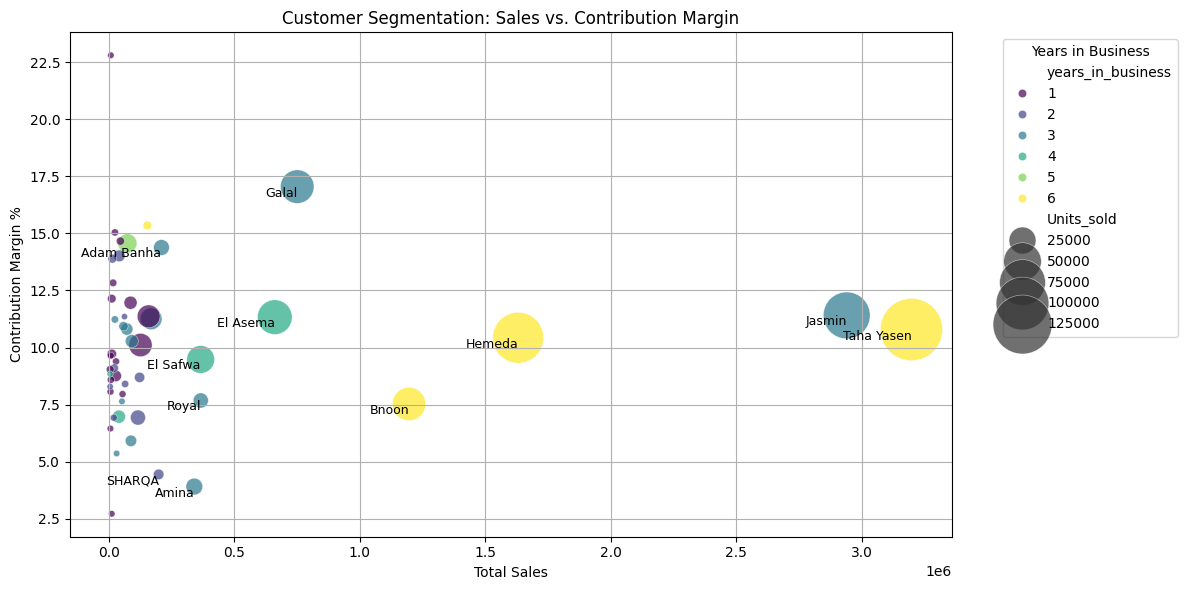

In [118]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=Customer_data.head(50), x='Sales_sum', y='Contribution Margin %', size='Units_sold', hue='years_in_business', palette='viridis', sizes=(20, 2000), alpha=0.7)
plt.title('Customer Segmentation: Sales vs. Contribution Margin')
plt.xlabel('Total Sales')
plt.ylabel('Contribution Margin %')

# Add labels for the top 10 customers by Sales
for i in range(Customer_data.head(11).shape[0]):
    plt.text(
        Customer_data.iloc[i]['Sales_sum'], 
        Customer_data.iloc[i]['Contribution Margin %'], 
        Customer_data.iloc[i].Client,  # Assuming 'name' is the customer identifier or you can use another column
        fontsize=9,
        ha='right',
        va='top'
    )
    
plt.legend(title='Years in Business', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig('/Users/mohamad/Desktop/Projects/Automation/Business Performance & Profit Leakage Diagnostic/outputs/charts/Customer_Segmentation_Sales_vs_Contribution_Margin.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()

### Insight 20: Market Share of Key Customers
#### The market share of the firm’s most valuable customers has consistently increased year over year, a positive sign of stability. Bnoon shows a 9% growth, while Jasmin grew by 4%, although Taha Yaseen experienced a slight decline of 1%. This trend is promising, and efforts should be made to continue nurturing these customer relationships.it is recommended to increase the CM of Taha Yasen and Jasmin alittle bit higher this will reflects directly on profits.


In [119]:
Customer_data.sort_values(by='Contribution Margin %').tail(11)

,Client,Sales_sum,Profit_sum,Transactions_count,Products_No,Category_No,years_in_business,Units_sold,Contribution Margin %,Cumalative_Sales_%
2,Adam Banha,210665.0,30296.55,165,17,11,3,7705,14.381388,83.742349
32,Eman Khairy,74832.25,10897.75,56,13,8,5,11984,14.562906,93.754688
42,MEDECA HOSPITAL SHARM,47191.5,6918.85,2,58,32,1,1097,14.661221,96.75355
59,Shady,25448.0,3827.75,8,27,18,1,572,15.041457,98.188546
11,Cash Customer,154423.3,23697.55,96,49,31,6,1363.5,15.345838,88.645262
3,Al Forkan,2422.5,375.0,4,4,4,1,165,15.479876,99.89987
33,Galal,751274.2228,128073.3928,82,335,104,3,39588,17.047489,69.756161
46,Merchant,1250,250,1,1,1,1,5,20.0,99.984035
31,Emad Montazah,9234,2105.5,9,5,4,1,187,22.801603,99.333278
61,Shourok,3460,796,1,3,1,1,5,23.00578,99.840939


### 2. Churn Rate (Lost Customers ÷ Previous Customers)

#### Churn rate trend across 6 years

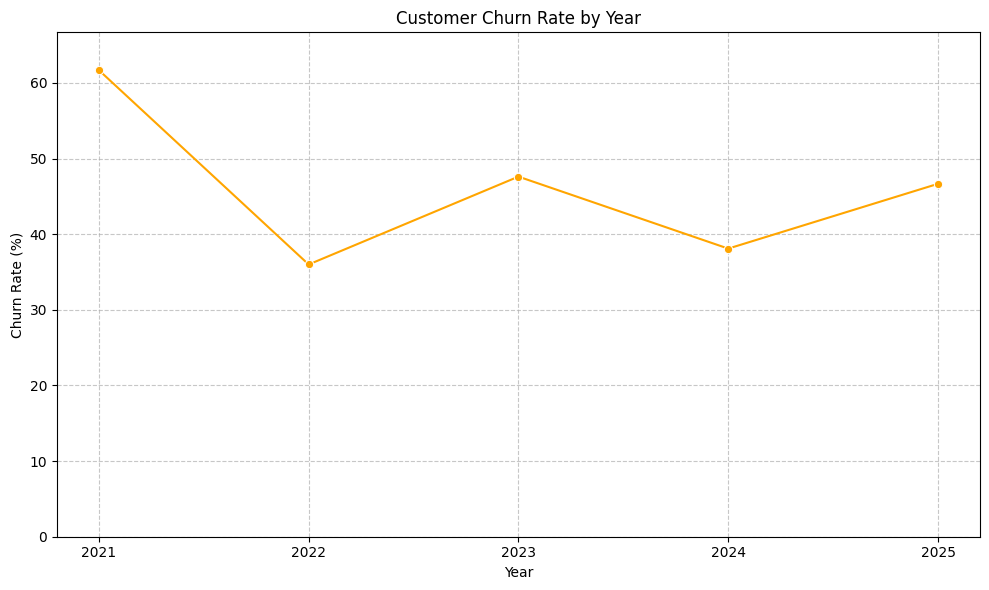

In [120]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=churn_df, x='Year', y='Churn Rate (%)', marker='o', color='orange')
plt.title('Customer Churn Rate by Year')
plt.xlabel('Year')
plt.ylabel('Churn Rate (%)')
plt.xticks(churn_df['Year'])
plt.ylim(0, churn_df['Churn Rate (%)'].max() + 5)  # Add some space above the max churn rate
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Churn Rate after Clients Dropped

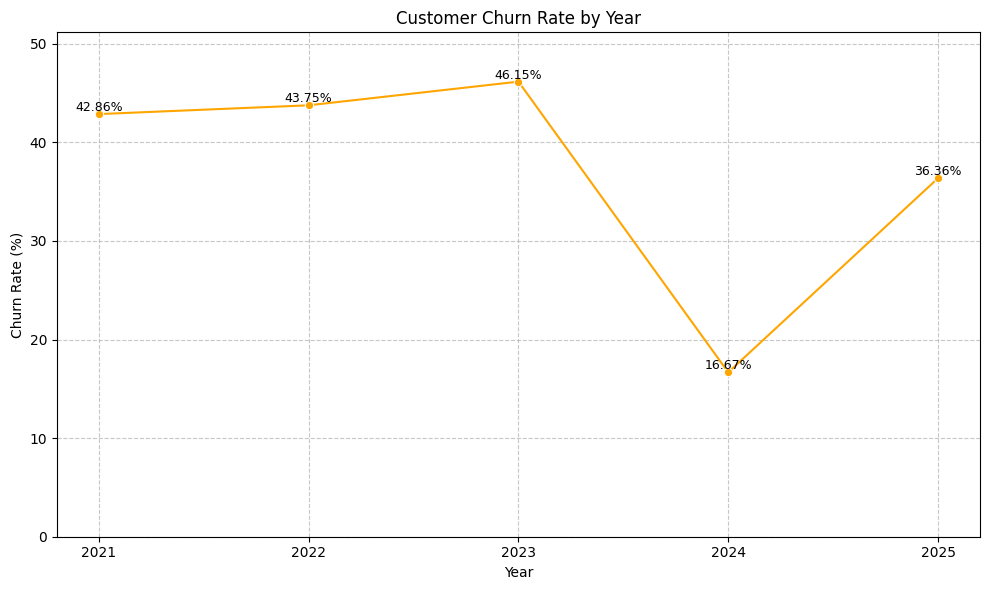

In [121]:
drooped_customers_per_year = original_df[~original_df['Client'].isin(dropped_customer_list)].groupby('Year')['Client'].unique().apply(set).reset_index()
# customers_per_year
# dropped_customer_list
churn_data_dropped = []

for i in range(1, len(drooped_customers_per_year)):
    year = drooped_customers_per_year.loc[i, 'Year']
    current = drooped_customers_per_year.loc[i, 'Client']
    previous = drooped_customers_per_year.loc[i - 1, 'Client']
    
    lost = previous - current
    churn_rate_dropped = (len(lost) / len(previous)) * 100 if len(previous) > 0 else 0
    
    churn_data_dropped.append({
        'Year': year,
        'Customers at Start': len(previous),
        'Retained Customers': len(previous & current),
        'Lost Customers': len(lost),
        'new Customers': len(current - previous),
        'Churn Rate (%)': round(churn_rate_dropped, 2)
    })

churn_df_dropped = pd.DataFrame(churn_data_dropped)
churn_df_dropped


plt.figure(figsize=(10, 6))
sns.lineplot(data=churn_df_dropped, x='Year', y='Churn Rate (%)', marker='o', color='orange')

for i in range(len(churn_df_dropped)):
    plt.text(churn_df_dropped.iloc[i]['Year'],
             churn_df_dropped.iloc[i]['Churn Rate (%)'],
             f"{churn_df_dropped.iloc[i]['Churn Rate (%)']}%",fontsize=9,
        ha='center',
        color = 'black',
        va='bottom',verticalalignment='bottom'
    )


plt.title('Customer Churn Rate by Year')
plt.xlabel('Year')
plt.ylabel('Churn Rate (%)')
plt.xticks(churn_df_dropped['Year'])
plt.ylim(0, churn_df_dropped['Churn Rate (%)'].max() + 5)  # Add some space above the max churn rate
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Funnel Chart after dropped clients

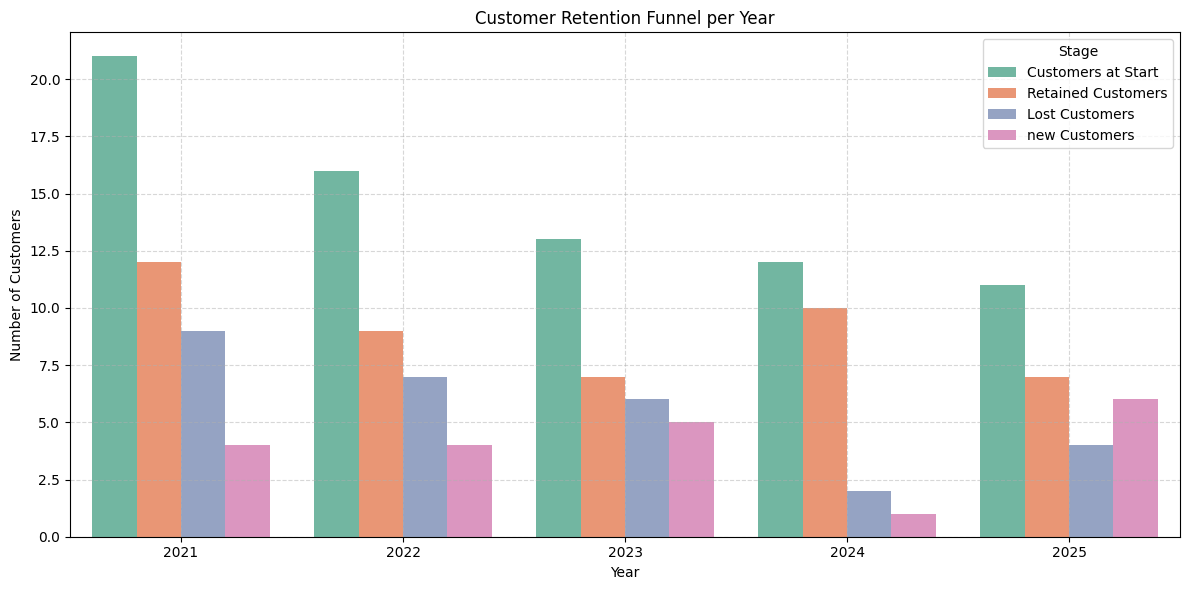

In [122]:
churn_df_dropped_long = churn_df_dropped.melt(
    id_vars='Year',
    value_vars=['Customers at Start', 'Retained Customers', 'Lost Customers','new Customers'],
    var_name='Stage',
    value_name='Customer Count'
)

plt.figure(figsize=(12, 6))
sns.barplot(data=churn_df_dropped_long, x='Year', y='Customer Count', hue='Stage', palette='Set2')
plt.title('Customer Retention Funnel per Year')
plt.ylabel('Number of Customers')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [123]:
Profit_margin

,Year,Profit_sum,Selling_sum,Profit_Margin
0,2020,153163.8875,1577652.9625,9.708338
1,2021,142354.188431,1593007.228431,8.936192
2,2022,272364.6228,1926761.1328,14.135879
3,2023,258070.41,2206541.3,11.695698
4,2024,319351.23,3230487.95,9.885542
5,2025,329935.86,3392914.76,9.72426


#### 3. Gross Margin % Trend
#### Consumables


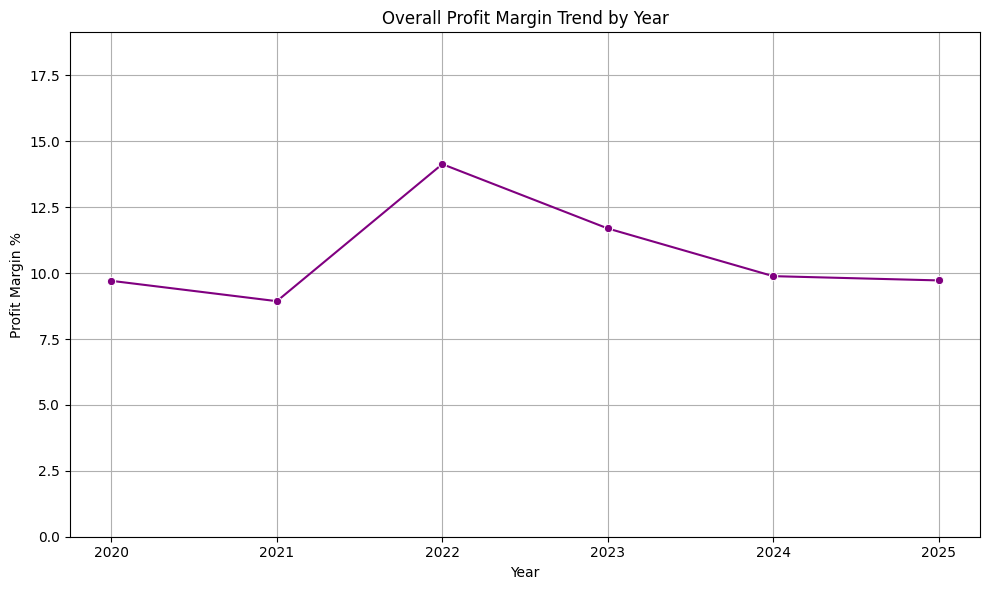

In [124]:

Profit_margin["Profit_Margin"] = Profit_margin["Profit_sum"] / Profit_margin["Selling_sum"]*100
Profit_margin

plt.figure(figsize=(10, 6))
sns.lineplot(data=Profit_margin, x='Year', y='Profit_Margin', marker='o', color='purple')

    
plt.title('Overall Profit Margin Trend by Year')
plt.xlabel('Year')
plt.ylabel('Profit Margin %')
plt.ylim(0, Profit_margin['Profit_Margin'].max() + 5)
plt.grid(True)
plt.tight_layout()
plt.show()

In [125]:
yearly_customer_profit

,Year,Client,revenue,cogs,Profit
41,2020,Taha Yasen,360465.4000,335198.500,25266.9000
7,2020,Cash Customer,114551.5000,94376.500,20175.0000
31,2020,Montazah,160354.9000,142630.430,17724.4700
38,2020,Salah Salem,159627.9000,142312.020,17315.8800
22,2020,Hamdy El Sayed,126214.2825,113491.035,12723.2475
...,...,...,...,...,...
136,2025,Cash Customer,14675.0000,13810.000,865.0000
146,2025,Zinat El Hayat,8800.0000,8600.000,200.0000
148,2025,montazah,3875.0000,3675.000,200.0000
147,2025,eman khairy,4375.0000,4275.000,100.0000


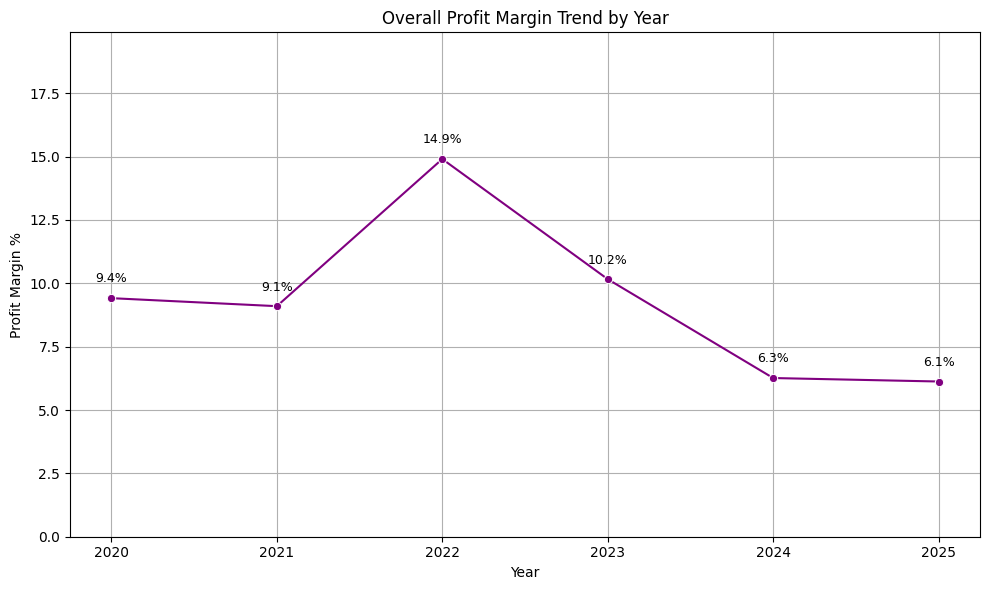

In [126]:
yearly_profit = yearly_customer_profit.groupby('Year').agg(Profit=('Profit', 'sum'),
                                                           revenue = ('revenue', 'sum')).reset_index()
yearly_profit['Profit_%'] = yearly_profit['Profit'] / yearly_profit['revenue'] * 100


plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_profit, x='Year', y='Profit_%', marker='o', color='purple')

for i in range(len(yearly_profit)):
    plt.text(yearly_profit.iloc[i]['Year'],
             yearly_profit.iloc[i]['Profit_%'] + 0.5,
             f"{round(yearly_profit.iloc[i]['Profit_%'], 1)}%" ,
             fontsize=9,
        ha='center',
        color = 'black',
        va='bottom',verticalalignment='bottom'
    )
    
    
plt.title('Overall Profit Margin Trend by Year')
plt.xlabel('Year')
plt.ylabel('Profit Margin %')
plt.ylim(0, yearly_profit['Profit_%'].max() + 5)
plt.grid(True)
plt.tight_layout()
plt.show()

### Insight 21: Pharmaceutical Branch Growth
#### Despite a drop in gross profit percentage in 2024 and 2025, the overall gross profit amount has risen significantly due to the pharmaceutical branch's cost-reduction strategy, which favors higher sales volumes with lower margins. It is recommended to maintain this strategy but ensure that the gross profit percentage remains between 6.5% and 7% in 2026.


In [127]:
expenses_df.tail(20)

,Date,Type,Description,Destination,Client,Invoice no.,Name,Cost,Year,Month
2340,2025-12-04 00:00:00,Operation,Transfer,dawaa,NaN,NaN,Khaled,250,2025,12
2341,2025-12-04 00:00:00,Operation,Transfer,dawaa,NaN,NaN,Safwat,400,2025,12
2342,2025-12-06 00:00:00,Operation,Transfer,banha,NaN,NaN,Hasan,50,2025,12
2343,2025-12-07 00:00:00,Operation,Transfer,dawaa,NaN,NaN,Hasan,800,2025,12
2344,2025-12-08 00:00:00,General,tips,NaN,NaN,NaN,Hasan,100,2025,12
2345,2025-12-10 00:00:00,Operation,Transfer,Mnya El Kamh,NaN,NaN,Hasan,50,2025,12
2346,2025-12-11 00:00:00,Operation,Transfer,banha,NaN,NaN,Hasan,40,2025,12
2347,2025-12-11 00:00:00,General,coffee,NaN,NaN,NaN,Hasan,35,2025,12
2348,2025-12-11 00:00:00,Operation,Transfer,dawaa,NaN,NaN,Khaled,200,2025,12
2349,2025-12-14 00:00:00,Operation,Shipping,NaN,NaN,NaN,Hasan,50,2025,12


## Conclusion
### The firm is performing well in terms of sales and gross profit; however, high expenses—particularly related to salaries and operations—are impacting net profit. A more strategic approach to cost management is needed.
## Recommended Actions:
### Increase sales modestly across all areas.
### Increase gross profit margins slightly.
### Introduce a new branch with the same employee base to improve net profit.
### Infuse new capital at the start of 2026.
### Add two large customers or four smaller ones to mitigate risks.
### Add two new suppliers to diversify supply chains.
### Revise supplier deals for the top three categories to ensure better margins.
### Track key performance metrics to ensure the firm meets its 2026 financial goals.
### Set sales targets for the pharmaceutical branch (8 million) and consumables (4 million) in 2026.